# Air Pollution Forecasting

Name: Soh Hong Yu<br/><br/>
Admin Number: P2100775<br/><br/>
Class: DAAA/FT/2A/01<br/><br/>
Module Code: ST1511 AI and Machine Learning<br/>

<hr>
<h3>References (In Harvard format):</h3>
<ol>
  <li>https://archive.ics.uci.edu/ml/datasets/Air+Quality</li>
  <li>https://wmo.asu.edu/content/world-lowest-temperature</li>
  <li>https://pubs.acs.org/doi/10.1021/j100907a003#</li>
  <li>https://www.wallstreetmojo.com/cointegration/</li>
  <li>https://blog.quantinsti.com/johansen-test-cointegration-building-stationary-portfolio/</li>
  <li>https://www.influxdata.com/blog/autocorrelation-in-time-series-data/</li>
  <li>https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14</li>
  <li>https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/</li>
  <li>https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</li>
  <li>https://www.chicagotribune.com/news/ct-xpm-2011-12-16-ct-wea-1216-asktom-20111216-story.html</li>
  <li>https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</li>
  <li>https://analyzingalpha.com/interpret-arima-results</li>
  <li>https://otexts.com/fpp2/residuals.html</li>
  <li>https://machinelearningmastery.com/probabilistic-model-selection-measures/</li>
  <li>https://eng.uber.com/omphalos/</li>
</ol>


# Project Objective

Use a time series model to predict and forecast the amount of air pollutants in open air


# Background Information

The dataset seems to be derived from a Air Quality dataset found in UCI Machine Learning Repository, with some of the values in this dataset to match with the Air Quality dataset. Based on the dataset information, here we can assume that the data is curated using 4 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city.


# Initialising Libraries and Variables


In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns


# Loading Datasets


In [2]:
df = pd.read_csv("./train.csv", sep=",")
df.head()


Date          T         RH Gas        Value  Unnamed: 5  Unnamed: 6
0  15/3/2016  12.020833  54.883334  CO  1053.200000         NaN         NaN
1  16/3/2016   9.833333  64.069791  CO   995.250000         NaN         NaN
2  17/3/2016  11.292708  51.107292  CO  1025.250000         NaN         NaN
3  18/3/2016  12.866319  51.530903  CO  1064.444444         NaN         NaN
4  19/3/2016  16.016667  48.843750  CO  1088.741667         NaN         NaN

# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of
the characteristics of the dataset.

This is a dataset collected from a Air Quality dataset found in UCI Machine Learning Repository, it contains 1312 data points with 7 columns.

**Date** - date<br>
**T** - temperature<br>
**RH** - relative humidity<br>
**Gas** - type of pollution gas<br>
**Value** - amount of pollution


# Data Exploration

To prevent mutation of our original data, we will make a copy of our data to perform eda on it.


In [3]:
df_eda = df.copy()


### Descriptive Statistics


In [4]:
df_eda.shape


(1312, 7)

There are 1312 rows and 7 columns in the entire data set.


In [5]:
df_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1312 non-null   object 
 1   T           1312 non-null   float64
 2   RH          1312 non-null   float64
 3   Gas         1312 non-null   object 
 4   Value       1312 non-null   float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 71.9+ KB


<u><b>Observations</b></u>

- The shape of dataset is (1312, 7) whereby there is 1312 observations and 7 columns. (4 Features +
  1 Target Variable: "Value" + 2 Useless Variable)
- Datatype of all columns are numeric except Date and Gas
- There is no missing values in the entire dataset.


### Data Information


In [6]:
descriptive_stats = df_eda.describe(include="all").T
descriptive_stats["Proportion of Most Frequent Value"] = (
    descriptive_stats["freq"] / len(df_eda) * 100
)
descriptive_stats.sort_values("Proportion of Most Frequent Value", ascending=False)


count unique        top freq        mean         std    min  \
Gas           1312      4         CO  328         NaN         NaN    NaN   
Date          1312    328  15/3/2016    4         NaN         NaN    NaN   
T           1312.0    NaN        NaN  NaN   11.634917   37.041779 -200.0   
RH          1312.0    NaN        NaN  NaN   39.873729   43.217836 -200.0   
Value       1312.0    NaN        NaN  NaN  750.218839  225.520132 -160.0   
Unnamed: 5     0.0    NaN        NaN  NaN         NaN         NaN    NaN   
Unnamed: 6     0.0    NaN        NaN  NaN         NaN         NaN    NaN   

                   25%         50%         75%          max  \
Gas                NaN         NaN         NaN          NaN   
Date               NaN         NaN         NaN          NaN   
T             12.38776   18.832292   25.557118    32.997917   
RH           36.348177   46.078993   57.932292    81.104167   
Value       648.370833  769.370833  880.570833  1436.233333   
Unnamed: 5         NaN         NaN         NaN          NaN   
Unnamed: 6         NaN         NaN         NaN          NaN   

           Proportion of Most Frequent Value  
Gas                                     25.0  
Date                                0.304878  
T                                        NaN  
RH                                       NaN  
Value                                    NaN  
Unnamed: 5                               NaN  
Unnamed: 6                               NaN

<u><b>Observations</b></u>

- All 4 Gases have equal amount of data points as proportion of most frequent value is 25%
- T and RH are likely to be negatively skewed with many outliers as the min value of T and RH is much lower than the lower quartile


### Editing columns date and dropping useless columns


In [7]:
# converting date to a datetime object, then set as index
df_eda["Date"] = pd.to_datetime(df_eda["Date"], format="%d/%m/%Y")
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df_eda.set_index("Date", inplace=True)
df.set_index("Date", inplace=True)

# dropping useless columns
df_eda = df_eda.loc[:, ~df_eda.columns.str.contains("^Unnamed")]
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
display(df)


T         RH Gas        Value
Date                                             
2016-03-15  12.020833  54.883334  CO  1053.200000
2016-03-16   9.833333  64.069791  CO   995.250000
2016-03-17  11.292708  51.107292  CO  1025.250000
2016-03-18  12.866319  51.530903  CO  1064.444444
2016-03-19  16.016667  48.843750  CO  1088.741667
...               ...        ...  ..          ...
2017-02-01   5.267708  39.614930  O3   553.180556
2017-02-02 -55.515972 -24.010417  O3   343.500000
2017-02-03 -14.272917  28.563542  O3   334.458333
2017-02-04   4.848611  37.832986  O3   379.513889
2017-02-05   7.273958  31.809375  O3   947.333333

[1312 rows x 4 columns]

### Pandas-Profiling

Pandas-Profiling is a convenient tool to quickly explore the datasets along with some alerts/warnings about the dataset


In [8]:
prof = ProfileReport(df_eda, explorative=True)
# prof.to_notebook_iframe()
# prof.to_file(output_file='AirPollution.html')


In [9]:
# Summary 1
print("Summary")
print(f"1. T is strong correlated with RH = {df_eda.corr()['T']['RH']}")
print(f"2. T is correlated with Value = {df_eda.corr()['T']['Value']}")
print(f"3. RH is correlated with Value = {df_eda.corr()['RH']['Value']}")
print(
    f"4. The different gases are uniformly distributed: \n{df_eda['Gas'].value_counts()}"
)


Summary
1. T is strong correlated with RH = 0.9033185659007723
2. T is correlated with Value = 0.663510936586675
3. RH is correlated with Value = 0.6929274128393887
4. The different gases are uniformly distributed: 
CO     328
HC     328
NO2    328
O3     328
Name: Gas, dtype: int64


### Time Series Visualisation


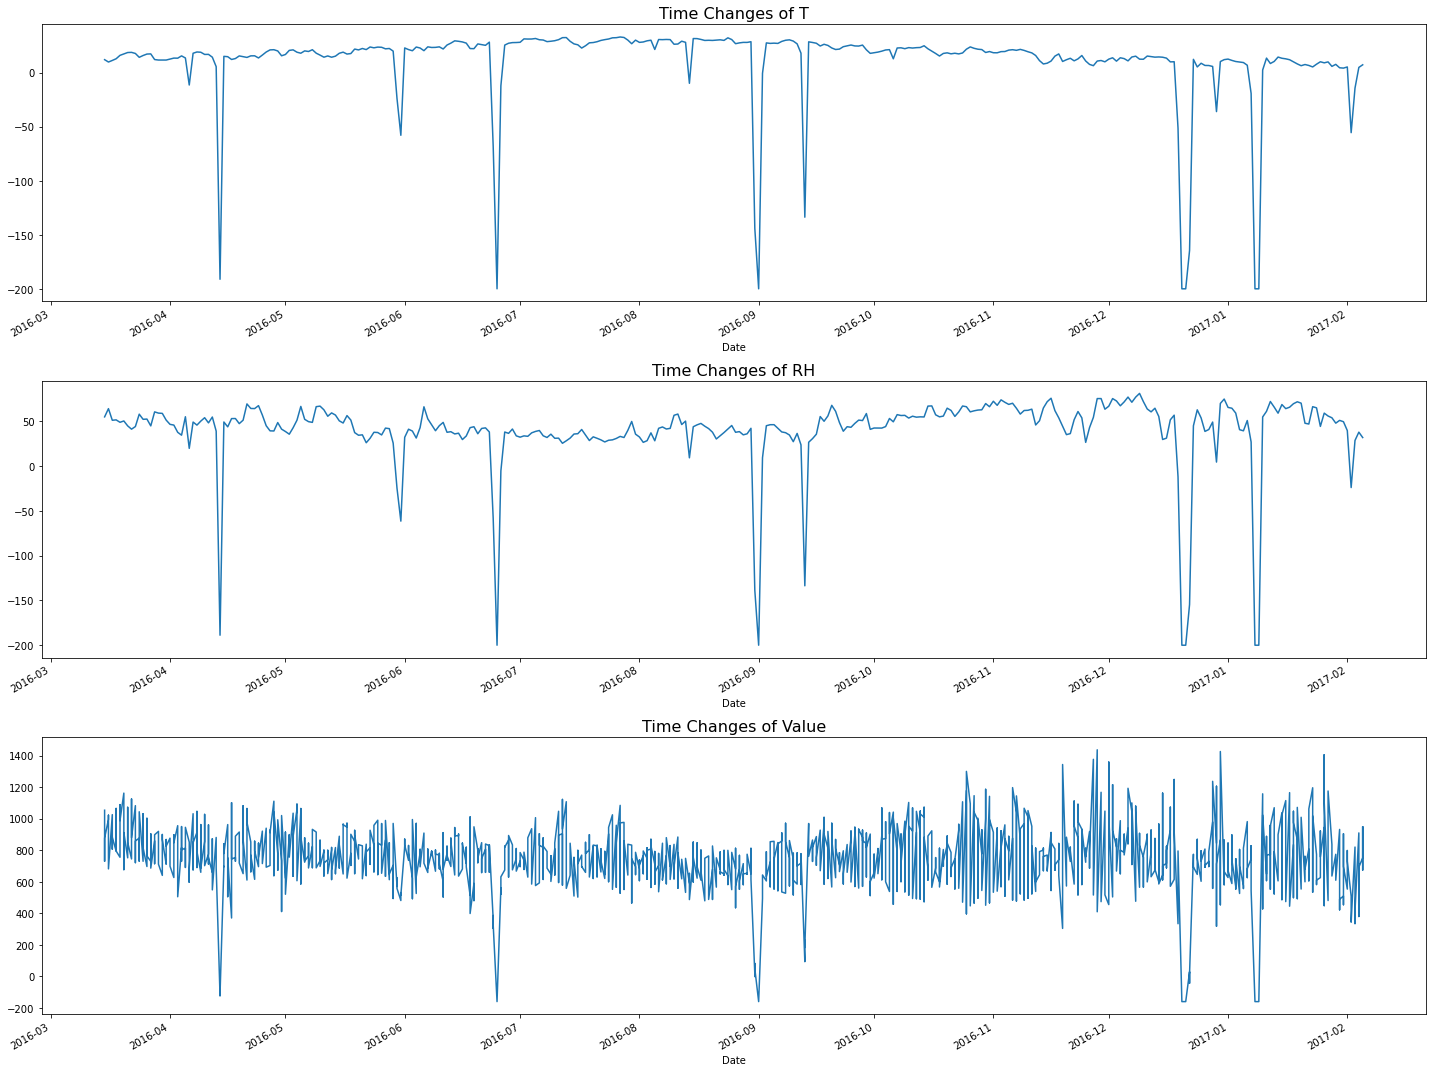

In [10]:
continuous = ["T", "RH", "Value"]
fig = plt.figure(tight_layout=True, figsize=(20, 15))
for i, column in enumerate(continuous):
    ax = fig.add_subplot(len(continuous), 1, i + 1)
    df_eda[column].plot(ax=ax)
    ax.set_title("Time Changes of " + column, fontsize=16)
plt.show()


<u><b>Summary / Observations</b></u>

- The Value Series looks very clustered and have many spikes which means that there is a high variance in quantity of the different gases.
- There seems to have a reoccurring drop to the negative values in the series.
- As it is likely unlikely for temperature and relative humidity to be in the negative value, as the lowest recorded value in the world is -89.2&deg;C in Antarctica at an elevation of 3420m.
- Therefore, it is likely that a fault might have affected the temperature sensor and humidity sensor.
- Note that because of the dips the different value would also decrease


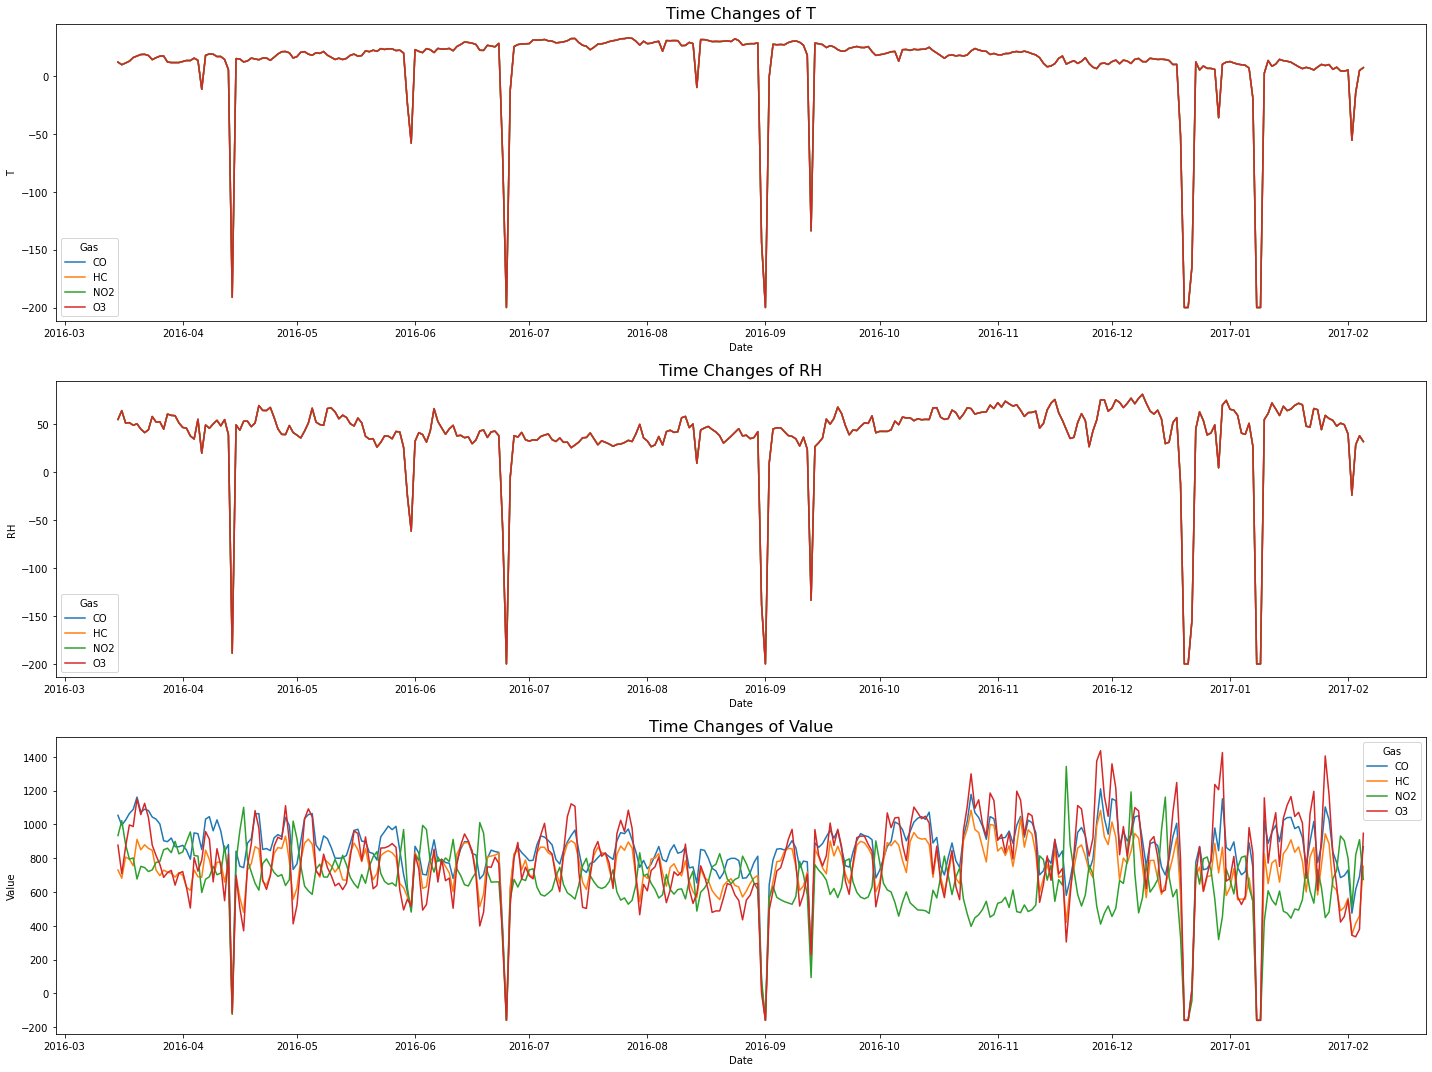

In [11]:
fig = plt.figure(tight_layout=True, figsize=(20, 15))
for i, c in enumerate(continuous):
    ax = fig.add_subplot(len(continuous), 1, i + 1)
    sns.lineplot(data=df_eda, x=df_eda.index, y=c, hue="Gas", ax=ax)
    ax.set_title("Time Changes of " + c, fontsize=16)
plt.show()


<u><b>Observations</b></u>

- The data of RH and T are the same for all the different gases.
- The spikes down of temperature and relative humidity is the same point where the value of the different gases down as well.


### Univariate Analysis

We will begin with a univariate analysis, analysing the distribution of each variable.


#### Distributions

We will plot and see the distribution of the different variables and how it relates to the different Gases


##### Temperature

As mentioned, Temperatures are all the same for the different gases and therefore, we can just compare temperature's Distribution


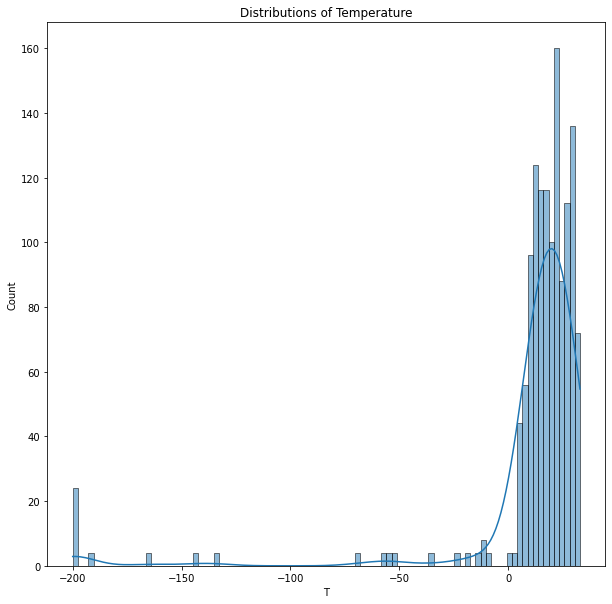

In [12]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df_eda, x="T", kde=True)
plt.title("Distributions of Temperature")
plt.show()


<u><b>Observations</b></u>

- As mentioned previously, temperature is very negatively skewed and have several points of outliers likely due to failure of sensors.


##### Relative Humidity

As mentioned, Relative Humidity are all the same for the different gases and therefore, we can just compare Relative Humidity's Distribution


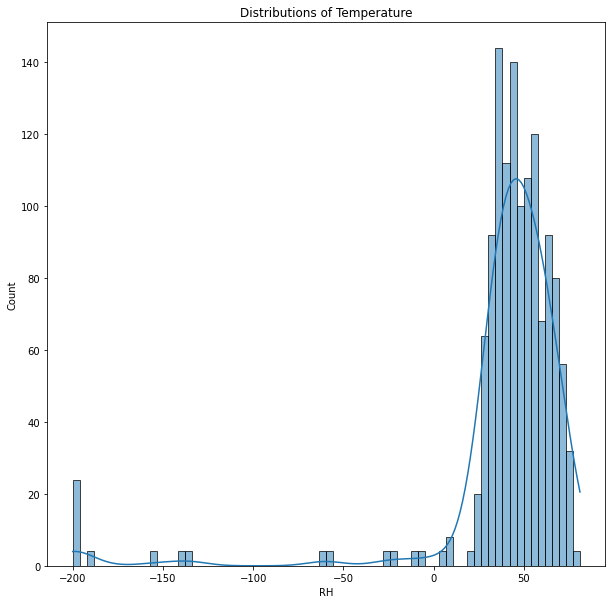

In [13]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df_eda, x="RH", kde=True)
plt.title("Distributions of Temperature")
plt.show()


<u><b>Observations</b></u>

- As mentioned previously, relative humidity is very negatively skewed and have several points of outliers likely due to failure of sensors.


##### Value

As the values of the gases are varied, we will look at the distribution of each gases individually.


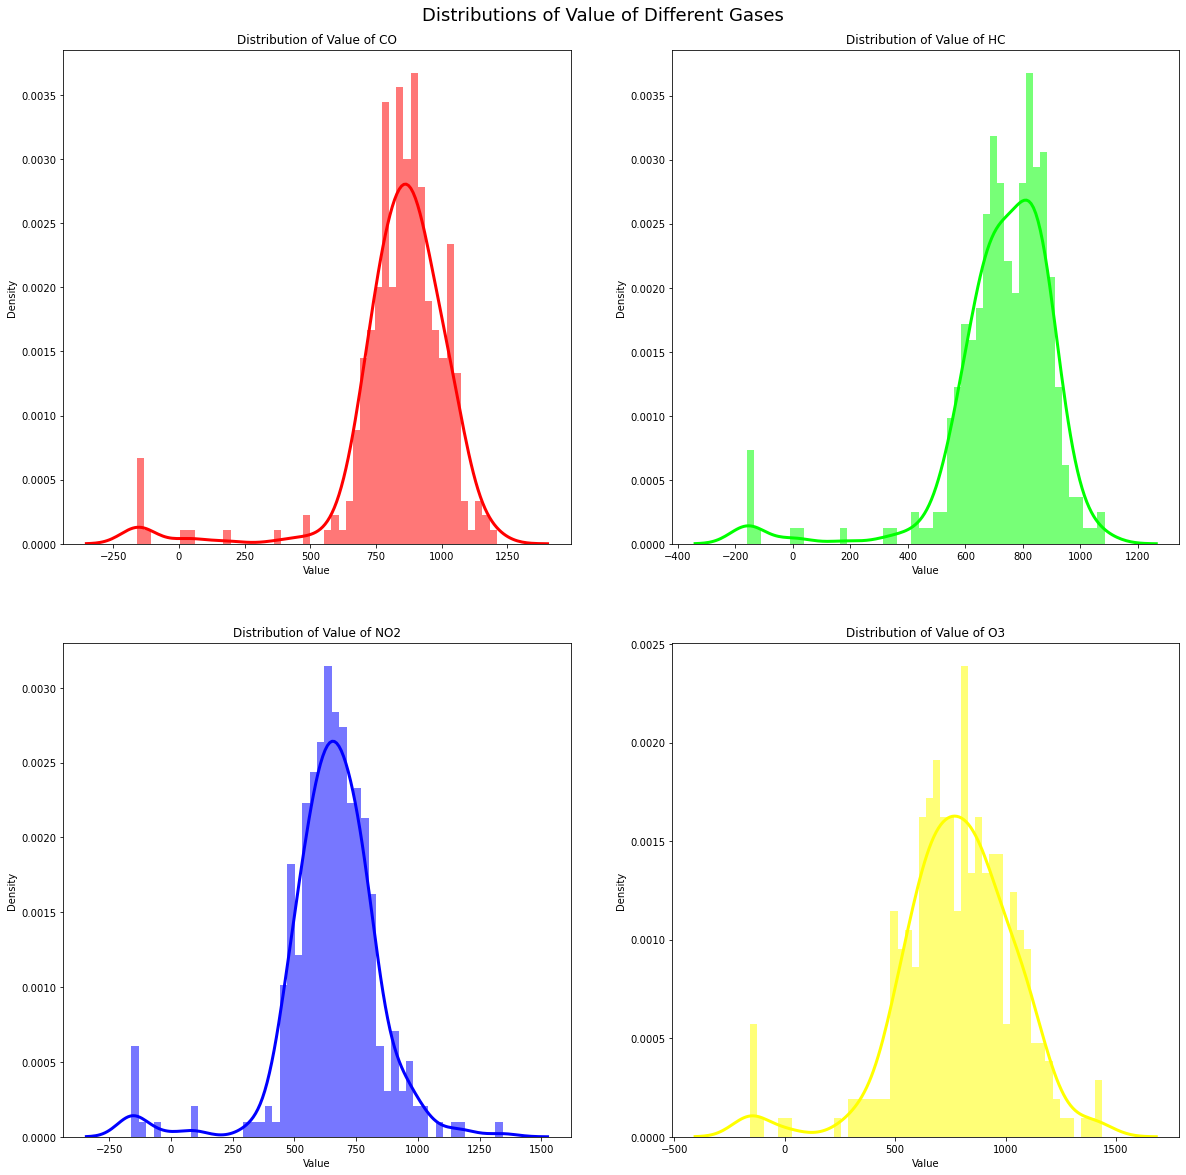

In [14]:
# Value
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
gasColor = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
for gasIndex in range(df_eda["Gas"].nunique()):
    ax[gasIndex // 2][gasIndex % 2].hist(
        df_eda[df_eda["Gas"] == df_eda["Gas"].unique()[gasIndex]]["Value"],
        density=True,
        bins=50,
        color=gasColor[gasIndex] + "88",
    )
    sns.kdeplot(
        df_eda[df_eda["Gas"] == df_eda["Gas"].unique()[gasIndex]]["Value"],
        lw=3,
        color=gasColor[gasIndex],
        ax=ax[gasIndex // 2][gasIndex % 2],
    )
    ax[gasIndex // 2][gasIndex % 2].set_title(
        f"Distribution of Value of {df_eda['Gas'].unique()[gasIndex]}"
    )

plt.suptitle("Distributions of Value of Different Gases", fontsize=18, y=0.91)
plt.show()


<u><b>Observations</b></u>

- Apart from the outliers, generally the distribution of value of the different gases is very normally distributed.


# Time Series Decomposition

Before we can fix some of the outlier issue caused by the failure sensor, we will have to perform some tests to decompose the time series problem.

These tests are:

1. Seasonality Decomposition
2. Test for Causation
3. Test for Cointegration
4. Test for Stationarity
5. Outlier Analysis
6. Autocorrelation Analysis


Before we start any test, we will have to manipulate the data a bit


In [15]:
df_pivot = df_eda.copy(deep=True)
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.pivot(index="Date", columns="Gas", values="Value").join(
    df_eda[["T", "RH"]]
)
df_pivot = df_pivot[~df_pivot.index.duplicated(keep="first")]
df_pivot


CO          HC          NO2          O3          T  \
Date                                                                      
2016-03-15  1053.200000  729.800000   933.800000  876.833333  12.020833   
2016-03-16   995.250000  681.441667  1021.750000  708.025000   9.833333   
2016-03-17  1025.250000  806.583333   881.375000  867.375000  11.292708   
2016-03-18  1064.444444  794.258333   794.527778  996.625000  12.866319   
2016-03-19  1088.741667  755.083333   800.883333  987.341667  16.016667   
...                 ...         ...          ...         ...        ...   
2017-02-01   729.422222  562.650000   797.647222  553.180556   5.267708   
2017-02-02   474.291667  347.480556   508.180556  343.500000 -55.515972   
2017-02-03   615.700000  414.475000   819.733333  334.458333 -14.272917   
2017-02-04   691.713889  458.947222   909.375000  379.513889   4.848611   
2017-02-05   867.600000  751.833333   673.741667  947.333333   7.273958   

                   RH  
Date                   
2016-03-15  54.883334  
2016-03-16  64.069791  
2016-03-17  51.107292  
2016-03-18  51.530903  
2016-03-19  48.843750  
...               ...  
2017-02-01  39.614930  
2017-02-02 -24.010417  
2017-02-03  28.563542  
2017-02-04  37.832986  
2017-02-05  31.809375  

[328 rows x 6 columns]

### Seasonal Decomposition

The seasonal decomposition is a method used in time series analysis to represent a time series as a sum (or, sometimes, a product) of three components - the linear trend, the periodic (seasonal) component, and random residuals.

In a gist, the following plots will be able to split the data into its seasonal components, trend components and remainders. And if you were to sum up the values, you will have the actual data back.


Seasonal Decomposition
Column: CO
Seasonal 7


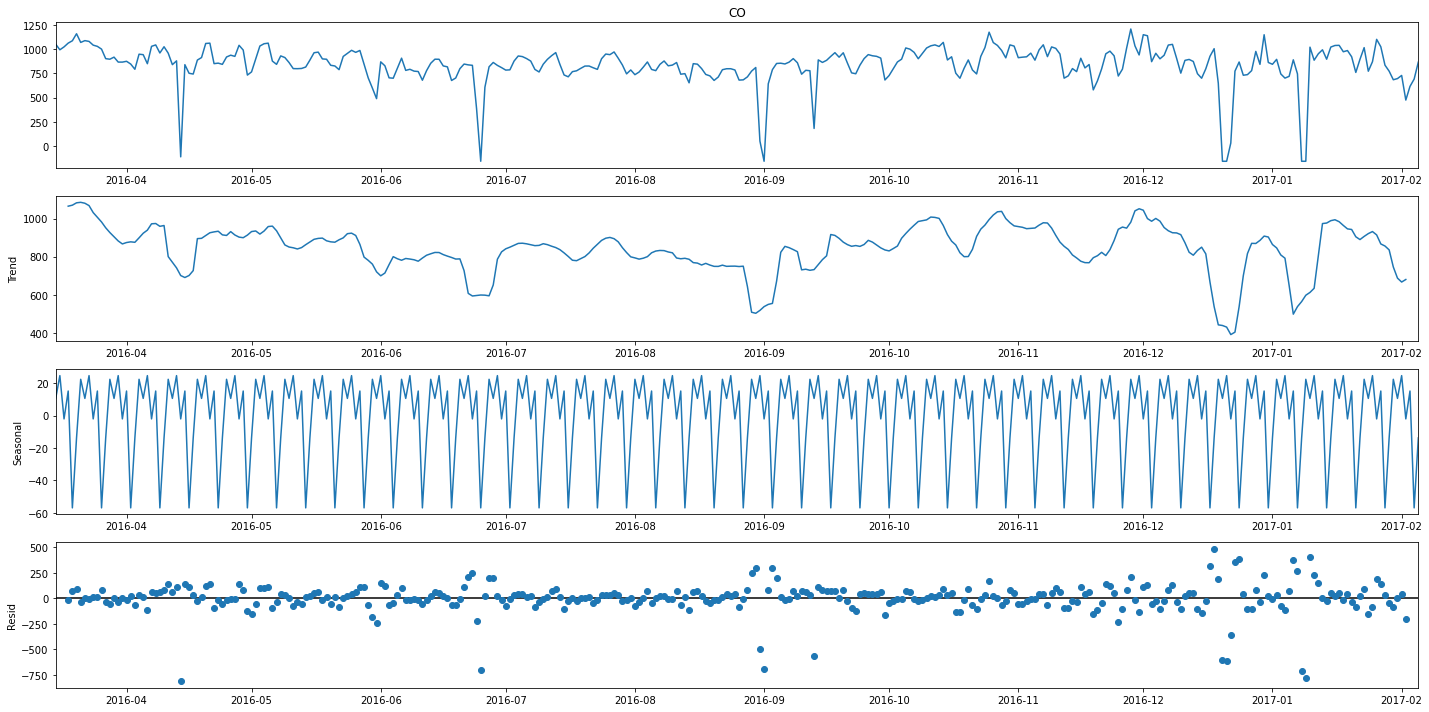

Seasonal Decomposition
Column: HC
Seasonal 7


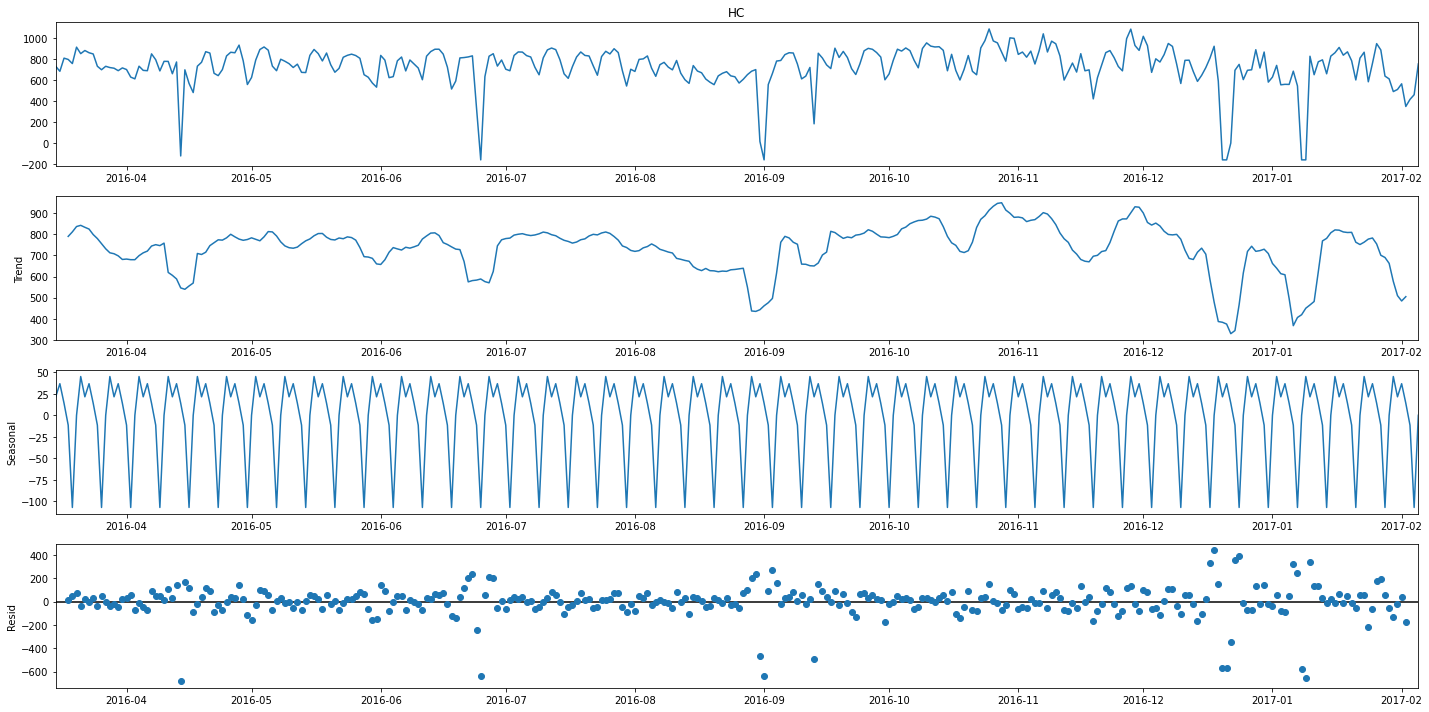

Seasonal Decomposition
Column: NO2
Seasonal 7


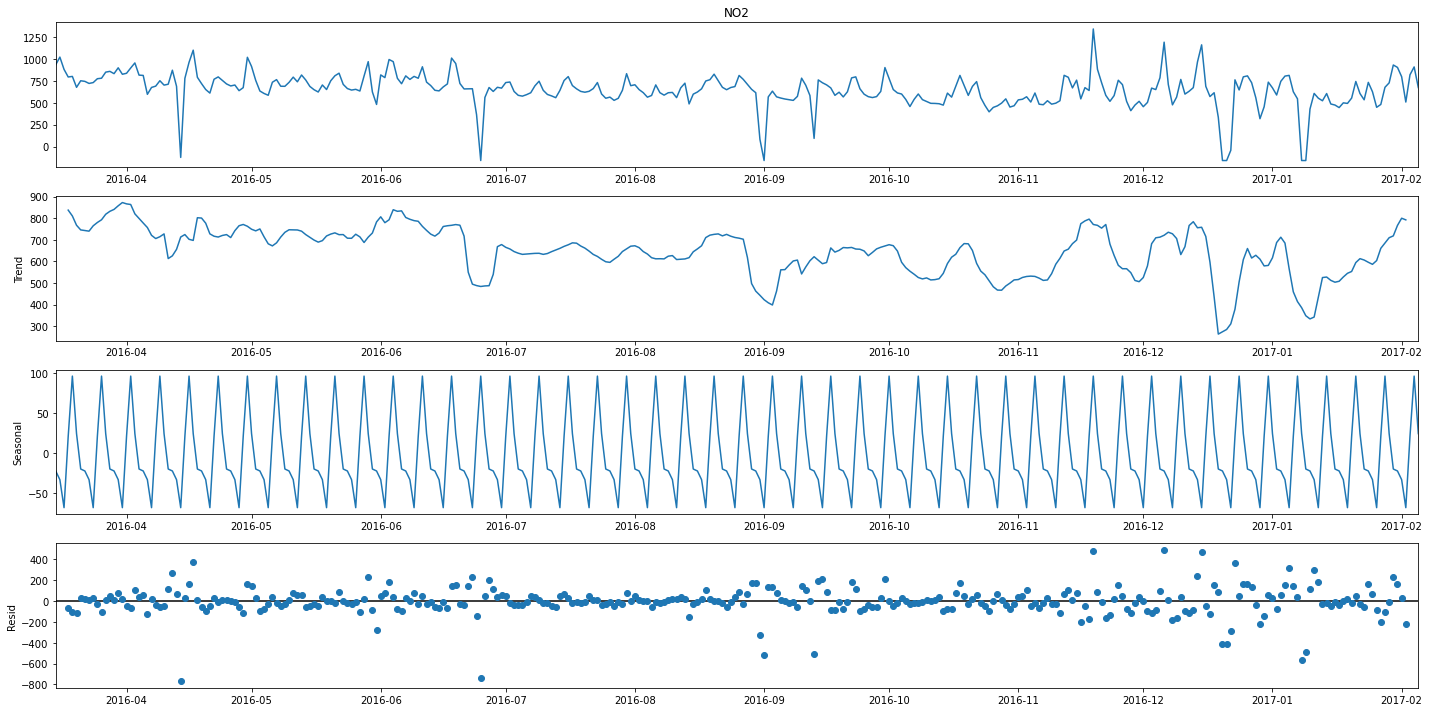

Seasonal Decomposition
Column: O3
Seasonal 7


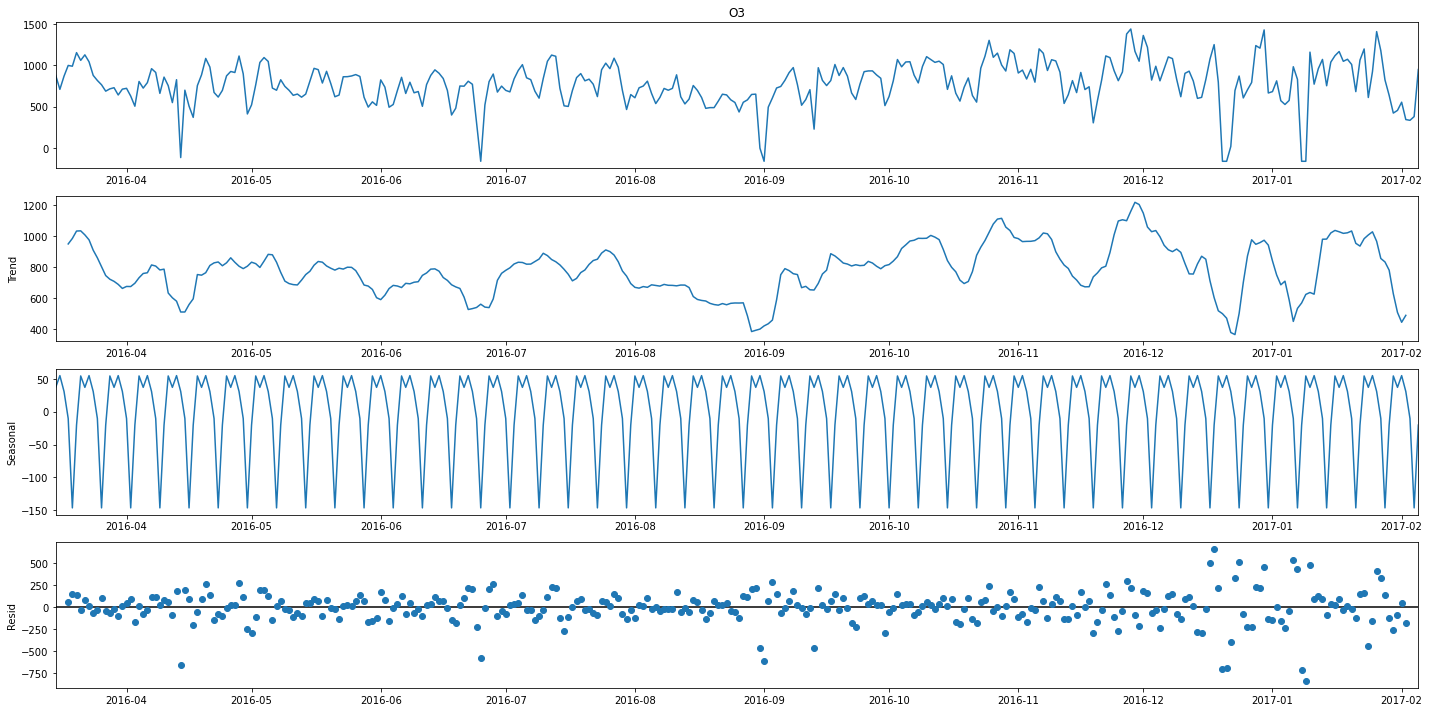

Seasonal Decomposition
Column: T
Seasonal 7


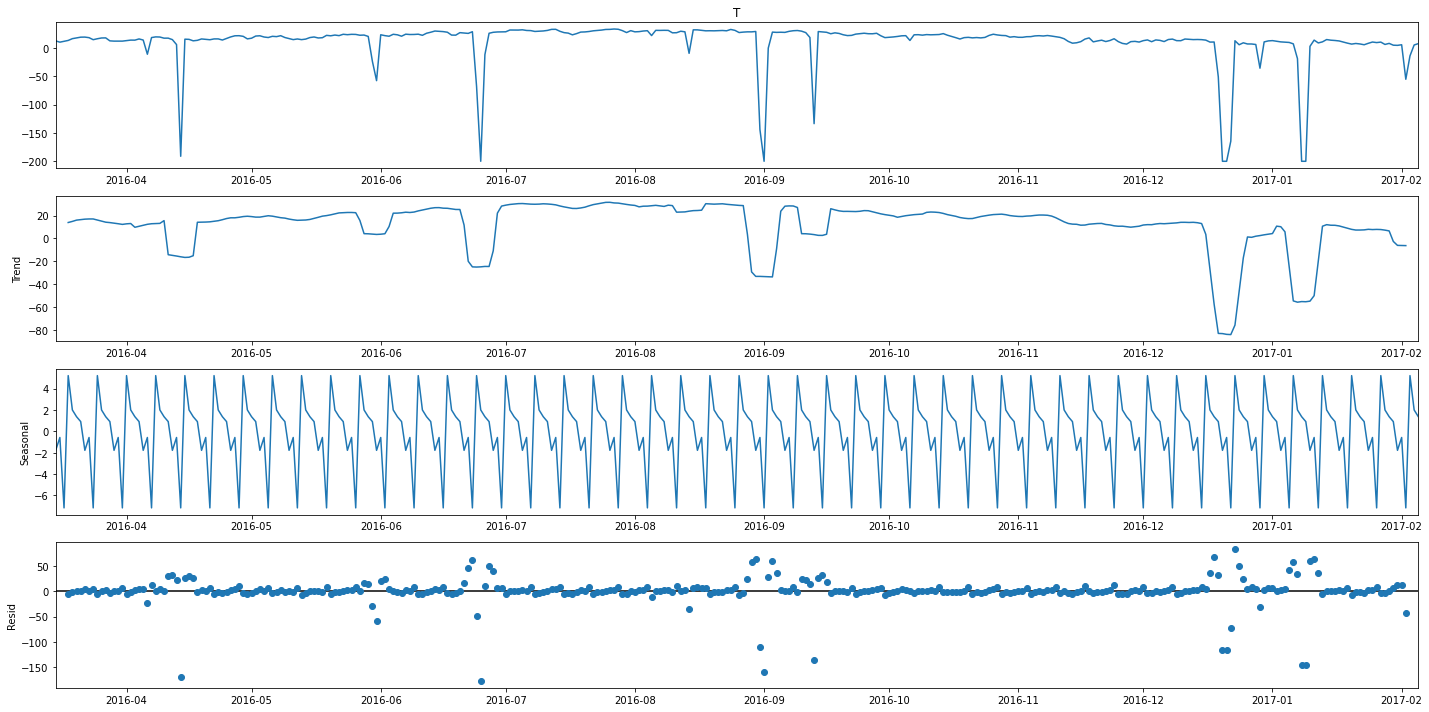

Seasonal Decomposition
Column: RH
Seasonal 7


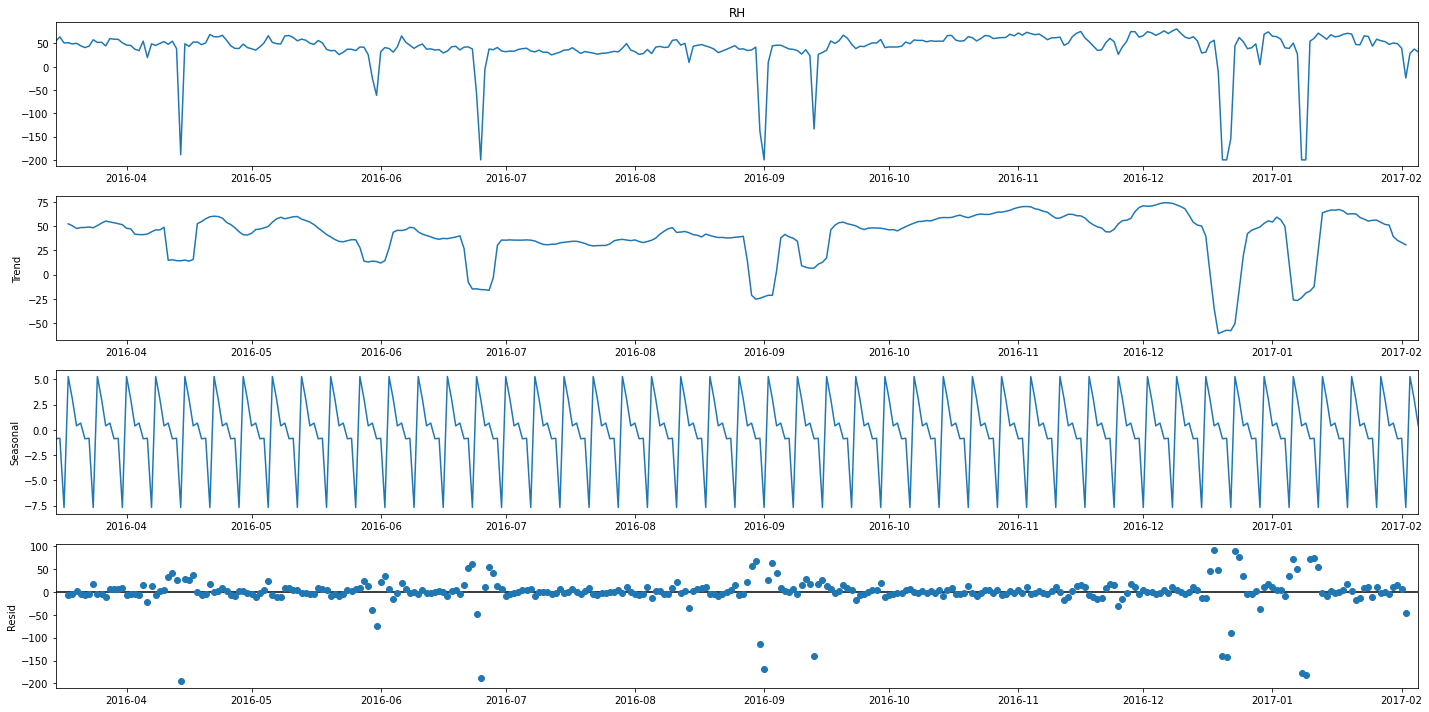

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in df_pivot.columns:
    plt.rc("figure", figsize=(20, 10))
    print("Seasonal Decomposition\nColumn:", i)
    decomposition = seasonal_decompose(df_pivot[i])
    print("Seasonal", len(decomposition.seasonal.drop_duplicates()))
    decomposition.plot()
    plt.show()


<u><b>Observations</b></u>

- There is no linear trend in the data
- Seasonality is the same throughout all the variables. This repeat occurs every 5 days/steps (each tick is around 30 days as a month usually has 30 days. The repeat occurs 4 times a month which means that the repeat occurs like every 30/4 = 5 days)
- The number of unique seasonal count is 7 which we will be using for the models later on


### Test for Causation

We will be using the Granger causality test. It is a statistical hypothesis test for determining whether one time series is a factor and offer useful information in forecasting another time series. This will help us in concluding if a Multivariate Modelling can be used for this time series.

Granger causality test works like this.

$H_0$: There is no causality between time series

$H_1$: There is some causality between time series


In [17]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 12
test = "ssr_chi2test"

g_matrix = pd.DataFrame(
    np.zeros((len(df_pivot.columns), len(df_pivot.columns))),
    columns=df_pivot.columns,
    index=df_pivot.columns,
)
for c in g_matrix.columns:
    for r in g_matrix.index:
        test_result = grangercausalitytests(
            df_pivot[[r, c]], maxlag=maxlag, verbose=False
        )
        p_values = [round(test_result[i + 1][0][test][1], 4) for i in range(maxlag)]
        min_p_value = np.min(p_values)
        g_matrix.loc[r, c] = min_p_value
g_matrix.columns = [var + "_x" for var in df_pivot.columns]
g_matrix.index = [var + "_y" for var in df_pivot.columns]

g_matrix


c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


KeyboardInterrupt: 

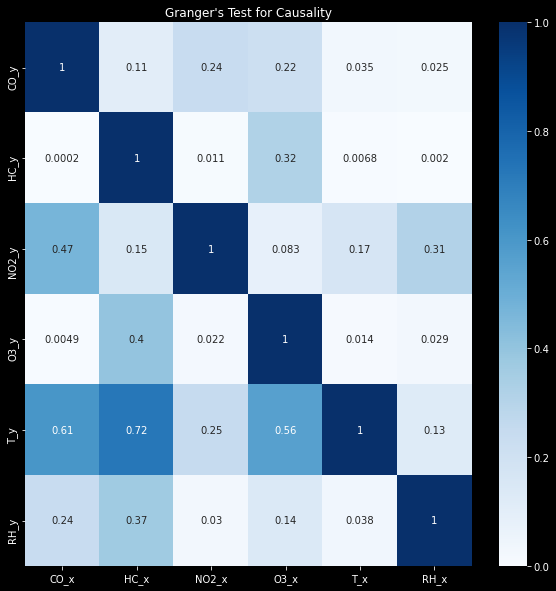

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(g_matrix, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Granger's Test for Causality")
plt.show()


<u><b>Observations</b></u>

- If value is less than the significant level (0.05), then we can reject the null hypothesis and conclude that the x value will granger cause y value.
- Based on this, we can concluded that
  1. Temperature granger cause CO emissions
  2. Relative Humidity granger cause CO emissions
  3. CO granger cause HC
  4. NO granger cause HC
  5. Temperature granger cause HC emissions
  6. Relative Humidity granger cause HC emissions
  7. O3 granger cause NO2
  8. CO granger cause O3
  9. NO2 granger cause O3
     - NO2 causes O3 depletion as NO2 + O3 -> NO3 + O2
  10. Temperature granger cause O3 emissions
  11. Relative Humidity granger cause O3 emissions
  12. NO2 granger cause Relative Humidity
  13. Temperature granger cause NO2


### Test for Cointegration

Cointegration is a statistical method used to test the correlation between two or more non-stationary time series in the long-run or for a specified time period. The method helps in identifying long-run parameters or equilibrium for two or more sets of variables.

We will be use Johansen's cointegration test is used to established if there is a correlation between several time series in the long term, to determine if there is any significant relationship to use for Multivariate Modelling.

$H_0$: There is no cointegration

$H_1$: There is some cotintegram


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

out = coint_johansen(df_pivot, -1, 5)
d = {"0.90": 0, "0.95": 1, "0.99": 2}
traces = out.lr1
cvts = out.cvt[:, d[str(1 - 0.05)]]


def adjust(val, length=6):
    return str(val).ljust(length)


# Summary
print("Name   ::  Test Stat > C(95%)    =>   Significant  \n", "--" * 20)
for col, trace, cvt in zip(df_pivot.columns, traces, cvts):
    print(
        adjust(col),
        ":: ",
        adjust(round(trace, 2), 9),
        ">",
        adjust(cvt, 8),
        " =>  ",
        trace > cvt,
    )


Name   ::  Test Stat > C(95%)    =>   Significant  
 ----------------------------------------
CO     ::  151.09    > 83.9383   =>   True
HC     ::  90.83     > 60.0627   =>   True
NO2    ::  45.03     > 40.1749   =>   True
O3     ::  19.66     > 24.2761   =>   False
T      ::  4.85      > 12.3212   =>   False
RH     ::  0.64      > 4.1296    =>   False


<u><b>Observations</b></u>

- Ozone, Temperature and Relative Humidity does not have a significant cointegration
- CO, HC and NO2 have a significant cointegration which suggest that there might be a correlation between the 3 values in the long run.


### Test for Stationarity

Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).

This can be tested using the Augmented Dickey-Fuller test also known as the AD Fuller Test to test for stationarity.

$H_0$: Data is not stationary

$H_1$: Data is stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller


def adfuller_test(series, significant=0.05, name="", verbose=False):
    r = adfuller(series, autolag="AIC")
    output = {
        "test_statistic": round(r[0], 4),
        "p_value": round(r[1], 4),
        "n_lags": round(r[2], 4),
        "n_obs": r[3],
    }
    p_value = output["p_value"]

    def adjust(val, length=6):
        return str(val).ljust(length)

    # Print Summary
    print(f'Augmented Dickey-Fuller Test on "{name}"', "\n", "-" * 47)
    print(f"Null Hypothesis: Data has unit root. Non-Stationary.")
    print(f"Significance Level    = {significant}")
    print(f'Test Statistic        = {output["test_statistic"]}')
    print(f'No. Lags Chosen       = {output["n_lags"]}')

    for key, val in r[4].items():
        print(f" Critical value {adjust(key)} = {round(val, 3)}")

    if p_value <= significant:
        print(f"=> P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f"=> Series is Stationary.")
    else:
        print(f"=> P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f"=> Series is Non-Stationary.")


for name, column in df_pivot.iteritems():
    adfuller_test(column, name=column.name)
    print("\n")



Augmented Dickey-Fuller Test on "CO" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -9.5435
No. Lags Chosen       = 1
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
=> P-Value = 0.0. Rejecting Null Hypothesis.
=> Series is Stationary.


Augmented Dickey-Fuller Test on "HC" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -9.6683
No. Lags Chosen       = 1
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
=> P-Value = 0.0. Rejecting Null Hypothesis.
=> Series is Stationary.


Augmented Dickey-Fuller Test on "NO2" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -10.0552
No. Lags 

<u><b>Observations</b></u>

- All the time series appears to be stationary
- As the P-Value of all values are 0.0, this means that which indicates very strong stationary for every variable in this time series


### Outlier Analysis

As stated in the distribution part, the dataset has many different outliers and the data is skewed. This data should be voided, deskew or interpolated. We will analysis and see what is the suitable method and we will check if in the end is there any stationary columns.


<Figure size 720x720 with 0 Axes>

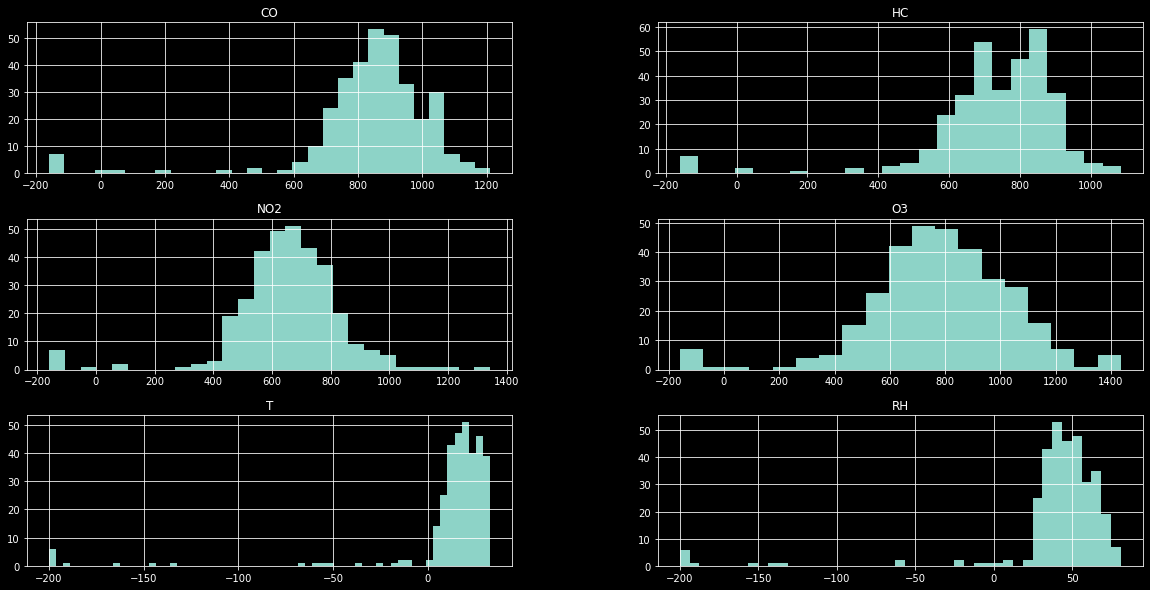

In [ ]:
plt.figure(figsize=(10, 10))
df_pivot.hist(bins="auto")
plt.show()


<u><b>Observations</b></u>

- Many values are negatively skewed which might have affected the stationarity due to the large variance between the points.
- Based on the lowest temperature recorded on earth, is -89.2&deg;C which means the values are abnormal. To fix the temperature, we will be using the interpolation process


##### Interpolation of data

As the lowest temperature recorded on earth is -89.2&deg;C, the lowest relative humidity recorded is 1 percent therefore, any values that are less than -89.2&deg;C and 1 percent temperature and relative humidity respectively should be interpolated.

Interpolation is the process of estimating unknown values that falls between 2 known points. We will be using the linear method to interpolate the data using the interpolate method in pandas. [Draws a straight line between the 2 points and estimate using the midway data of the 2 points]


In [ ]:
df_inter = df_pivot.copy(deep=True)
df_inter.loc[df_inter["T"] < -89.2, "T"] = np.nan
df_inter.loc[df_inter["RH"] < 0, "RH"] = np.nan
df_inter = df_inter.interpolate(method="time", limit_direction="forward")
df_inter


CO          HC          NO2          O3          T  \
Date                                                                      
2016-03-15  1053.200000  729.800000   933.800000  876.833333  12.020833   
2016-03-16   995.250000  681.441667  1021.750000  708.025000   9.833333   
2016-03-17  1025.250000  806.583333   881.375000  867.375000  11.292708   
2016-03-18  1064.444444  794.258333   794.527778  996.625000  12.866319   
2016-03-19  1088.741667  755.083333   800.883333  987.341667  16.016667   
...                 ...         ...          ...         ...        ...   
2017-02-01   729.422222  562.650000   797.647222  553.180556   5.267708   
2017-02-02   474.291667  347.480556   508.180556  343.500000 -55.515972   
2017-02-03   615.700000  414.475000   819.733333  334.458333 -14.272917   
2017-02-04   691.713889  458.947222   909.375000  379.513889   4.848611   
2017-02-05   867.600000  751.833333   673.741667  947.333333   7.273958   

                   RH  
Date                   
2016-03-15  54.883334  
2016-03-16  64.069791  
2016-03-17  51.107292  
2016-03-18  51.530903  
2016-03-19  48.843750  
...               ...  
2017-02-01  39.614930  
2017-02-02  34.089236  
2017-02-03  28.563542  
2017-02-04  37.832986  
2017-02-05  31.809375  

[328 rows x 6 columns]

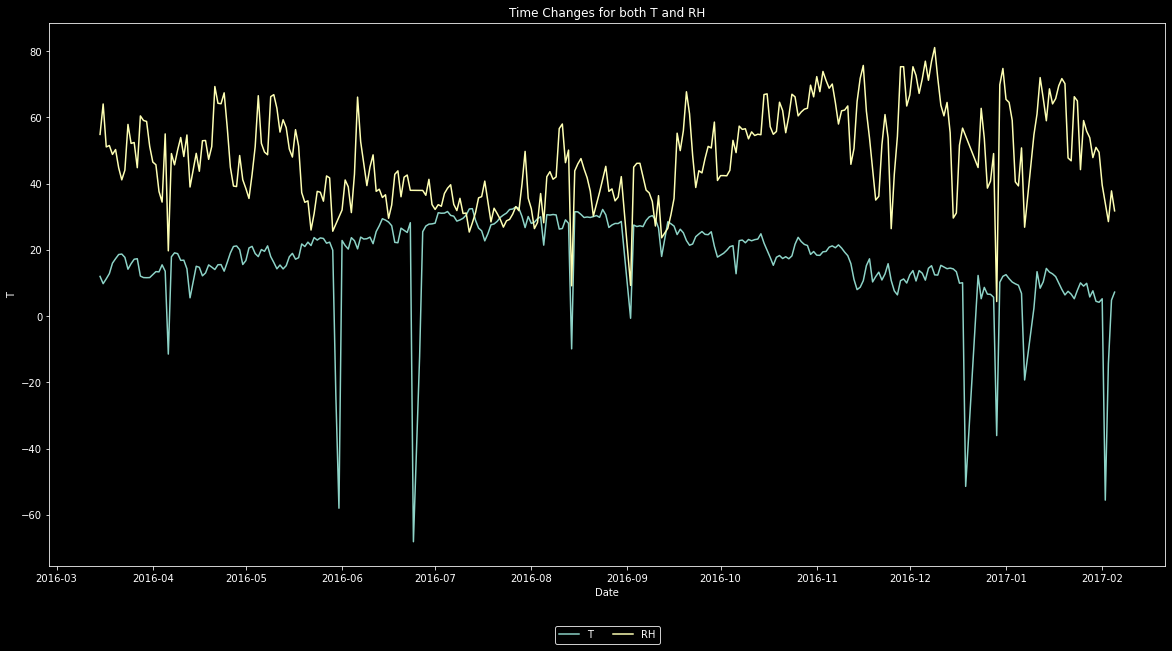

In [ ]:
plt.title("Time Changes for both T and RH")
sns.lineplot(data=df_inter, x=df_inter.index, y="T")
sns.lineplot(data=df_inter, x=df_inter.index, y="RH")
plt.legend(
    ["T", "RH"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.show()


<u><b>Observations</b></u>

After interpolating the data, there is a slight decrease and the dips in the data are more reasonable. However, as we have manipulated the data, the data might not be stationary any more therefore, we will have to do another AD Fuller Test


In [ ]:
for name, column in df_inter.iteritems():
    adfuller_test(column, name=column.name)
    print("\n")


Augmented Dickey-Fuller Test on "CO" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -9.5435
No. Lags Chosen       = 1
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
=> P-Value = 0.0. Rejecting Null Hypothesis.
=> Series is Stationary.


Augmented Dickey-Fuller Test on "HC" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -9.6683
No. Lags Chosen       = 1
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
=> P-Value = 0.0. Rejecting Null Hypothesis.
=> Series is Stationary.


Augmented Dickey-Fuller Test on "NO2" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -10.0552
No. Lags 

<u><b>Observations</b></u>

- We note that after manipulation of the feature through interpolation, there is no change in the stationarity of the 'T' and 'RH' features


### Autocorrelation Analysis

Autocorrelation is intended to measure the relationship between a variable's present value and any past values that you may have access to. In a sense, autocorrelations can help us to see how the previous can be useful for predicting the current value of gases.
We will be using ACF and PACF to do comparison.

<b>Autocorrelation:</b> the degree of similarity between the time series and it's lagged version.

<b>Partial Autocorrelation:</b> the degree similarity between the time series and it's lagged version, without account the mutual relationship with other variables.

The plots will help us in the interpretation of the p and q values for our models below later on.

We will be also doing a comparison with the interpolated data as well as the non interpolated data


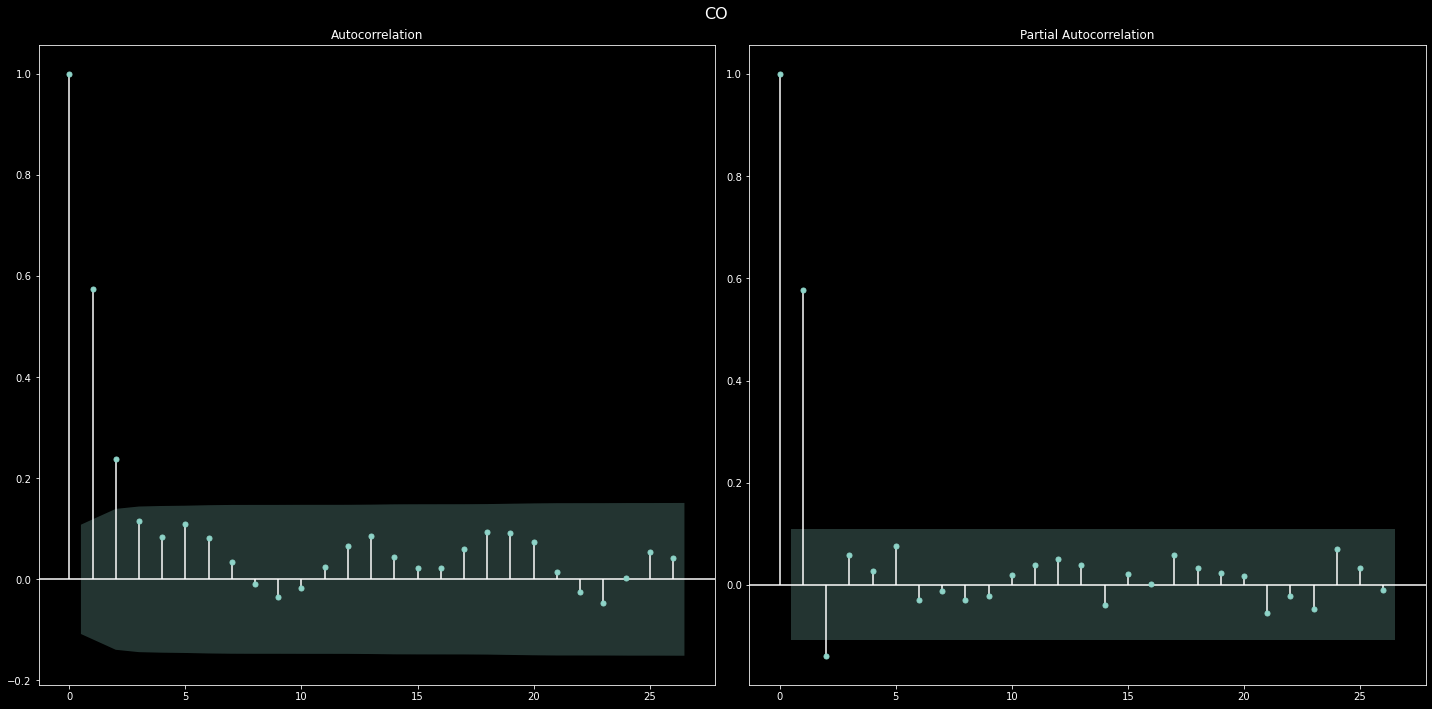

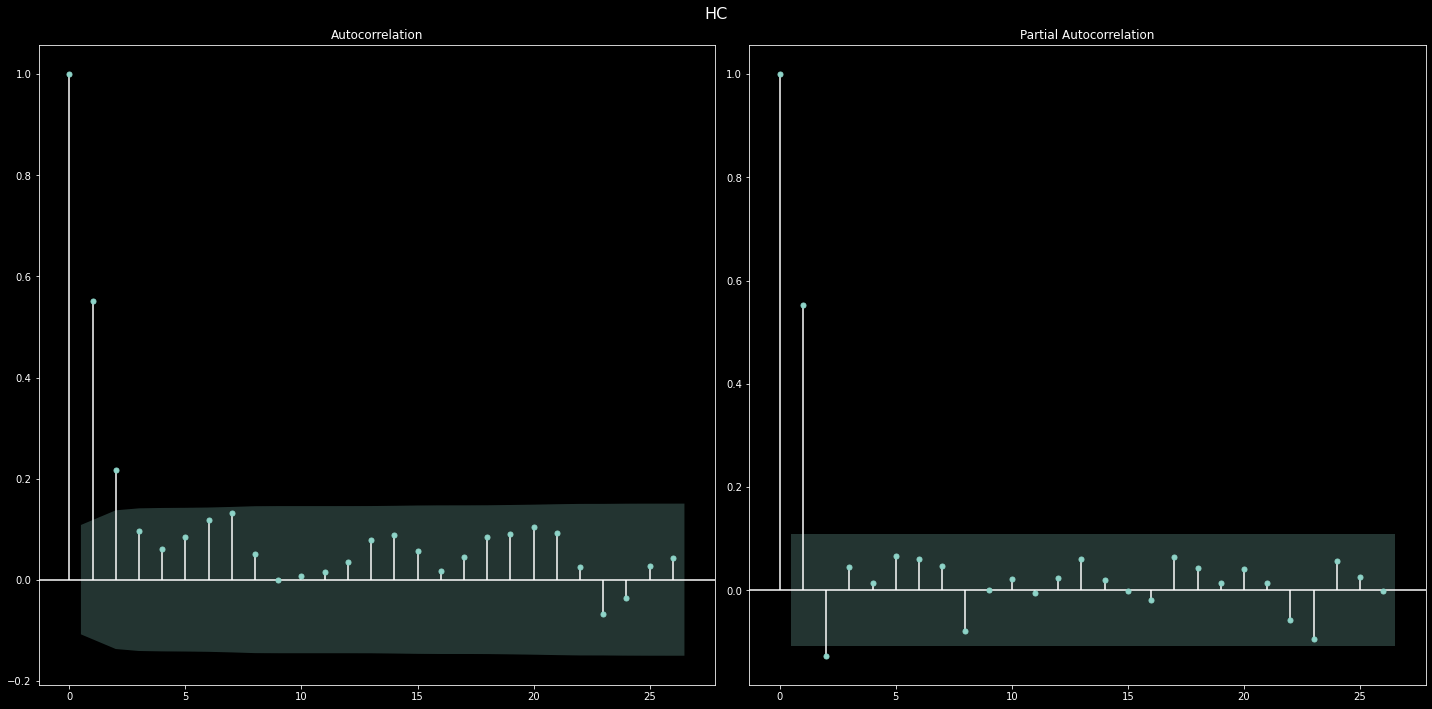

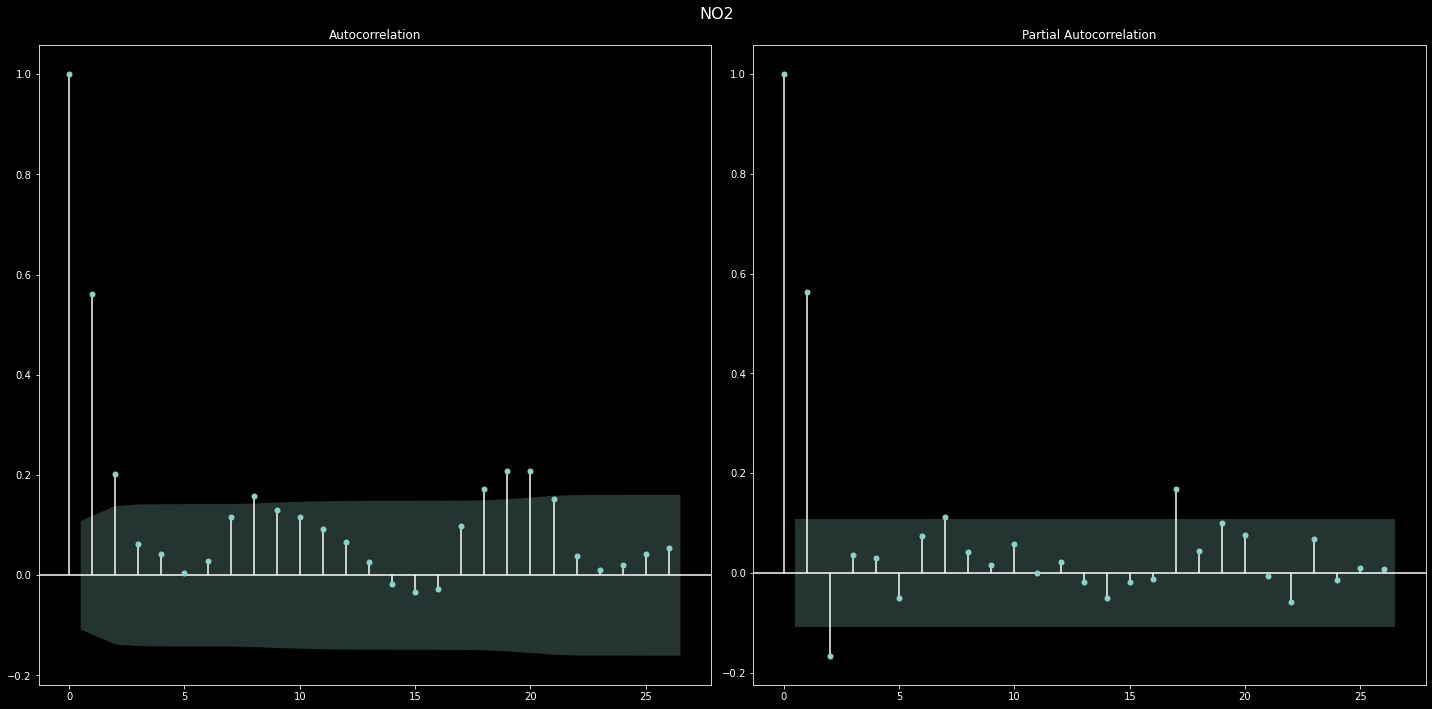

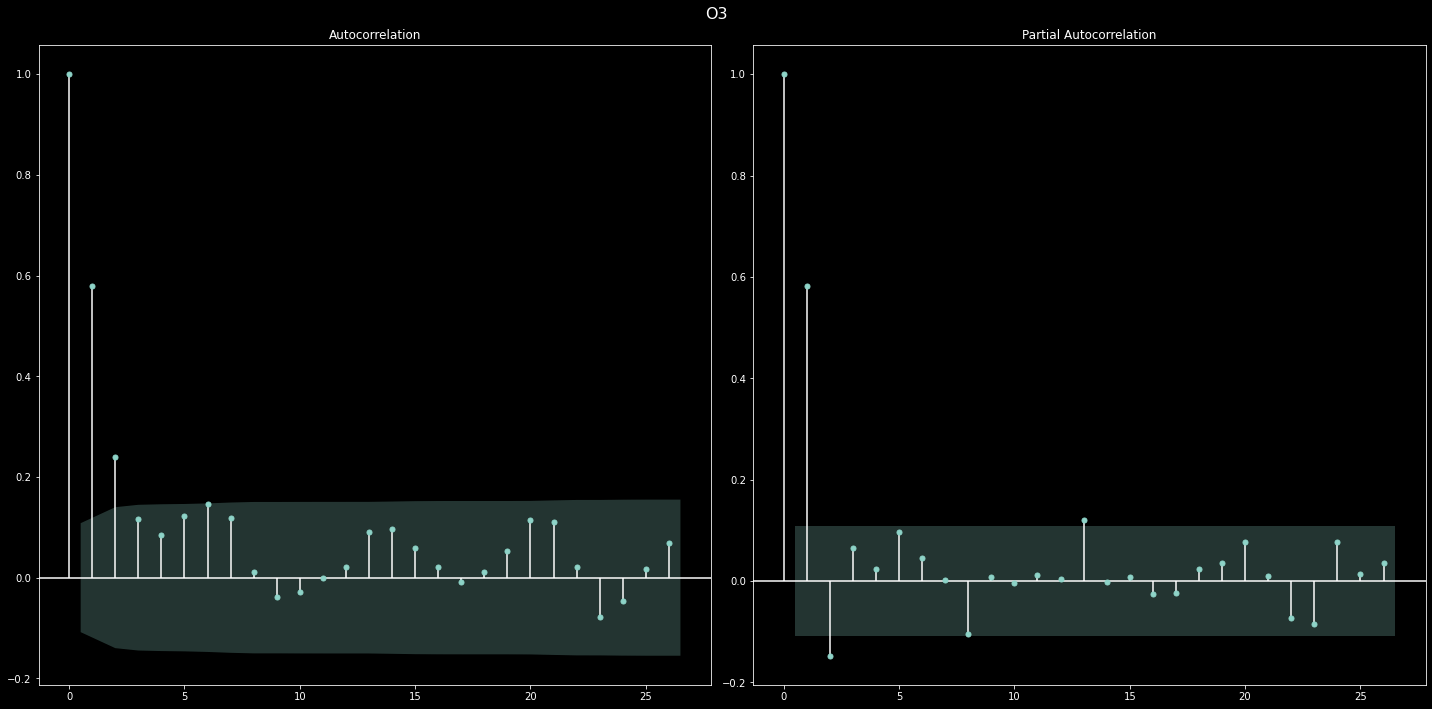

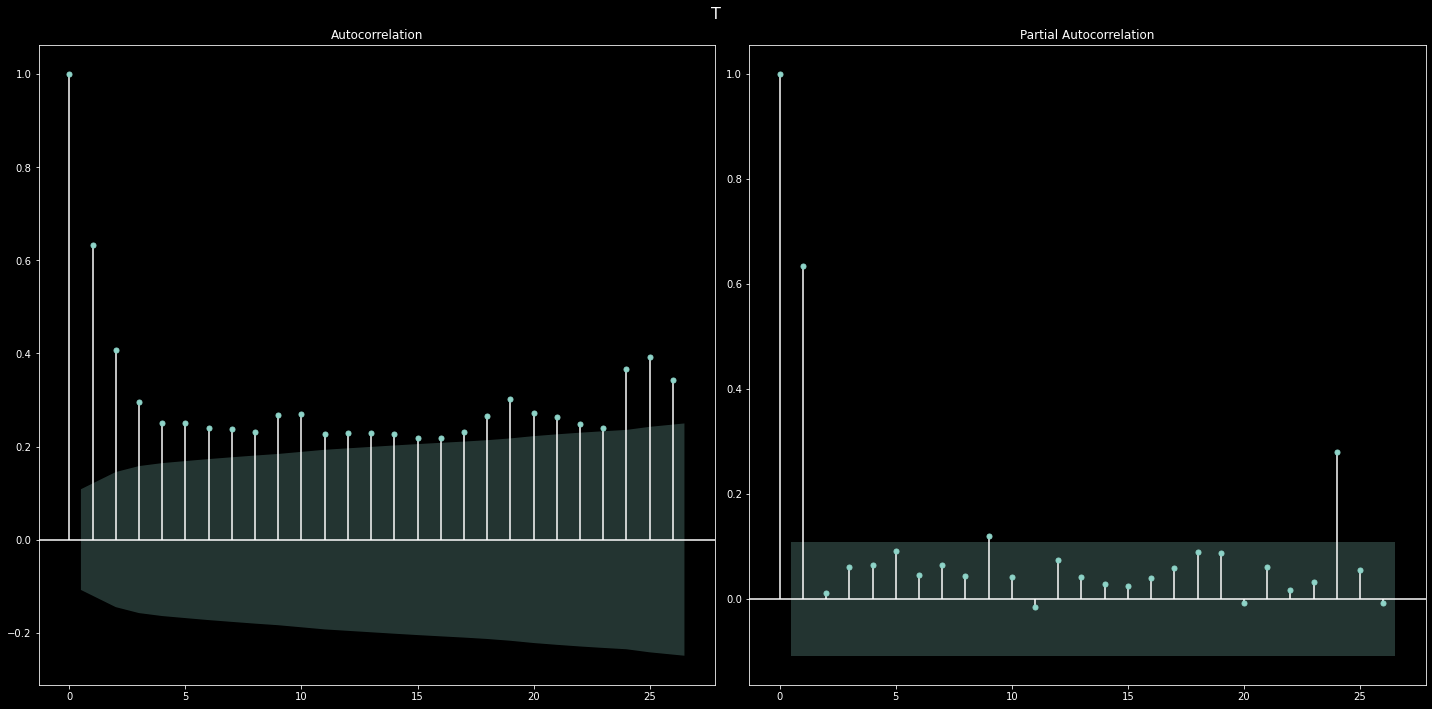

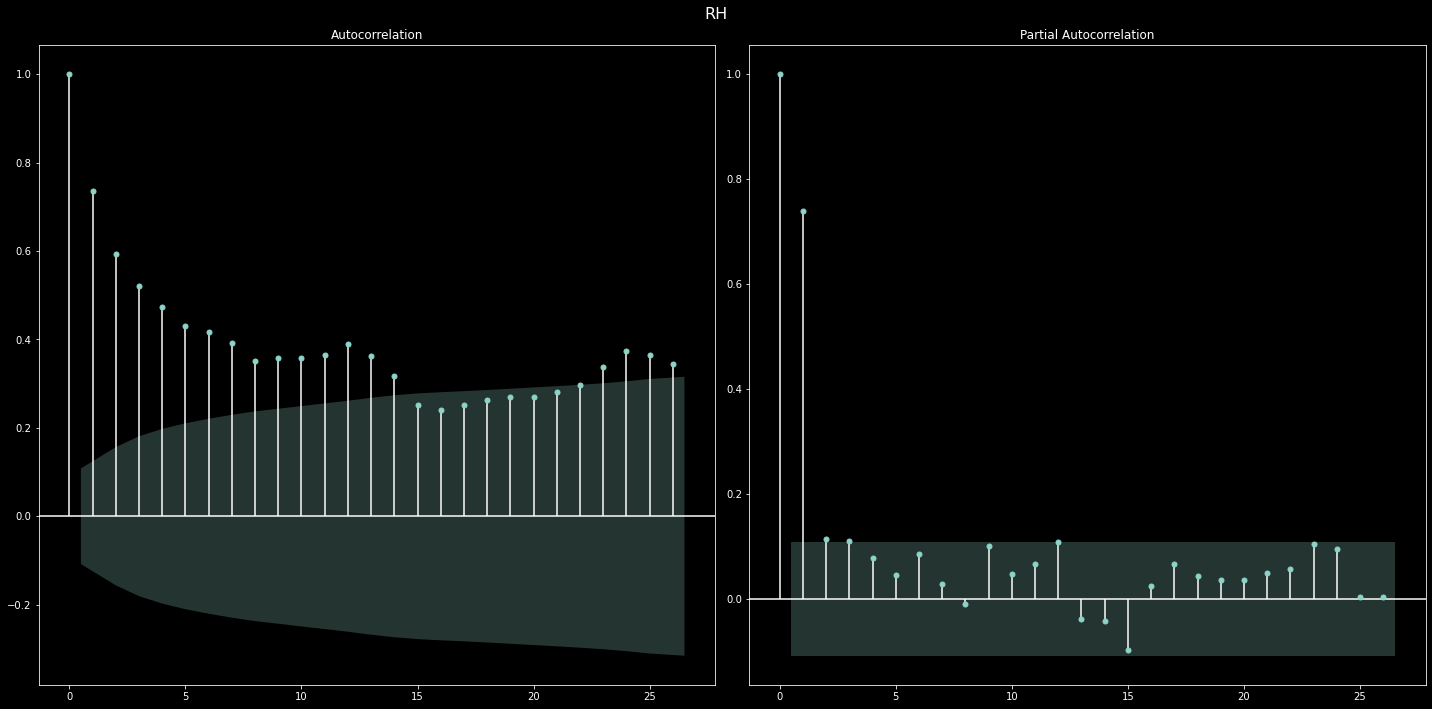

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in df_inter.columns:
    fig, ax = plt.subplots(1, 2, tight_layout=True)
    plot_acf(df_inter[i], ax=ax[0])
    plot_pacf(df_inter[i], ax=ax[1])
    fig.suptitle(i, fontsize=16)
    plt.show()


<u><b>Observations</b></u>

- We notice that at zero lag, the ACF is always at zero as that variable is 100% correlated with itself. The values inside of the blue bands are statistically insignificant.
- To choose the p value, we will first look at the partial autocorrelation plots. There is a significant lag spike at lag 1 for all the autocorrelation plot which makes p = 1 a prime candidate.
- To choose the q value, we will look at the autocorrelation plot. Any points that are outside of the blue shaded region are potential candidates which means q = 1 - 14 is a good number. q = 1 and q = 2 are better candidates as all correlation plots have the two lags outside of the blue region.


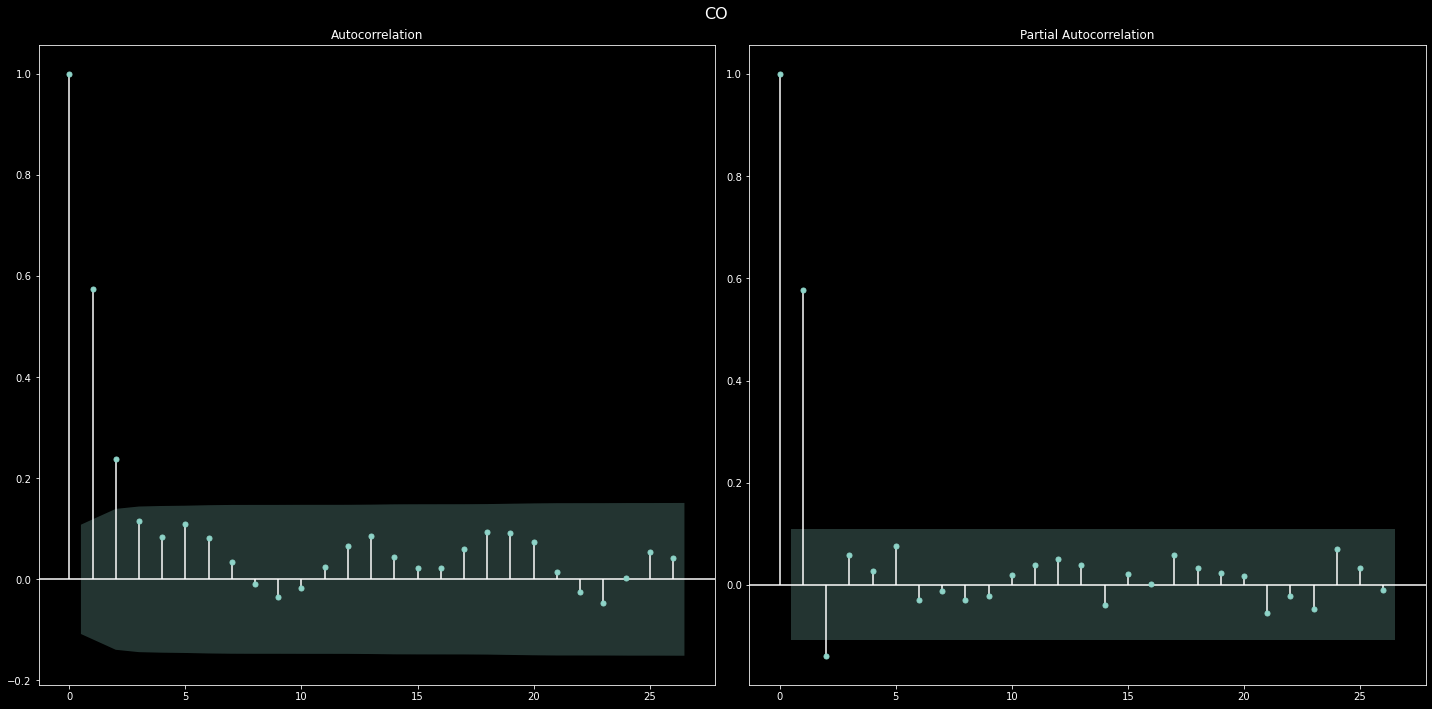

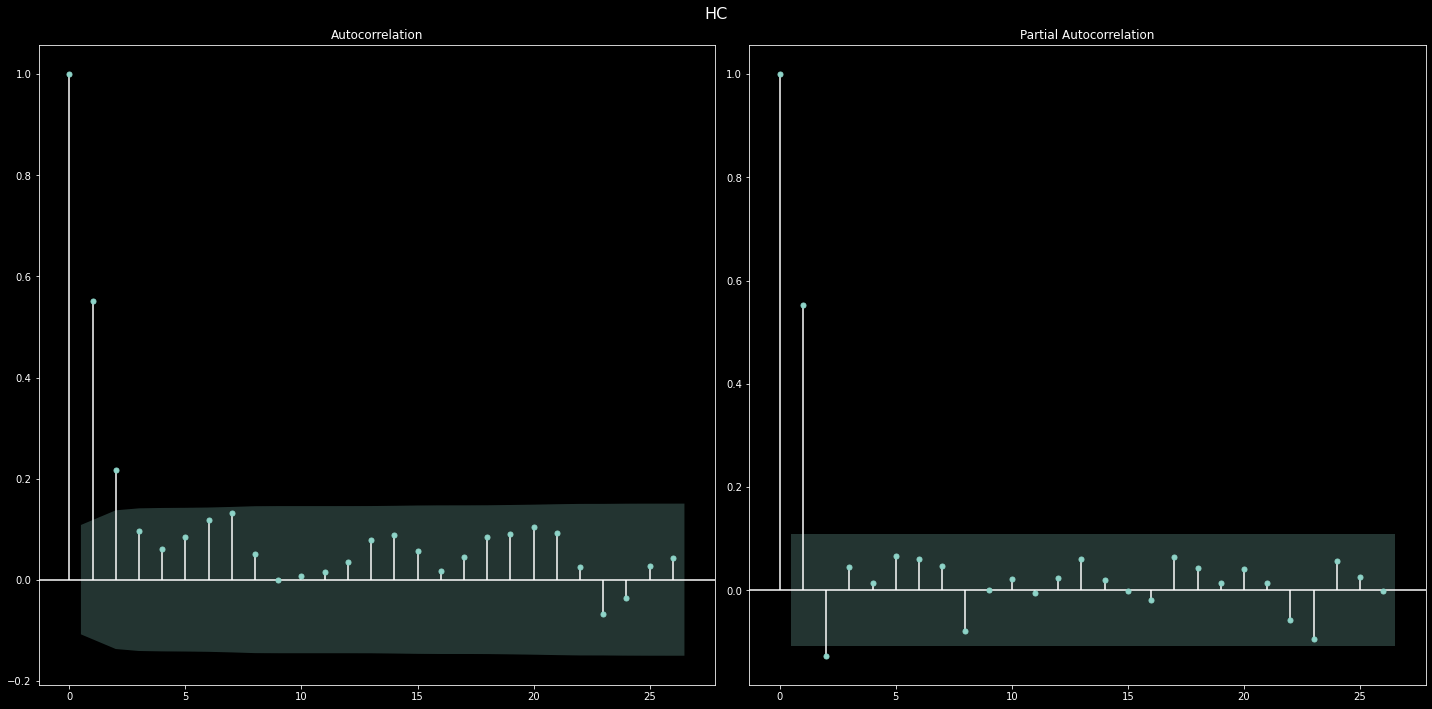

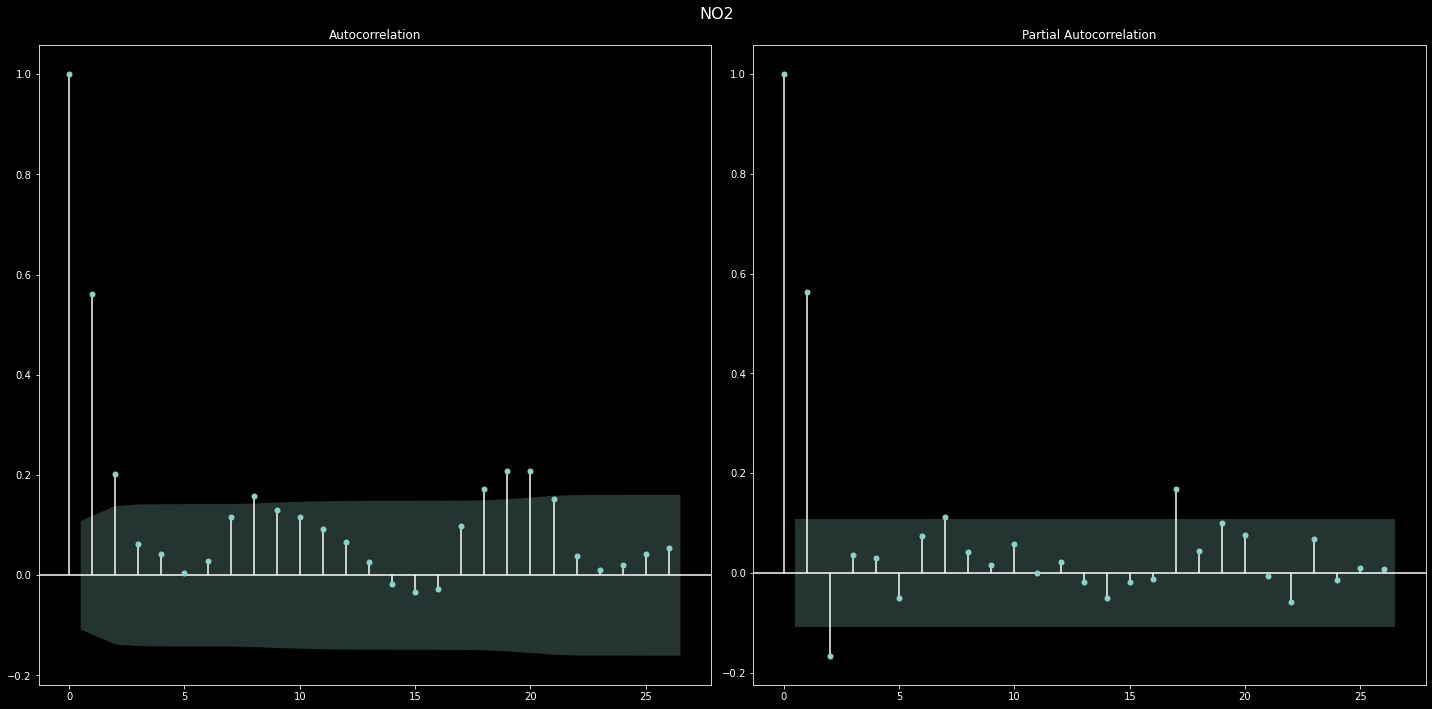

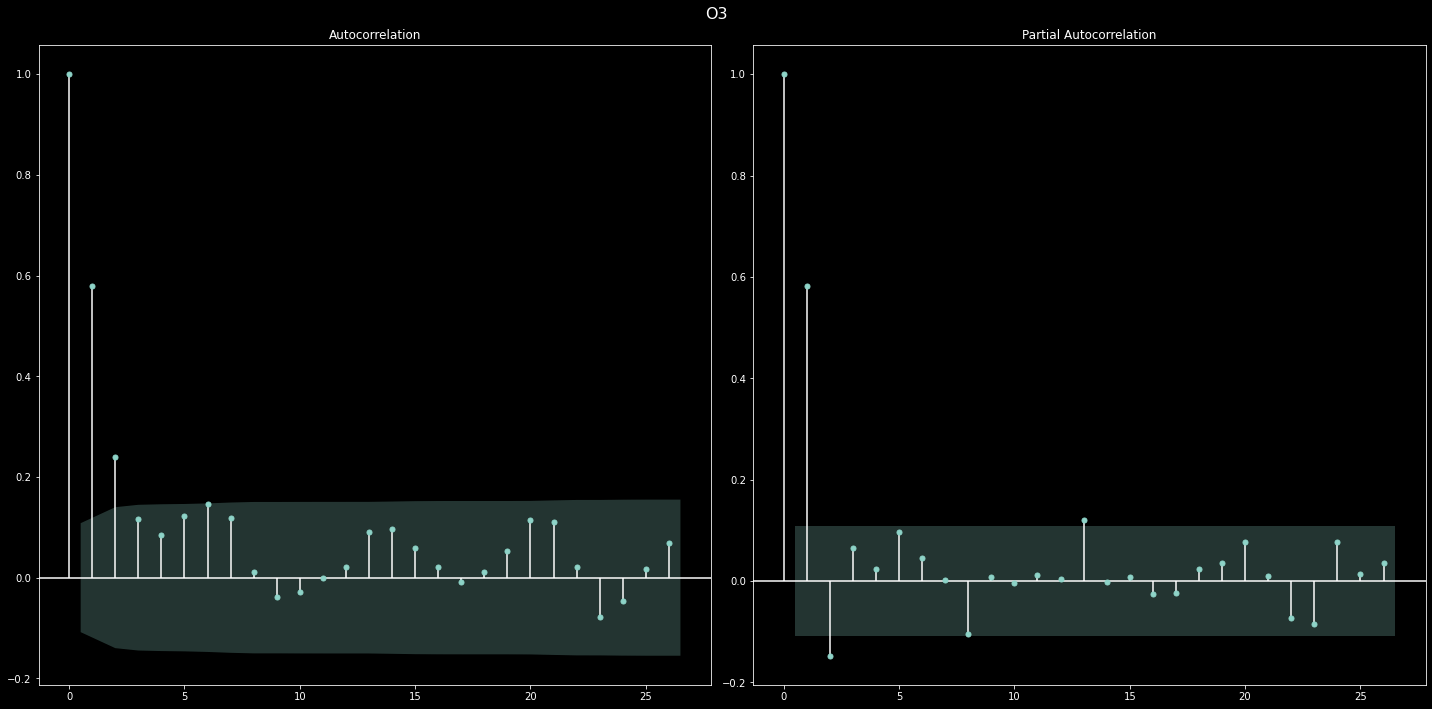

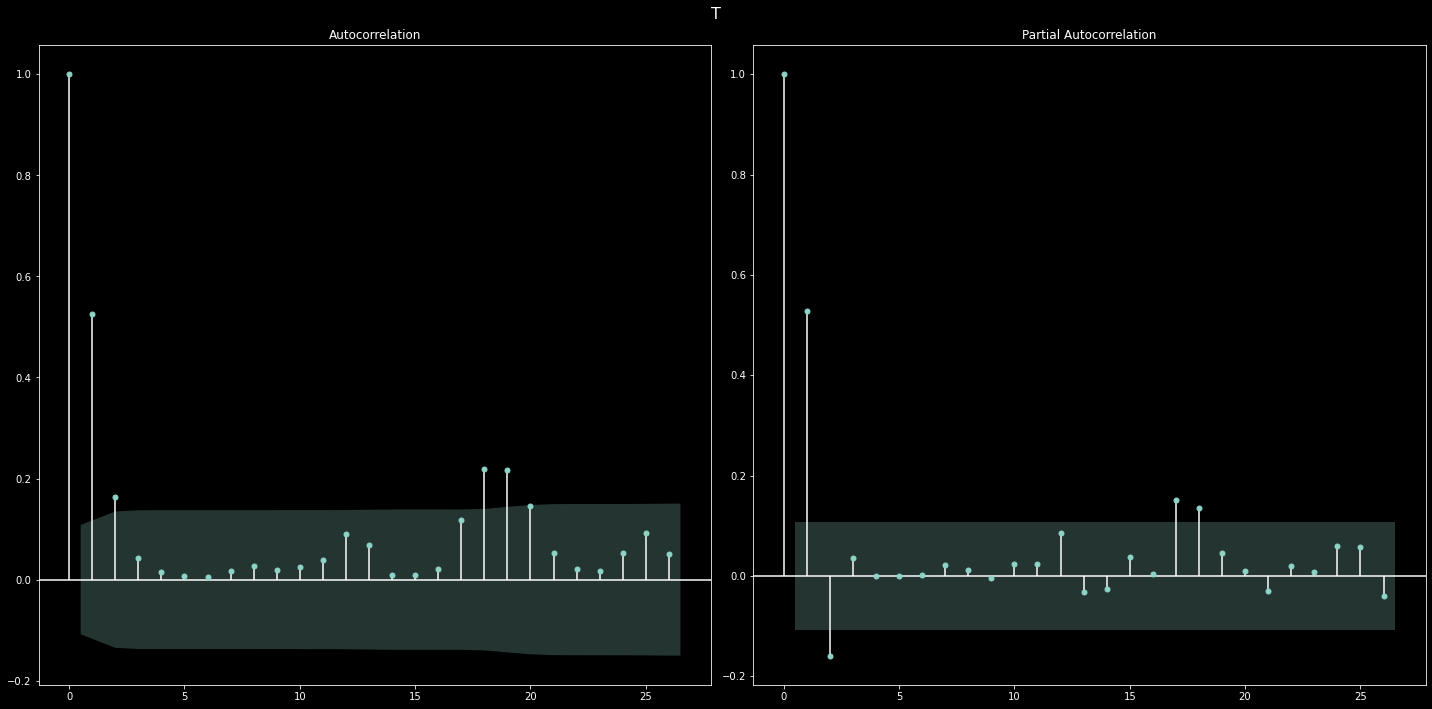

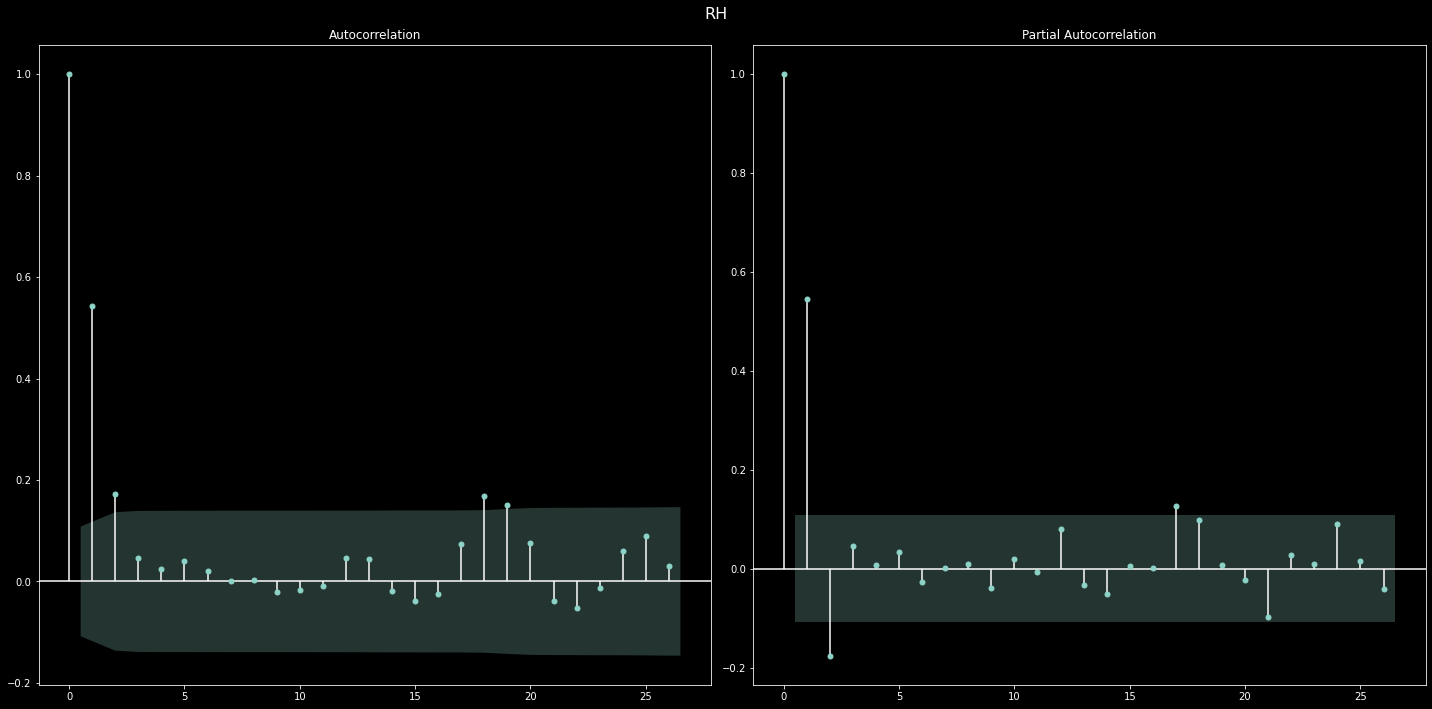

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in df_pivot.columns:
    fig, ax = plt.subplots(1, 2, tight_layout=True)
    plot_acf(df_pivot[i], ax=ax[0])
    plot_pacf(df_pivot[i], ax=ax[1])
    fig.suptitle(i, fontsize=16)
    plt.show()


<u><b>Observations</b></u>

- To choose the p value, we will first look at the partial autocorrelation plots. There is a significant lag spike at lag [0,1,2] for all the autocorrelation plot which makes p = [0,1,2] prime candidates.
- To choose the q value, we will look at the autocorrelation plot. Any points that are outside of the blue shaded region are potential candidates which means q = [0,1,2] is a good number.

This values will be used to help us to get the perfect number of AR and MA to train our models

CO (p,q) = (1,2)

HC (p,q) = (1,2)

NO2 (p,q) = (1,2)

O3 (p,q) = (1,2)


# Model Selection

There are many models for time series. We will be using 3 models and doing a comparison.

1. ARIMA (Baseline)
2. SARIMA
3. VARMAX

ARIMA vs SARIMA:
Autoregressive Integrated Moving Average(ARIMA) is an forecasting algorithm which takes intro account the past values and predict the future value based on the autoregressive and moving average. Seasonal Autoregressive Integrated Moving Average(SARIMA) is very similar to ARIMA but SARIMA takes into account the seasonality patterns in the time series.

ARIMA & SARIMA vs VARMAX
Both ARIMA & SARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. While the VARMAX procedure enables you to model the dynamic relationship both between the dependent variables and also between the dependent and independent variables. VARMAX models are defined in terms of the orders of the autoregressive or moving-average process (or both).

The gist is that ARIMA & SARIMA is used for univariate data while VARMAX is used for multivariate data. SARIMA takes into account seasonality and ARIMA does not.


Before we start making the models, we need to make sure the dates in our data has been formatted to individual days and remove all na values


In [ ]:
df_model = df_pivot.copy().dropna().to_period("d")
df_model


CO          HC          NO2          O3          T  \
Date                                                                      
2016-03-15  1053.200000  729.800000   933.800000  876.833333  12.020833   
2016-03-16   995.250000  681.441667  1021.750000  708.025000   9.833333   
2016-03-17  1025.250000  806.583333   881.375000  867.375000  11.292708   
2016-03-18  1064.444444  794.258333   794.527778  996.625000  12.866319   
2016-03-19  1088.741667  755.083333   800.883333  987.341667  16.016667   
...                 ...         ...          ...         ...        ...   
2017-02-01   729.422222  562.650000   797.647222  553.180556   5.267708   
2017-02-02   474.291667  347.480556   508.180556  343.500000 -55.515972   
2017-02-03   615.700000  414.475000   819.733333  334.458333 -14.272917   
2017-02-04   691.713889  458.947222   909.375000  379.513889   4.848611   
2017-02-05   867.600000  751.833333   673.741667  947.333333   7.273958   

                   RH  
Date                   
2016-03-15  54.883334  
2016-03-16  64.069791  
2016-03-17  51.107292  
2016-03-18  51.530903  
2016-03-19  48.843750  
...               ...  
2017-02-01  39.614930  
2017-02-02 -24.010417  
2017-02-03  28.563542  
2017-02-04  37.832986  
2017-02-05  31.809375  

[328 rows x 6 columns]

In [ ]:
df_inter_model = df_inter.copy().dropna().to_period("d")
df_inter_model


CO          HC          NO2          O3          T  \
Date                                                                      
2016-03-15  1053.200000  729.800000   933.800000  876.833333  12.020833   
2016-03-16   995.250000  681.441667  1021.750000  708.025000   9.833333   
2016-03-17  1025.250000  806.583333   881.375000  867.375000  11.292708   
2016-03-18  1064.444444  794.258333   794.527778  996.625000  12.866319   
2016-03-19  1088.741667  755.083333   800.883333  987.341667  16.016667   
...                 ...         ...          ...         ...        ...   
2017-02-01   729.422222  562.650000   797.647222  553.180556   5.267708   
2017-02-02   474.291667  347.480556   508.180556  343.500000 -55.515972   
2017-02-03   615.700000  414.475000   819.733333  334.458333 -14.272917   
2017-02-04   691.713889  458.947222   909.375000  379.513889   4.848611   
2017-02-05   867.600000  751.833333   673.741667  947.333333   7.273958   

                   RH  
Date                   
2016-03-15  54.883334  
2016-03-16  64.069791  
2016-03-17  51.107292  
2016-03-18  51.530903  
2016-03-19  48.843750  
...               ...  
2017-02-01  39.614930  
2017-02-02  34.089236  
2017-02-03  28.563542  
2017-02-04  37.832986  
2017-02-05  31.809375  

[328 rows x 6 columns]

### Splitting data points


In [ ]:
x, y = df_model[["T", "RH"]], df_model.drop(["T", "RH"], axis=1)
print(x.shape, y.shape)


(328, 2) (328, 4)


In [ ]:
train_size = int(len(df_model) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")



x_train.shape = (262, 2), y_train.shape = (262, 4)
x_test.shape = (66, 2), y_test.shape = (66, 4)


In [ ]:
x_inter, y_inter = df_inter_model[["T", "RH"]], df_inter_model.drop(["T", "RH"], axis=1)
print(x_inter.shape, y_inter.shape)


(328, 2) (328, 4)


In [ ]:
train_size = int(len(df_inter_model) * 0.8)
x_inter_train, x_inter_test = x_inter[:train_size], x_inter[train_size:]
y_inter_train, y_inter_test = y_inter[:train_size], y_inter[train_size:]
print(f"x_train.shape = {x_inter_train.shape}, y_train.shape = {y_inter_train.shape}")
print(f"x_test.shape = {x_inter_test.shape}, y_test.shape = {y_inter_test.shape}")



x_train.shape = (262, 2), y_train.shape = (262, 4)
x_test.shape = (66, 2), y_test.shape = (66, 4)


### ARIMA & SARIMA

We will need to make more changes to the dataset as ARIMA & SARIMA is only able to train on time series at a time which means we will have to break the data into 4 different parts for the 4 different Gases.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
GAS_List = ["CO", "HC", "NO2", "O3"]
CO_train, CO_test = y_train["CO"], y_test["CO"]
HC_train, HC_test = y_train["HC"], y_test["HC"]
NO2_train, NO2_test = y_train["NO2"], y_test["NO2"]
O3_train, O3_test = y_train["O3"], y_test["O3"]

GAS_train = [CO_train, HC_train, NO2_train, O3_train]
GAS_test = [CO_test, HC_test, NO2_test, O3_test]



In [ ]:
CO_inter_train, CO_inter_test = y_inter_train["CO"], y_inter_test["CO"]
HC_inter_train, HC_inter_test = y_inter_train["HC"], y_inter_test["HC"]
NO2_inter_train, NO2_inter_test = y_inter_train["NO2"], y_inter_test["NO2"]
O3_inter_train, O3_inter_test = y_inter_train["O3"], y_inter_test["O3"]

GAS_inter_train = [CO_inter_train, HC_inter_train, NO2_inter_train, O3_inter_train]
GAS_inter_test = [CO_inter_test, HC_inter_test, NO2_inter_test, O3_inter_test]



### ARIMA - Baseline


                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                  262
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1476.857
Date:                Thu, 11 Aug 2022   AIC                           2963.714
Time:                        10:39:53   BIC                           2981.536
Sample:                    03-15-2016   HQIC                          2970.878
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              1.1795      0.584      2.021      0.043       0.036       2.323
RH             3.0268      0.511      5.922      0.000       2.025       4.029
ar.L1          0.6957      0.060     11.607      0.0

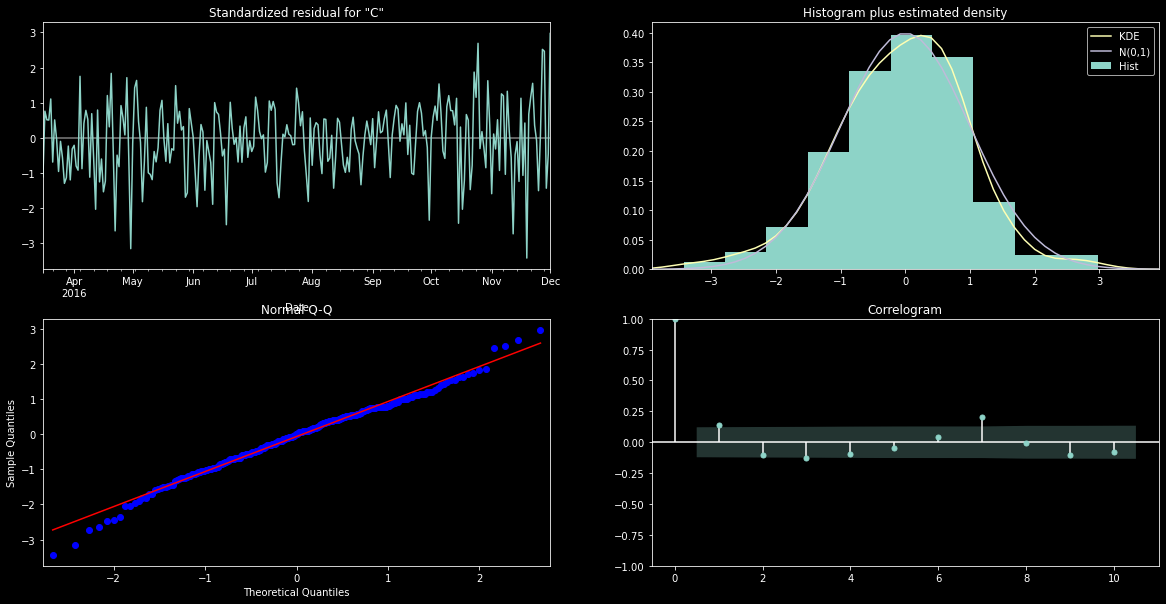

                               SARIMAX Results                                
Dep. Variable:                     HC   No. Observations:                  262
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1534.437
Date:                Thu, 11 Aug 2022   AIC                           3078.874
Time:                        10:39:54   BIC                           3096.696
Sample:                    03-15-2016   HQIC                          3086.038
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              3.0700      0.762      4.028      0.000       1.576       4.564
RH             0.8775      0.670      1.309      0.191      -0.437       2.192
ar.L1          0.5595      0.060      9.388      0.0

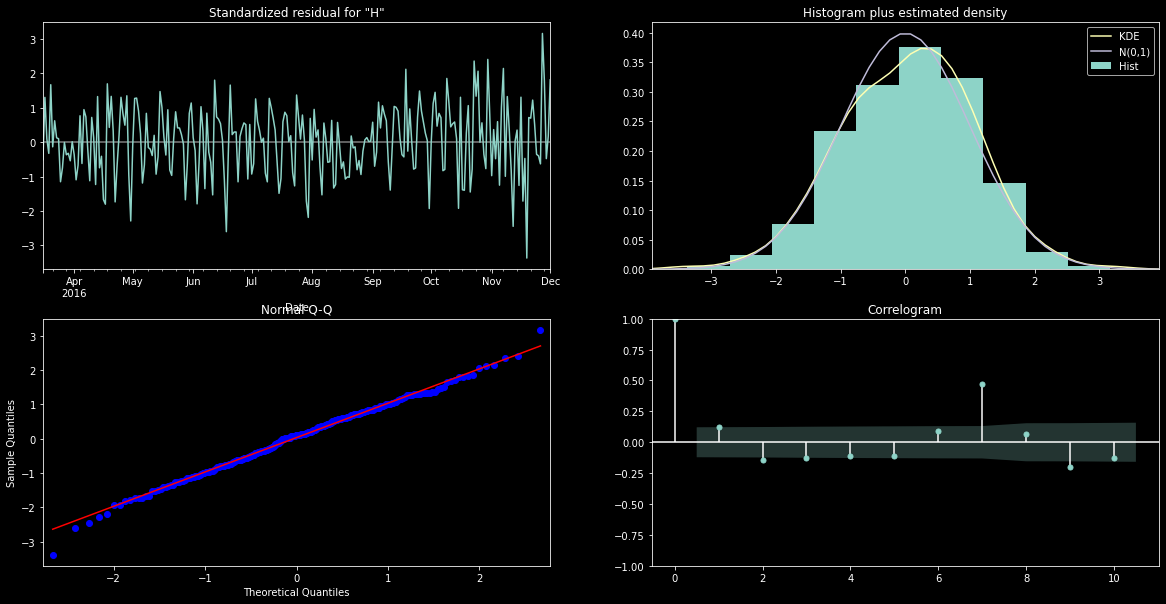

c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                  262
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1565.483
Date:                Thu, 11 Aug 2022   AIC                           3140.965
Time:                        10:39:55   BIC                           3158.788
Sample:                    03-15-2016   HQIC                          3148.130
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              3.9984      0.873      4.578      0.000       2.287       5.710
RH            -0.2482      0.756     -0.328      0.743      -1.729       1.233
ar.L1          0.5797      0.055     10.451      0.0

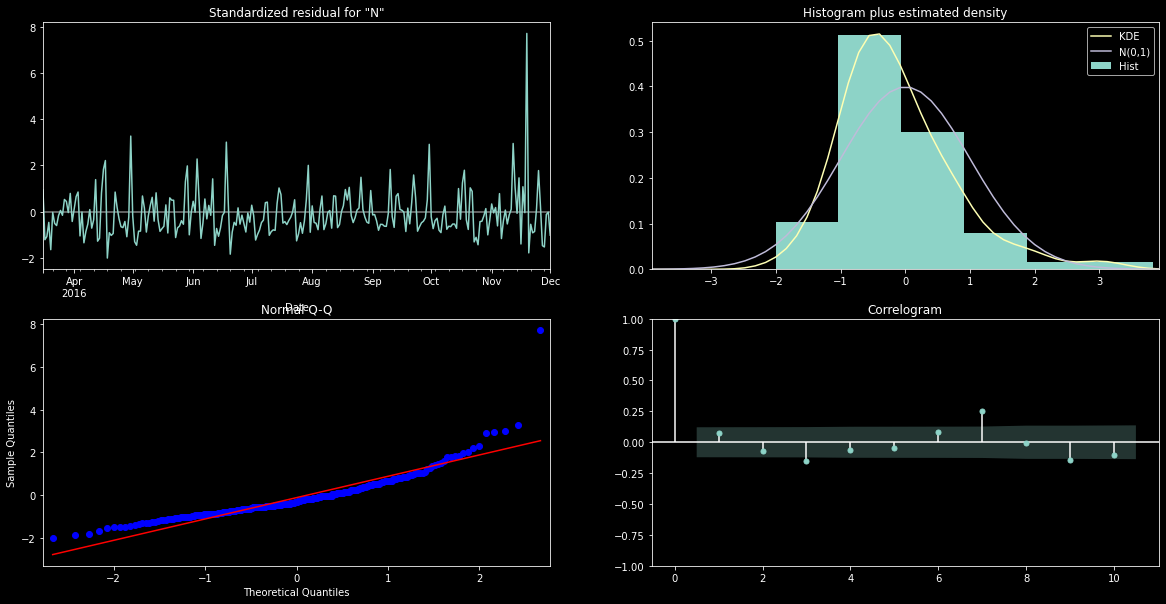

c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     O3   No. Observations:                  262
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1687.731
Date:                Thu, 11 Aug 2022   AIC                           3385.461
Time:                        10:39:56   BIC                           3403.284
Sample:                    03-15-2016   HQIC                          3392.625
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              2.6711      1.264      2.113      0.035       0.194       5.149
RH             1.1397      1.104      1.032      0.302      -1.024       3.304
ar.L1         -0.7332      0.365     -2.008      0.0

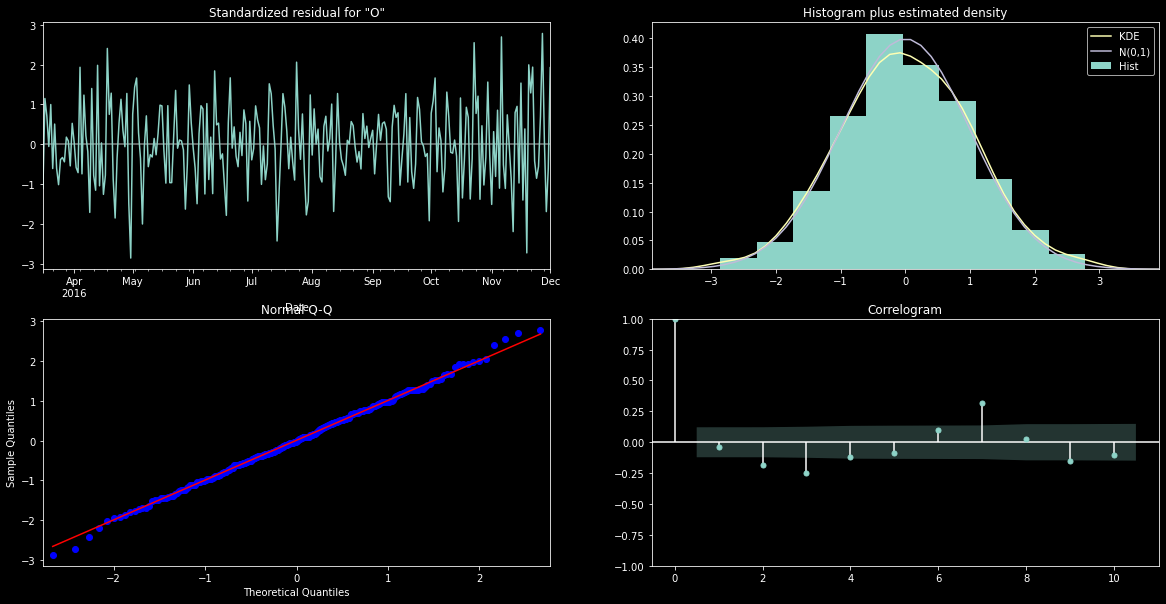

In [ ]:
model_Arr = []
for i in range(len(GAS_train)):
    model_Arr.append(ARIMA(endog=GAS_train[i], exog=x_train, order=(1, 1, 1)).fit())
    print(model_Arr[i].summary())
    model_Arr[i].plot_diagnostics()
    plt.show()


<u><b>Observations</b></u>

In the P>|z| column, it represents the term significance using a hypothesis testing with the following hypothesis

$H_0$: Each coefficient is NOT statistically significant

$H_1$: Each coefficient is statistically significant

The Ljung-Box (L1) (Q) is the LBQ test statistic at lag 1. It is used as a hypothesis testing for the following hypothesis

$H_0$: The errors are white noise

$H_1$: The errors are not white noise

Heteroskedasticity (H) tests that the error residuals are homoscedastic or have the same variance.

$H_0$: The residuals show variances

$H_1$: The residuals show no variances

Jarque-Bera tests for the normality of errors.

$H_0$: Data is normally distributed against an alternative of another distribution

$H_1$: Data is not normally distributed against an alternative of another distribution

The log-likelihood function identifies a distribution that fits best with the sampled data.

Akaike’s Information Criterion (AIC) helps determine the strength of the linear regression model. The AIC penalizes a model for adding parameters since adding more parameters will always increase the maximum likelihood value.

Bayesian Information Criterion (BIC), like the AIC, also punishes a model for complexity, but it also incorporates the number of rows in the data.

Hannan-Quinn Information Criterion (HQIC), like AIC and BIC, is another criterion for model selection; however, it’s not used as often in practice.

Residuals

The difference between the observations and the corresponding fitted values.

$$
e_{t} = y_{t} - \hat{y}_{t}
$$

A good forecast will yield the following:

1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

<u><b>Individual Gases Observations</b></u>

- CO
  - All coefficients are statistically significant
  - The errors caused are white noise
  - The residuals show no variances
  - Data is normally distributed against an alternative of another distribution
- HC
  - All coefficients are statistically significant
  - The errors caused are white noise
  - The residuals show variances
  - Data is not normally distributed against an alternative of another distribution
- NO2
  - RH is not statistically significant as its p-value is 0.302 which is > 0.05
  - The errors caused are not white noise
  - The residuals show variances
  - Data is normally distributed against an alternative of another distribution
- O3
  - RH is not statistically significant as its p-value is 0.743 which is > 0.05
  - The errors caused are not white noise
  - The residuals show no variances
  - Data is not normally distributed against an alternative of another distribution

In conclusion, each model will need to be tuned further using their respective orders collected through the autocorrelation and partial autocorrelation plots. Based on the residuals from all the models, it is generally centered to 0 which means it is generally correct however there are a lot of spikes which means the residuals are very staggered. The histogram suggest that the residual may not be normal as they are left skewed, left skewed, right skewed and right skewed respectively for CO,HC,NO2,O3. There is also a spike in correlogram value of 7. This is likely due to the fact that there is a seasonality of 7 in this Time Series which makes lag 7 an important values. This will be remedied using SARIMA as it takes into account for seasonality.


In [ ]:
CO_model = ARIMA(endog=CO_train, exog=x_train, order=(1, 1, 2)).fit()
HC_model = ARIMA(endog=HC_train, exog=x_train, order=(1, 1, 2)).fit()
NO2_model = ARIMA(endog=NO2_train, exog=x_train, order=(1, 1, 2)).fit()
O3_model = ARIMA(endog=O3_train, exog=x_train, order=(1, 1, 2)).fit()
CO_pred = CO_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)
HC_pred = HC_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)
NO2_pred = NO2_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)
O3_pred = O3_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)

GAS_pred = [CO_pred, HC_pred, NO2_pred, O3_pred]



c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


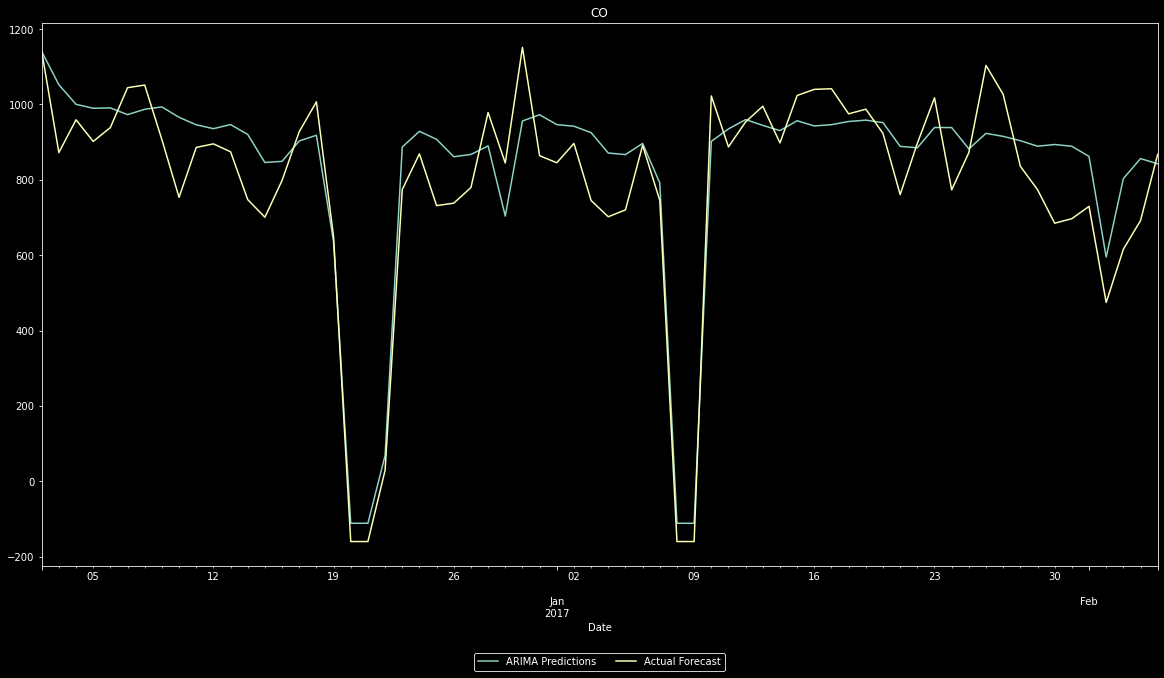

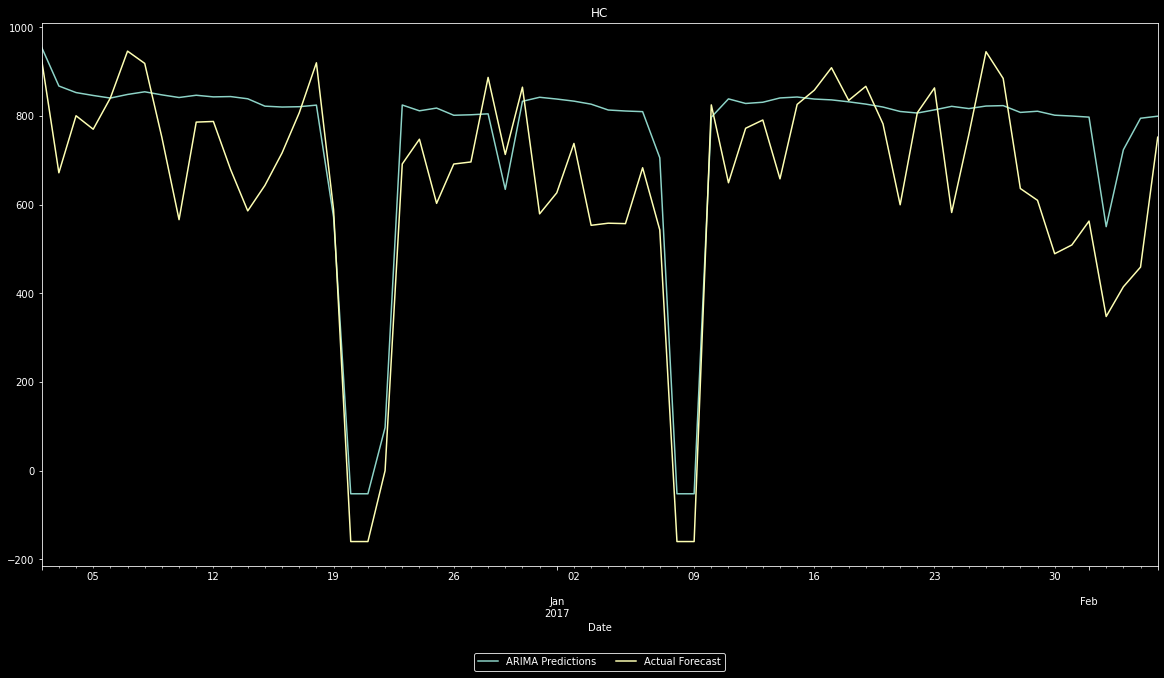

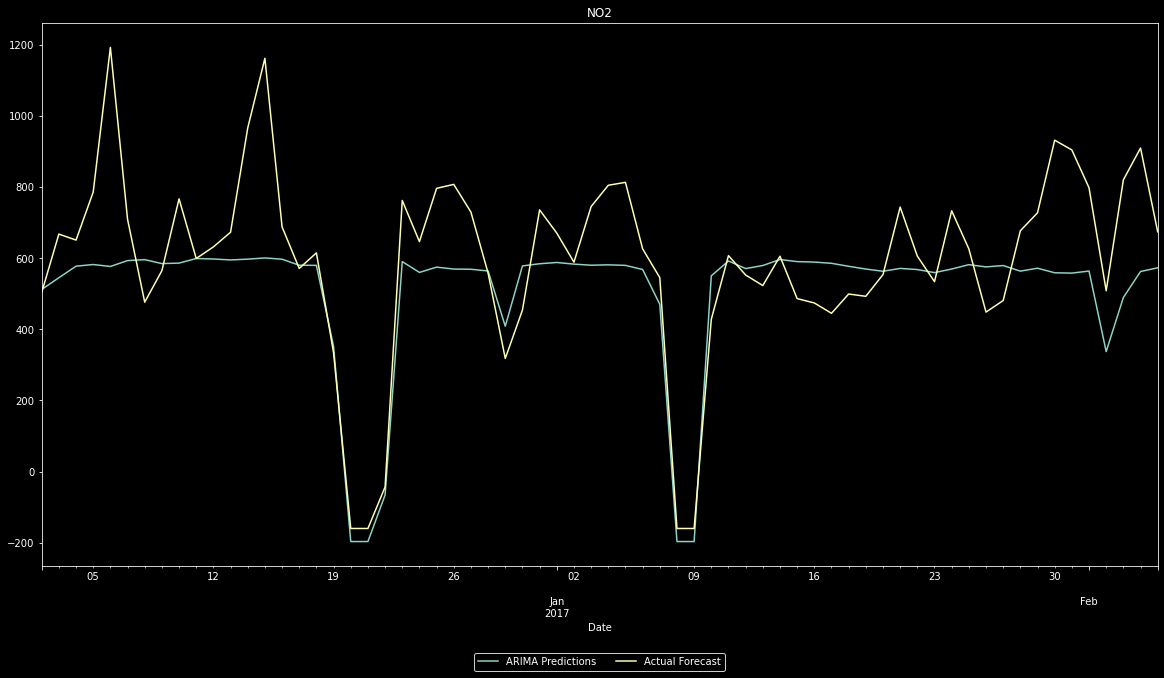

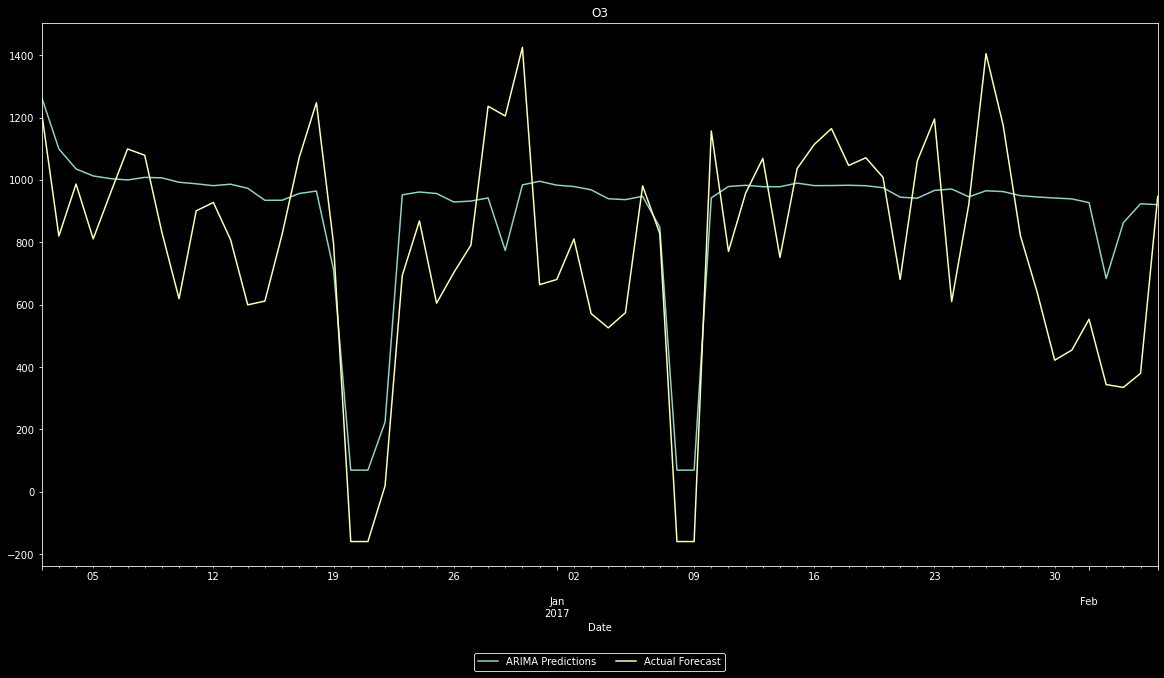

In [ ]:
for i in range(len(GAS_pred)):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    GAS_pred[i].plot(ax=ax)
    GAS_test[i].plot(ax=ax)
    plt.title(GAS_List[i])
    plt.legend(
        ["ARIMA Predictions", "Actual Forecast"],
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        fancybox=True,
        shadow=True,
        ncol=3,
    )
    plt.show()



In [ ]:
CO_inter_model = ARIMA(endog=CO_inter_train, exog=x_inter_train, order=(1, 1, 2)).fit()
HC_inter_model = ARIMA(endog=HC_inter_train, exog=x_inter_train, order=(1, 1, 2)).fit()
NO2_inter_model = ARIMA(
    endog=NO2_inter_train, exog=x_inter_train, order=(1, 1, 2)
).fit()
O3_inter_model = ARIMA(endog=O3_inter_train, exog=x_inter_train, order=(1, 1, 2)).fit()
CO_inter_pred = CO_inter_model.predict(
    start=x_inter_test.index[0], end=x_inter_test.index[-1], exog=x_inter_test
)
HC_inter_pred = HC_inter_model.predict(
    start=x_inter_test.index[0], end=x_inter_test.index[-1], exog=x_inter_test
)
NO2_inter_pred = NO2_inter_model.predict(
    start=x_inter_test.index[0], end=x_inter_test.index[-1], exog=x_inter_test
)
O3_inter_pred = O3_inter_model.predict(
    start=x_inter_test.index[0], end=x_inter_test.index[-1], exog=x_inter_test
)

GAS_inter_pred = [CO_inter_pred, HC_inter_pred, NO2_inter_pred, O3_inter_pred]



c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


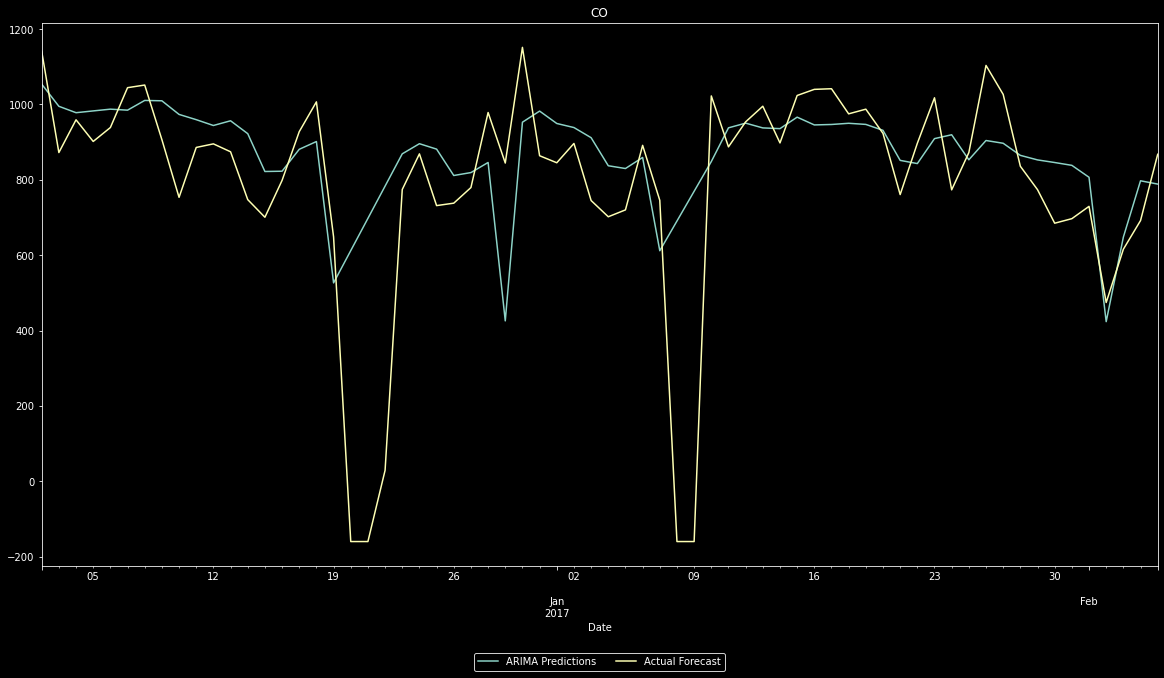

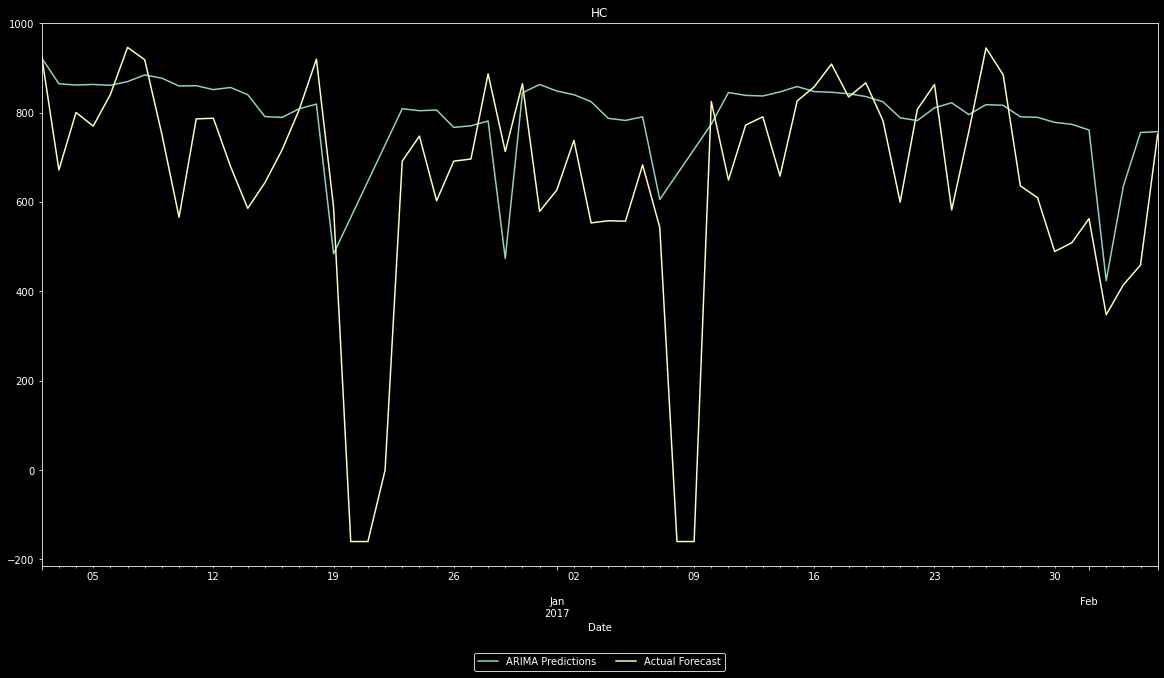

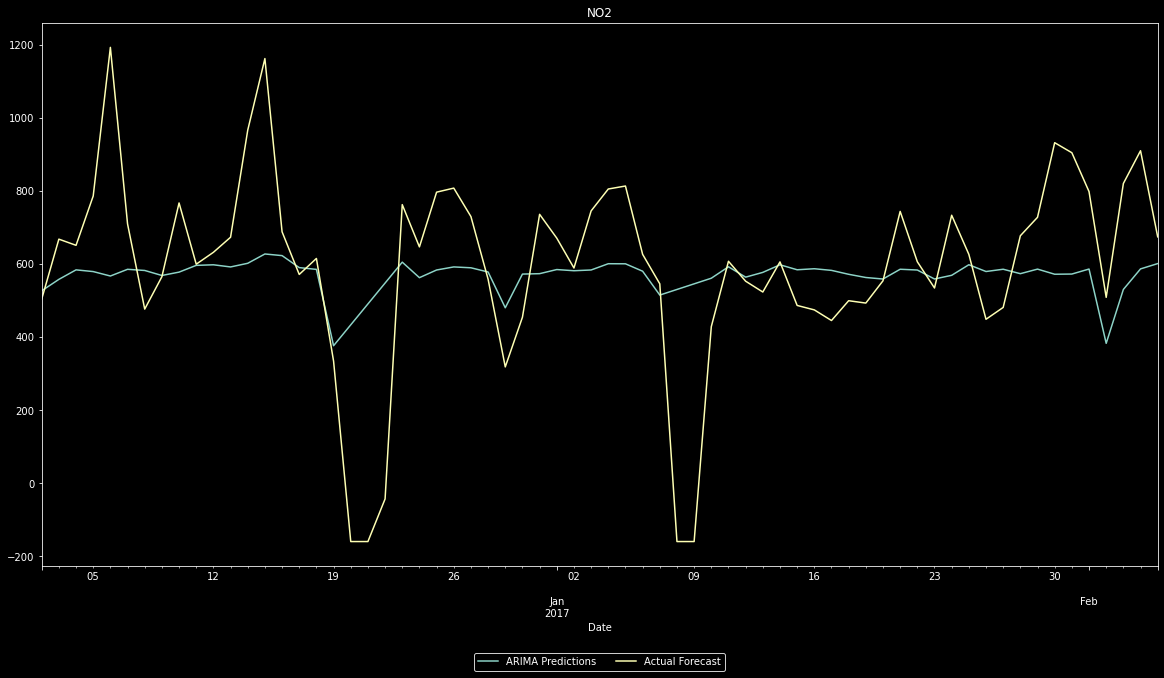

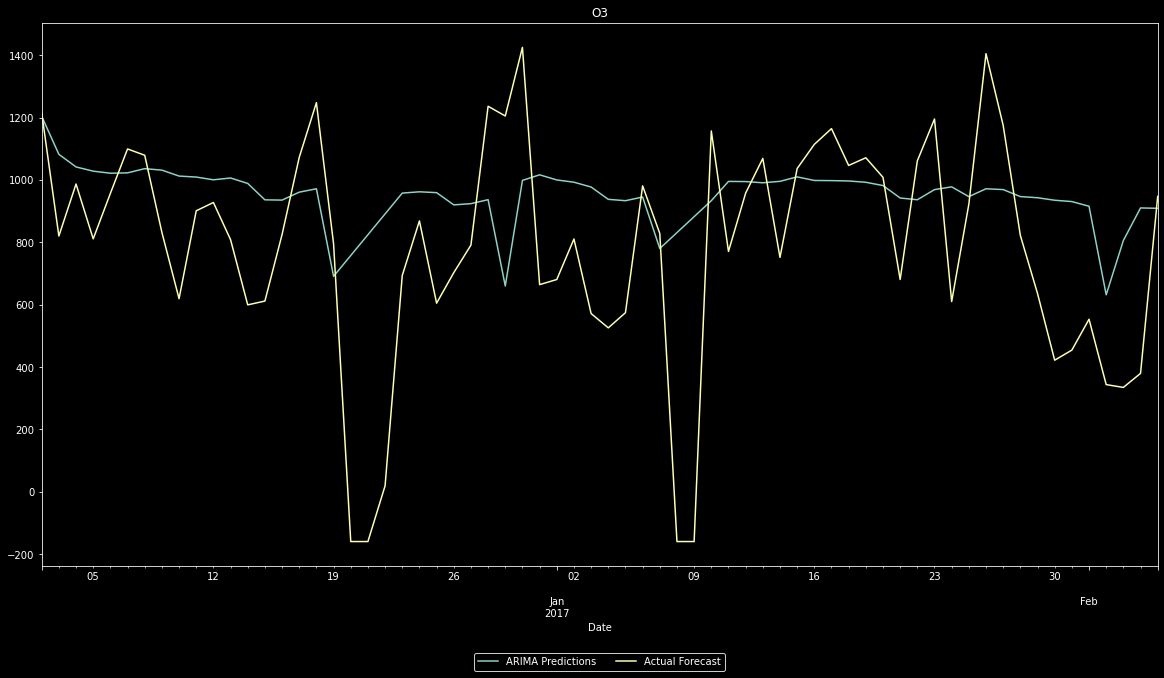

In [ ]:
for i in range(len(GAS_inter_pred)):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    GAS_inter_pred[i].plot(ax=ax)
    GAS_inter_test[i].plot(ax=ax)
    plt.title(GAS_List[i])
    plt.legend(
        ["ARIMA Predictions", "Actual Forecast"],
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        fancybox=True,
        shadow=True,
        ncol=3,
    )
    plt.show()



##### Interpolated vs Original

As we can see from the predicted values and graphs, the interpolated dataset did not perform as well as the original dataset. Furthermore, future readings may also fail which we might also need to predict so that we know when the sensors could potentially fail at and fix it in case of emergencies. Because of this, we will be using the no interpolated data(original data) for the rest of the time series predictions.


### SARIMAX

SARIMA will be used to compare with the baseline ARIMA in terms of performance. It should perform better due to SARIMA using more computation power to predict inclusive with seasons. Based on seasonality decomposition, we know that all variables have a seasonality of 7.


                                     SARIMAX Results                                      
Dep. Variable:                                 CO   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood               -1468.197
Date:                            Thu, 11 Aug 2022   AIC                           2950.394
Time:                                    10:40:03   BIC                           2975.346
Sample:                                03-15-2016   HQIC                          2960.424
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              1.2716      0.544      2.336      0.019       0.205       2.338
RH             2.9454      0.481   

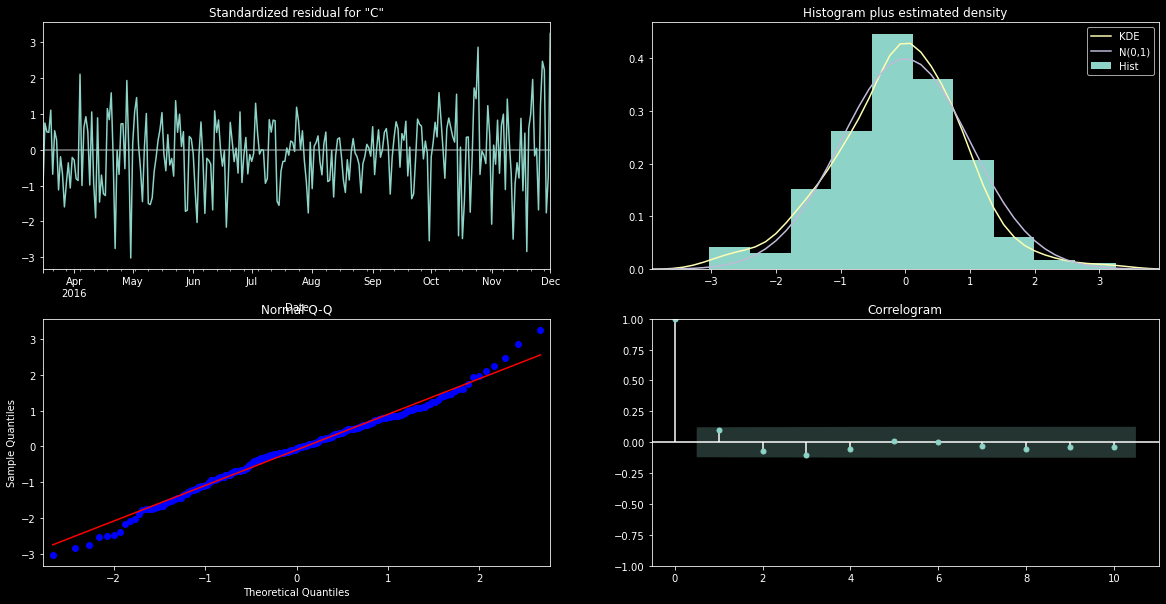

                                     SARIMAX Results                                      
Dep. Variable:                                 HC   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood               -1489.902
Date:                            Thu, 11 Aug 2022   AIC                           2993.804
Time:                                    10:40:04   BIC                           3018.756
Sample:                                03-15-2016   HQIC                          3003.834
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              3.5025      0.609      5.752      0.000       2.309       4.696
RH             0.4632      0.538   

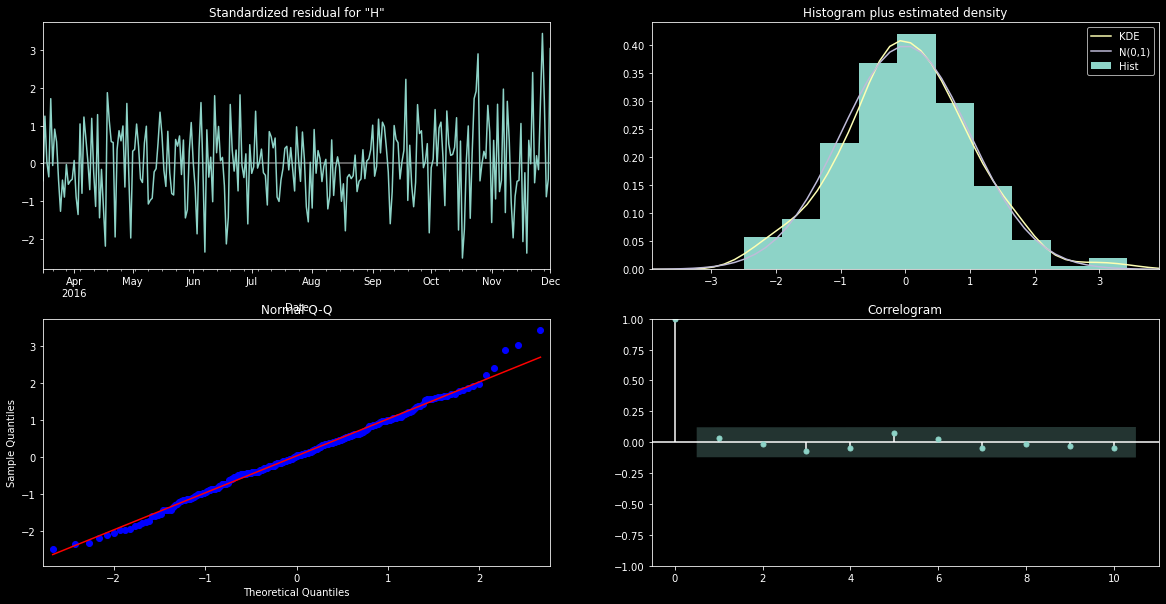

c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                NO2   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood               -1552.128
Date:                            Thu, 11 Aug 2022   AIC                           3118.256
Time:                                    10:40:06   BIC                           3143.207
Sample:                                03-15-2016   HQIC                          3128.285
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              3.9018      0.823      4.740      0.000       2.288       5.515
RH            -0.1408      0.722   

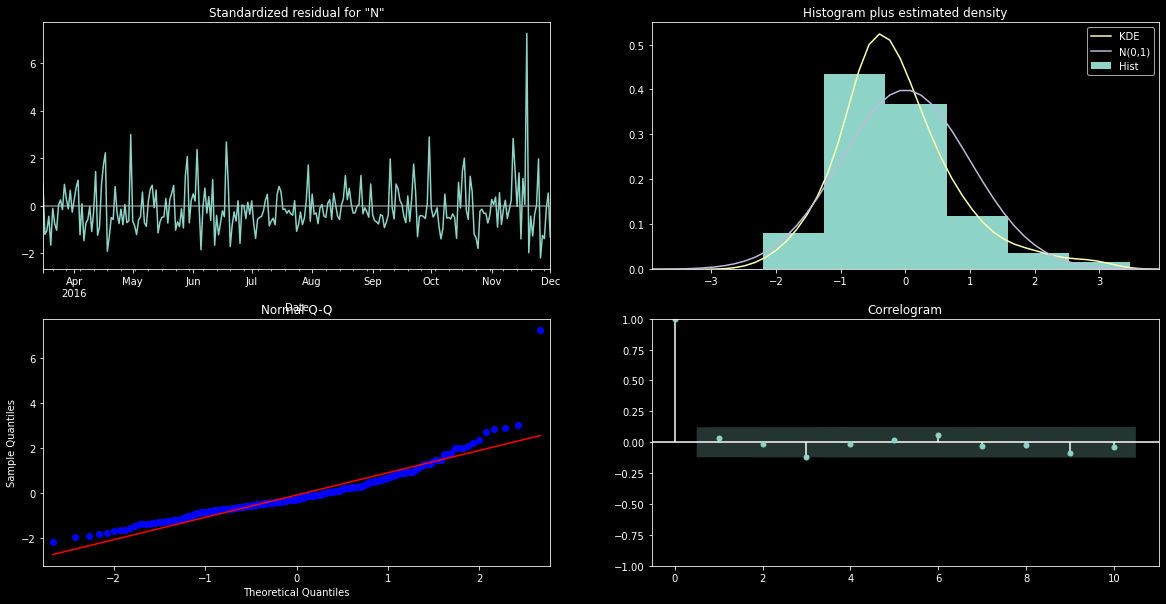

c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                 O3   No. Observations:                  262
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood               -1646.827
Date:                            Thu, 11 Aug 2022   AIC                           3307.653
Time:                                    10:40:07   BIC                           3332.605
Sample:                                03-15-2016   HQIC                          3317.683
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              2.3490      1.145      2.052      0.040       0.106       4.592
RH             1.4634      1.029   

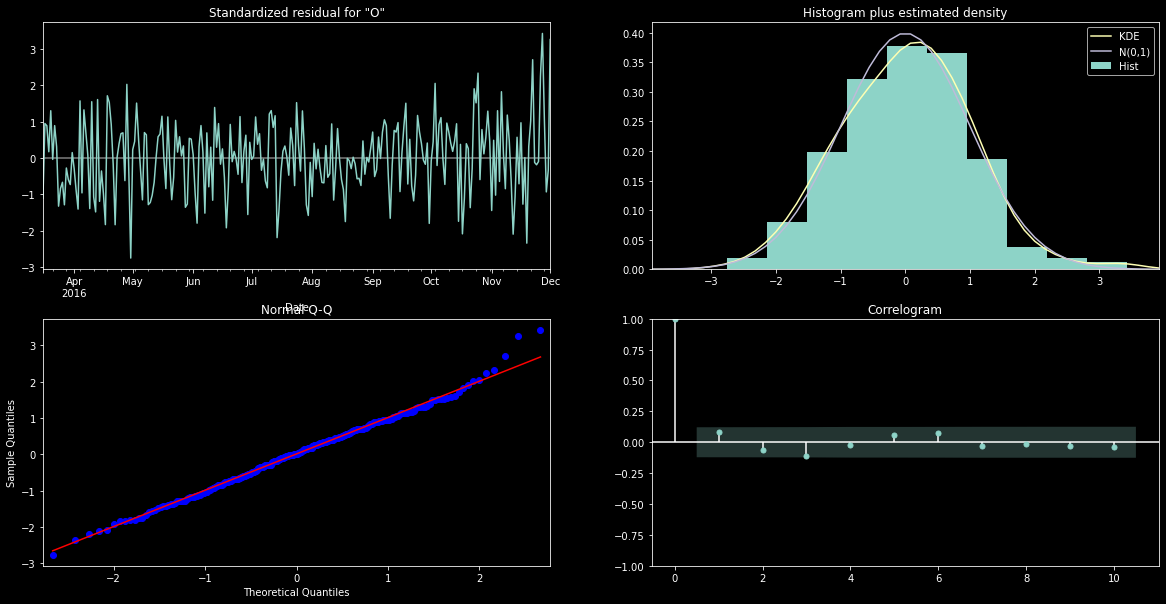

In [ ]:
model_Arr = []
for i in range(len(GAS_train)):
    model_Arr.append(
        SARIMAX(
            endog=GAS_train[i],
            exog=x_train,
            order=(1, 1, 1),
            seasonal_order=(2, 0, 0, 7),
        ).fit()
    )
    print(model_Arr[i].summary())
    model_Arr[i].plot_diagnostics()
    plt.show()



<u><b>Observations</b></u>

- CO
  - All coefficients are statistically significant
  - The errors caused are not white noise
  - The residuals show no variances
  - Data is not normally distributed against an alternative of another distribution
- HC
  - RH is not statistically significant as its p-value is 0.389 which is > 0.05
  - The errors caused are not white noise
  - The residuals show variances
  - Data is not normally distributed against an alternative of another distribution
- NO2
  - RH is not statistically significant as its p-value is 0.845 which is > 0.05
  - The errors caused are not white noise
  - The residuals show variances
  - Data is normally distributed against an alternative of another distribution
- O3
  - RH is not statistically significant as its p-value is 0.155 which is > 0.05
  - The errors caused are not white noise
  - The residuals show no variances
  - Data is not normally distributed against an alternative of another distribution

In conclusion, each model will need to be tuned further using their respective orders collected through the autocorrelation and partial autocorrelation plots. Compared to the ARIMA model, SARIMA performed better than it as the residual plot is more close to 0 with slightly less variation. In the correlogram plot, there is no lag that is outside of the 5% range which is good.


c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


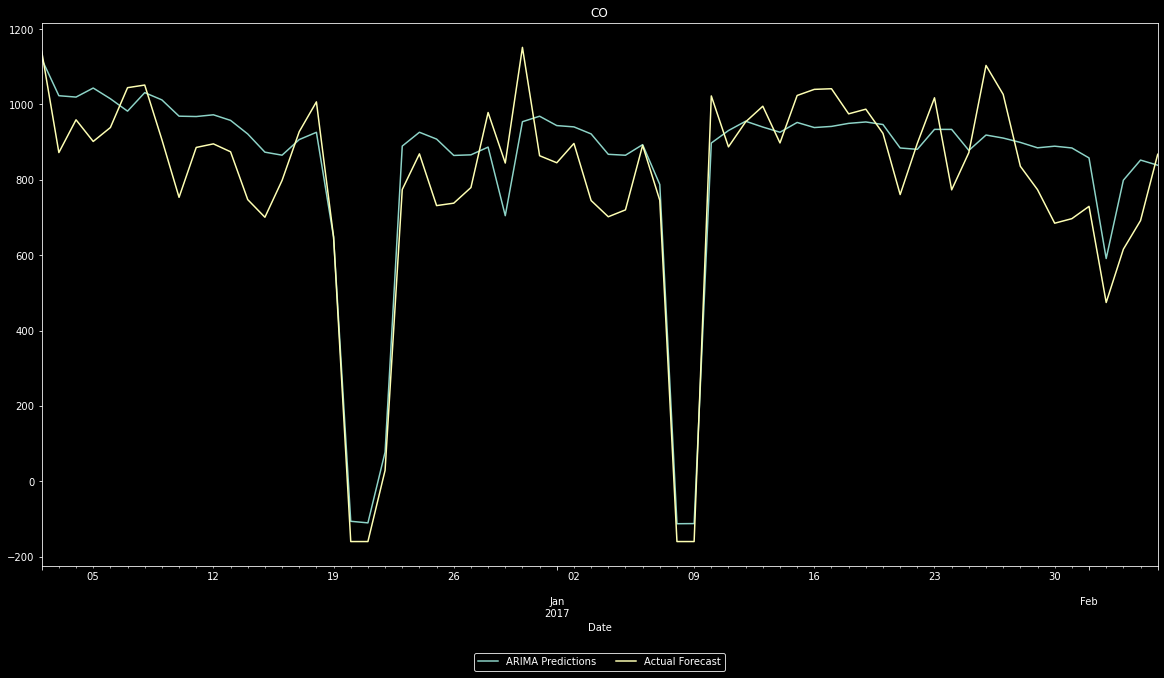

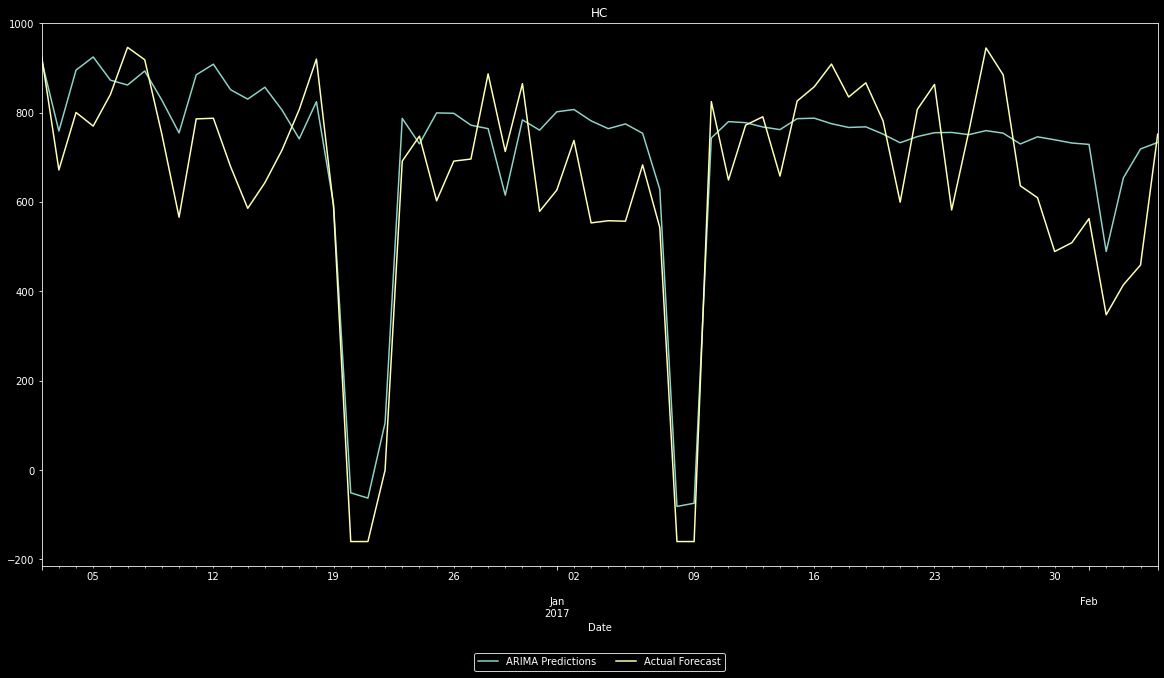

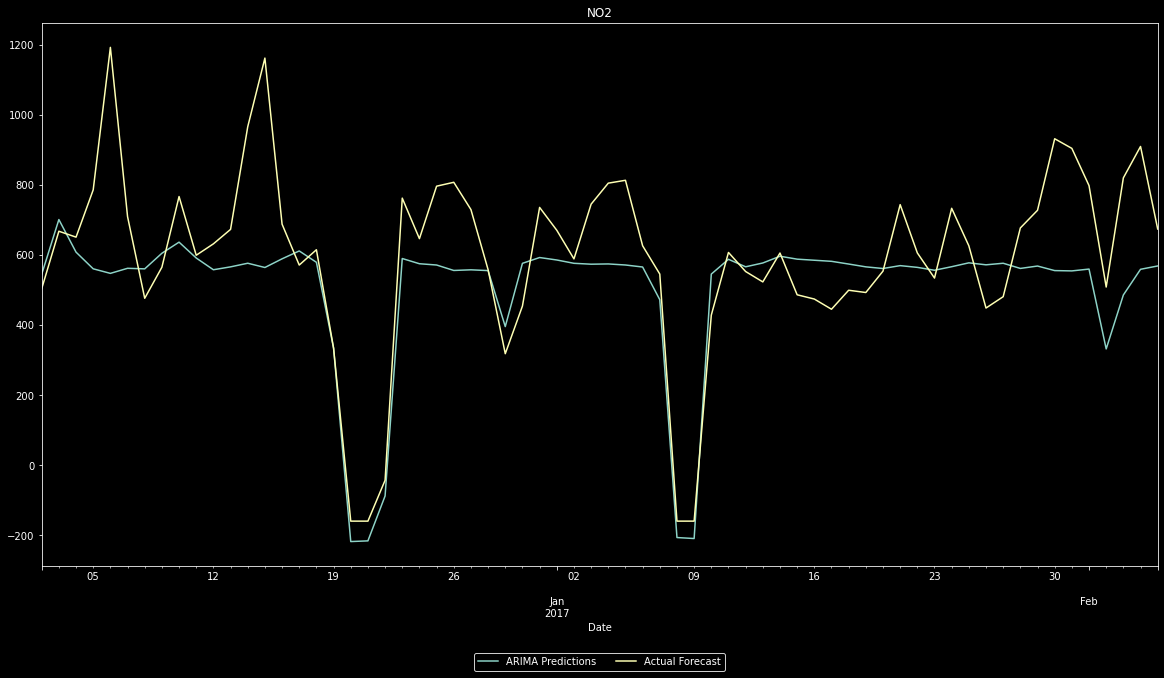

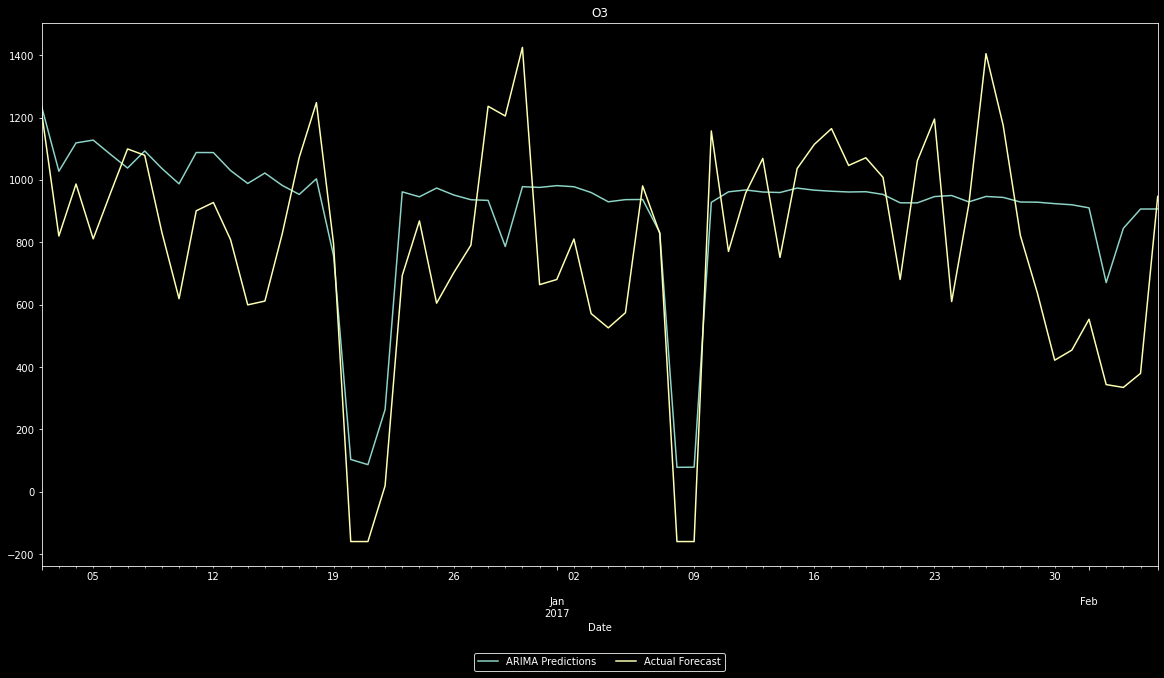

In [ ]:
CO_model = SARIMAX(
    endog=CO_train, exog=x_train, order=(1, 1, 2), seasonal_order=(2, 0, 0, 7)
).fit()
HC_model = SARIMAX(
    endog=HC_train, exog=x_train, order=(1, 1, 2), seasonal_order=(2, 0, 0, 7)
).fit()
NO2_model = SARIMAX(
    endog=NO2_train, exog=x_train, order=(1, 1, 2), seasonal_order=(2, 0, 0, 7)
).fit()
O3_model = SARIMAX(
    endog=O3_train, exog=x_train, order=(1, 1, 2), seasonal_order=(2, 0, 0, 7)
).fit()
CO_pred = CO_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)
HC_pred = HC_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)
NO2_pred = NO2_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)
O3_pred = O3_model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)

GAS_pred = [CO_pred, HC_pred, NO2_pred, O3_pred]


for i in range(len(GAS_pred)):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    GAS_pred[i].plot(ax=ax)
    GAS_test[i].plot(ax=ax)
    plt.title(GAS_List[i])
    plt.legend(
        ["ARIMA Predictions", "Actual Forecast"],
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        fancybox=True,
        shadow=True,
        ncol=3,
    )
    plt.show()



##### Comparing SARIMA with ARIMA(Baseline)

When comparing Time Series models, we look at the AIC and BIC. The lower the AIC and BIC, the better the models performance. AIC as mentioned helps determine the strength of the linear regression model and would emphasis more on model performance (select more complex models) and BIC as mentioned helps to select the true model of the dataset which follows more strictly to the original training dataset this causes the it to select a more simple model which focuses more on getting the data to work. This means AIC and BIC needs to be balanced.

Based on the SARIMA and ARIMA summary, the SARIMA models have a decrease in AIC and BIC score by around 50 - 300 points. This means that with the inclusion of the seasonality, the model performs better.

Furthermore, based on the side by side comparision of the model prediction on the validation set it seems SARIMA follows the trend of the actual forecast more closely compared to ARIMA.


##### Diagnosing Baseline SARIMA Model

As Time Series is similar to a regression problem, we will be using the following scoring metrics to help us in the time series

1. Mean Absolute Percentage Error
   - A measure of prediction accuracy of a forecasting method in statistics
2. Root Mean Squared Error
   - RMSE is the square root of the mean of the square of all of the error. We use RMSE more often as MSE values can be too big to compare easily. MSE shows how close the data points are closely fitted to a line.


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


In [ ]:
CO_train_pred = CO_model.predict(
    start=x_train.index[0], end=x_train.index[-1], exog=x_train
)
HC_train_pred = HC_model.predict(
    start=x_train.index[0], end=x_train.index[-1], exog=x_train
)
NO2_train_pred = NO2_model.predict(
    start=x_train.index[0], end=x_train.index[-1], exog=x_train
)
O3_train_pred = O3_model.predict(
    start=x_train.index[0], end=x_train.index[-1], exog=x_train
)

GAS_train_pred = [CO_train_pred, HC_train_pred, NO2_train_pred, O3_train_pred]

for i in range(len(GAS_List)):
    print(
        f"{GAS_List[i]} Train MAPE:\t\t{mean_absolute_percentage_error(y_train[GAS_List[i]],GAS_train_pred[i]) * 100:.3f}%"
    )
    print(
        f"{GAS_List[i]} Train RMSE:\t\t{mean_squared_error(y_train[GAS_List[i]],GAS_train_pred[i],squared=False):.3f}"
    )
    print(
        f"{GAS_List[i]} Validation MAPE:\t{mean_absolute_percentage_error(y_test[GAS_List[i]],GAS_pred[i]) * 100:.3f}%"
    )
    print(
        f"{GAS_List[i]} Validation RMSE:\t{mean_squared_error(y_test[GAS_List[i]],GAS_pred[i],squared=False):.3f}"
    )
    print()


CO Train MAPE:		6.928%
CO Train RMSE:		85.607
CO Validation MAPE:	15.369%
CO Validation RMSE:	109.315

HC Train MAPE:		9.431%
HC Train RMSE:		83.326
HC Validation MAPE:	981.828%
HC Validation RMSE:	131.328

NO2 Train MAPE:		11.050%
NO2 Train RMSE:		107.408
NO2 Validation MAPE:	21.158%
NO2 Validation RMSE:	184.255

O3 Train MAPE:		38.968%
O3 Train RMSE:		140.103
O3 Validation MAPE:	60.418%
O3 Validation RMSE:	267.255



<u><b>Observations</b></u>

- CO has the lowest difference and the forecasting ability is quite good as the RMSE of the validation and RMSE of the training set is relatively close.
- HC has a good training forecast but once it has reached the validation set, it did not perform as well as intended. Parameters can be adjusted and orders can be used to improve on the models performance.
- NO2 has a good training and validation RMSE and is relatively close which means that the order is quite good for prediction of NO2 gas. Graphically, the data points do not spike up when need.
- O3 has a good training forecast but not a strong validation forecast. The dips and spikes are not very clear which needs to be adjusted.


#### Cross Validation - Expanding Window

<img src="http://eng.uber.com/wp-content/uploads/2018/01/image3-4.png">
To validate and make sure the model is evaluated general potential. One way to achieve this is to train the data using the passage of time in different windows.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import warnings
from itertools import combinations_with_replacement
from itertools import product


In [ ]:
def model_cv(
    model, endog, exog, order=(1, 1, 1), splits=3, seasonal_order=None, max_iter=1000
):
    valid_rmse = []
    valid_mape = []
    train_rmse = []
    train_mape = []
    model_aic = []
    model_bic = []
    time_series = TimeSeriesSplit(n_splits=splits)
    for train_index, test_index in time_series.split(exog):
        X_train, X_test = exog.iloc[train_index], exog.iloc[test_index]
        y_train, y_test = endog.iloc[train_index], endog.iloc[test_index]
        if seasonal_order is None:
            model_fit = model(endog=y_train, exog=X_train, order=order).fit(
                maxiter=max_iter, disp=False
            )
        else:
            model_fit = model(
                endog=y_train, exog=X_train, seasonal_order=seasonal_order
            ).fit(maxiter=max_iter, disp=False)
        y_pred = model_fit.predict(
            start=X_test.index[0], end=X_test.index[-1], exog=X_test
        )
        valid_rmse.append(mean_squared_error(y_test, y_pred, squared=False))
        valid_mape.append(mean_absolute_percentage_error(y_test, y_pred))
        train_pred = model_fit.predict(
            start=X_train.index[0], end=X_train.index[-1], exog=X_train
        )
        train_rmse.append(mean_squared_error(y_train, train_pred, squared=False))
        train_mape.append(mean_absolute_percentage_error(y_train, train_pred))
        model_aic.append(model_fit.aic)
        model_bic.append(model_fit.bic)
    return (
        pd.Series(
            {
                "train_rmse": np.mean(train_rmse),
                "train_rmse_std": np.std(train_rmse),
                "valid_rmse": np.mean(valid_rmse),
                "valid_rmse_std": np.std(valid_rmse),
                "train_mape": np.mean(train_mape),
                "valid_mape": np.mean(valid_mape),
                "AIC": np.mean(model_aic),
                "BIC": np.mean(model_bic),
            },
            name=order,
        ),
        pd.DataFrame(
            {
                "train_rmse": train_rmse,
                "train_rmse_std": train_rmse,
                "valid_rmse": valid_rmse,
                "valid_rmse_std": valid_rmse,
                "train_mape": train_mape,
                "valid_mape": valid_mape,
                "AIC": model_aic,
                "BIC": model_bic,
            }
        ),
    )


In [ ]:
avg_scores = []
cv_table = []
for i in GAS_List:
    score, cv = model_cv(
        SARIMAX, exog=x, endog=y[i], splits=5, seasonal_order=(1, 1, 2, 7)
    )
    avg_scores.append(score)
    cv_table.append(cv)



c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Soh H

In [ ]:
for i in range(len(cv_table)):
    print(GAS_List[i])
    display(
        cv_table[i]
        .style.apply(
            lambda x: [
                "background-color: green; color: white" if v else ""
                for v in x == x.min()
            ]
        )
        .apply(
            lambda x: [
                "background-color: red; color: white" if v else "" for v in x == x.max()
            ]
        )
    )



CO


HC


NO2


O3


# Hyperparameter Tuning

To enhance the model, we will need to find the best order. Although we can find the value of p and q using the autocorrelation and partial autocorrelation plots. We can use loops to look through the best values. We are making us of a function that works quite similar to the GridSearchCV from sklearn.


In [ ]:
import warnings

warnings.filterwarnings("ignore")
scores_df = pd.DataFrame()
p = np.arange(0, 5)
q = np.arange(0, 5)
for i in list(product(p, q)):
    gas_df = pd.DataFrame()
    i = (i[0], 1, i[1], 7)
    print("Computing (p, 1, q, 7):", i)
    try:
        for j in range(len(GAS_List)):
            scores_df[i, GAS_List[j]], _ = model_cv(
                SARIMAX, seasonal_order=i, splits=5, exog=x, endog=y[GAS_List[j]]
            )
    except Exception as e:
        print("Error computing (p, 1, q, 7):", i)
        print(e)
        pass


Computing (p, 1, q, 7): (0, 1, 0, 7)
Computing (p, 1, q, 7): (0, 1, 1, 7)
Computing (p, 1, q, 7): (0, 1, 2, 7)
Computing (p, 1, q, 7): (0, 1, 3, 7)
Computing (p, 1, q, 7): (0, 1, 4, 7)
Computing (p, 1, q, 7): (1, 1, 0, 7)
Computing (p, 1, q, 7): (1, 1, 1, 7)
Computing (p, 1, q, 7): (1, 1, 2, 7)
Computing (p, 1, q, 7): (1, 1, 3, 7)
Computing (p, 1, q, 7): (1, 1, 4, 7)
Computing (p, 1, q, 7): (2, 1, 0, 7)
Computing (p, 1, q, 7): (2, 1, 1, 7)
Computing (p, 1, q, 7): (2, 1, 2, 7)
Computing (p, 1, q, 7): (2, 1, 3, 7)
Computing (p, 1, q, 7): (2, 1, 4, 7)
Computing (p, 1, q, 7): (3, 1, 0, 7)
Computing (p, 1, q, 7): (3, 1, 1, 7)
Computing (p, 1, q, 7): (3, 1, 2, 7)
Computing (p, 1, q, 7): (3, 1, 3, 7)
Computing (p, 1, q, 7): (3, 1, 4, 7)
Computing (p, 1, q, 7): (4, 1, 0, 7)
Computing (p, 1, q, 7): (4, 1, 1, 7)
Computing (p, 1, q, 7): (4, 1, 2, 7)
Computing (p, 1, q, 7): (4, 1, 3, 7)
Computing (p, 1, q, 7): (4, 1, 4, 7)


In [ ]:
cv_df = scores_df.T.reset_index()
CO_cv = []
HC_cv = []
NO2_cv = []
O3_cv = []
for i in range(len(cv_df)):
  gas = str(cv_df.loc[:,"index"][i]).split("\'")[1]
  if gas == "CO":
    CO_cv.append(cv_df.iloc[i])
  elif gas == 'HC':
    HC_cv.append(cv_df.iloc[i])
  elif gas == 'NO2':
    NO2_cv.append(cv_df.iloc[i])
  elif gas == 'O3':
    O3_cv.append(cv_df.iloc[i])

CO_cv = pd.DataFrame(CO_cv).set_index('index')
HC_cv = pd.DataFrame(HC_cv).set_index('index')
NO2_cv = pd.DataFrame(NO2_cv).set_index('index')
O3_cv = pd.DataFrame(O3_cv).set_index('index')

In [ ]:
CO_cv.style.apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.min()
    ]
).apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.max()]
)


In [ ]:
HC_cv.style.apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.min()
    ]
).apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.max()]
)


In [ ]:
NO2_cv.style.apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.min()
    ]
).apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.max()]
)


In [ ]:
O3_cv.style.apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.min()
    ]
).apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.max()]
)


<u><b>Observations</b></u>

Overall, we can use the following order to go our predictions

- CO
  - (3, 1, 3, 7)
  - It has the lowest MPE and the valid RMSE is close to the lowest valid RMSE
- HC
  - (0, 1, 1, 7)
  - The model has the best AIC and BIC which means the models is not complex but performs well
  - The valid RMSE is also very close to the lowest valid RMSE
- NO2
  - (3, 1, 0, 7)
  -  The model has the lowest valid MAPE and the valid RMSE is close to the lowest valid RMSE
- O3
  - (4, 1, 1, 7)
  - The model has the lowest valid RMSE and the AIC and BIC is close to the lowest AIC and BIC

In [ ]:
# CO_model = SARIMAX(endog=y["CO"], exog=x, seasonal_order=(3, 1, 3, 7)).fit()
# HC_model = SARIMAX(endog=y["HC"], exog=x, seasonal_order=(0, 1, 1, 7)).fit()
# NO2_model = SARIMAX(endog=y["NO2"], exog=x, seasonal_order=(3, 1, 0, 7)).fit()
# O3_model = SARIMAX(endog=y["O3"], exog=x, seasonal_order=(4, 1, 1, 7)).fit()
# CO_pred = CO_model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
# HC_pred = HC_model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
# NO2_pred = NO2_model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
# O3_pred = O3_model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)

# GAS_pred = [CO_pred, HC_pred, NO2_pred, O3_pred]


In [ ]:
# pd.DataFrame(np.array(GAS_pred).flatten()).reset_index().rename({'index':"id",0: "Value"}, axis=1).to_csv(
#     "./kaggle/sarima2.csv",index=False
# )
# print("Exporting to csv")


Exporting to csv


### VARMAX

As mentioned previously, VARMAX is able to handle multiple data and time series together. Furthermore, we have shown in the Causality and Cointegration Test at least 2 time series influence each other. Therefore we will use a multivariate regressor like VARMAX


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(endog=y_train, exog=x_train, order=(1, 1)).fit(maxiter=1000, disp=False)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Statespace Model Results                              
=====================================================================================
Dep. Variable:     ['CO', 'HC', 'NO2', 'O3']   No. Observations:                  262
Model:                           VARMAX(1,1)   Log Likelihood               -5721.890
                                 + intercept   AIC                          11551.779
Date:                       Thu, 11 Aug 2022   BIC                          11744.470
Time:                               14:29:32   HQIC                         11629.226
Sample:                           03-15-2016                                         
                                - 12-01-2016                                         
Covariance Type:                         opg                                         
=================================================================================================
Ljung-Box (L1) (Q):     5.22, 11.87, 10.35, 21.32   Jarque-Bera (JB):   1.80, 0.43, 363.43, 66.88
Prob(Q):                   0.02, 0.00, 0.00, 0.00   Prob(JB):              0.41, 0.81, 0.00, 0.00
Heteroskedasticity (H):    1.44, 0.96, 1.45, 2.04   Skew:                 -0.05, 0.09, 0.85, 0.73
Prob(H) (two-sided):       0.09, 0.83, 0.09, 0.00   Kurtosis:              3.39, 3.09, 8.51, 4.99
                           Results for equation CO                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    115.1368    528.098      0.218      0.827    -919.915    1150.189
L1.CO         -5.4921      5.617     -0.978      0.328     -16.501       5.517
L1.HC         -0.5681      0.629     -0.903      0.367      -1.802       0.665
L1.NO2         3.0909      2.949      1.048      0.295      -2.690       8.872
L1.O3          4.6699      4.042      1.155      0.248      -3.252      12.591
L1.e(CO)       5.7633      5.610      1.027      0.304      -5.231      16.758
L1.e(HC)       0.3010      0.601      0.501      0.616      -0.876       1.478
L1.e(NO2)     -2.8151      2.973     -0.947      0.344      -8.642       3.011
L1.e(O3)      -4.1302      4.056     -1.018      0.309     -12.079       3.819
beta.T         1.6007      0.583      2.747      0.006       0.458       2.743
beta.RH        2.8840      0.475      6.075      0.000       1.954       3.815
                           Results for equation HC                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    303.4175    343.502      0.883      0.377    -369.834     976.669
L1.CO         -3.2589      3.690     -0.883      0.377     -10.491       3.973
L1.HC          0.0374      0.426      0.088      0.930      -0.797       0.872
L1.NO2         1.6220      1.930      0.841      0.401      -2.160       5.404
L1.O3          2.5675      2.629      0.977      0.329      -2.585       7.720
L1.e(CO)       2.8220      3.702      0.762      0.446      -4.433      10.077
L1.e(HC)       0.1063      0.421      0.253      0.801      -0.719       0.931
L1.e(NO2)     -1.5010      1.972     -0.761      0.447      -5.367       2.365
L1.e(O3)      -1.9887      2.666     -0.746      0.456      -7.215       3.237
beta.T         2.0944      0.696      3.010      0.003       0.731       3.458
beta.RH        1.9269      0.572      3.370      0.001       0.806       3.048
                           Results for equation NO2                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.

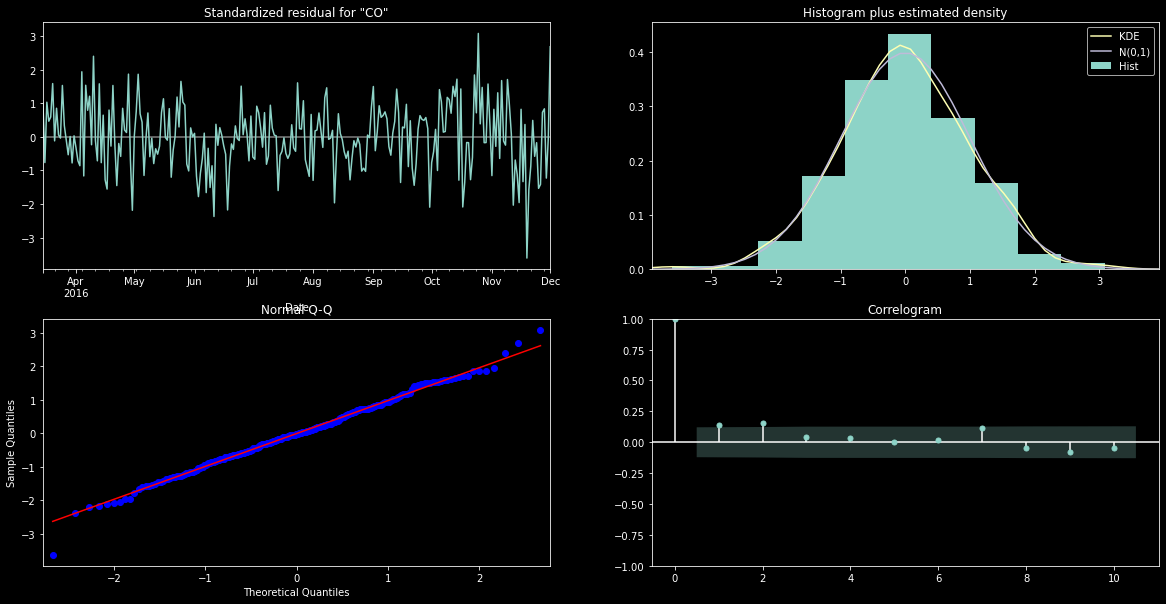

In [ ]:
model.plot_diagnostics()
plt.show()


<u><b>Observations</b></u>

Residual plot is not very varied, the Histogram of residual states that the residuals are quite normally distributed. In the correlogram plot, Lag 1 and 2 appears to be outside the range of 5% which means that the model might require some tuning

In [ ]:
train_pred = model.predict(start=x_train.index[0], end=x_train.index[-1], exog=x_train)
valid_pred = model.predict(start=x_test.index[0], end=x_test.index[-1], exog=x_test)

print(
    "Train MAPE:\t\t{:.3f}%".format(
        mean_absolute_percentage_error(y_train, train_pred) * 100
    )
)
print(
    "Train RMSE:\t\t{:.3f}".format(
        mean_squared_error(y_train, train_pred, squared=False)
    )
)
print(
    "Validation MAPE:\t{:.3f}%".format(
        mean_absolute_percentage_error(y_test, valid_pred) * 100
    )
)
print(
    "Validation RMSE:\t{:.3f}".format(
        mean_squared_error(y_test, valid_pred, squared=False)
    )
)



Train MAPE:		12.823%
Train RMSE:		98.433
Validation MAPE:	126.684%
Validation RMSE:	162.732


<u><b>Observations</b></u>

1. The model performed very well at the training data and might have a bit of a hiccup in the validation data due to MAPE being more than 100%
2. Both RMSE are relatively close to 0 which means VARMAX model is strong

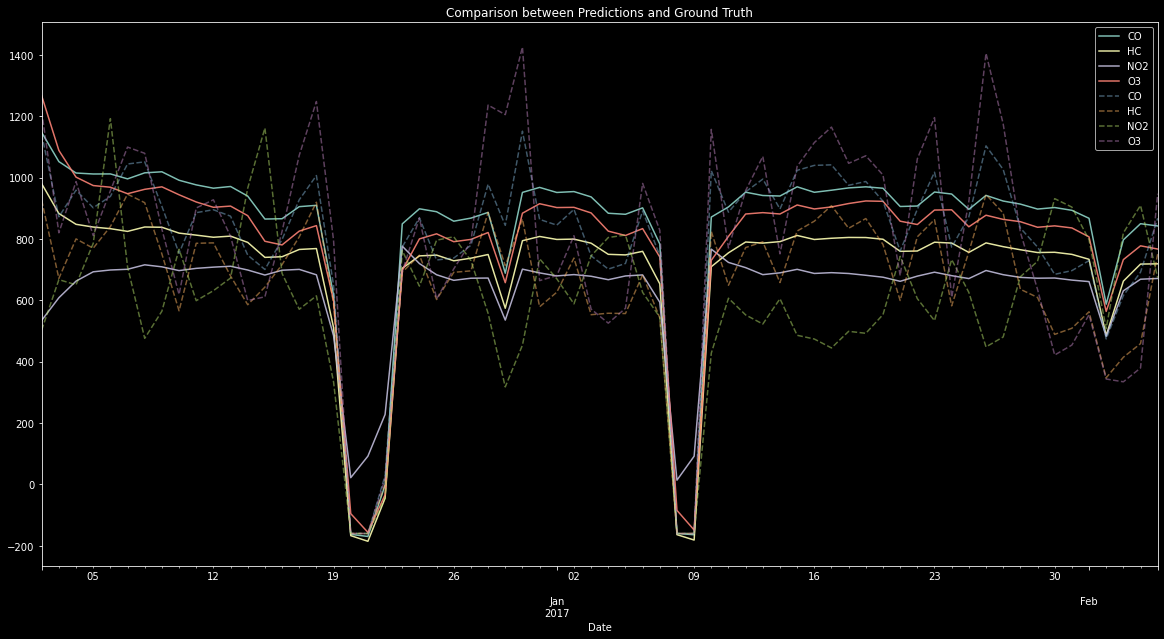

In [ ]:
fig, ax = plt.subplots()
valid_pred.plot(ax=ax, alpha=0.9)
y_test.plot(alpha=0.5, ax=ax, linestyle="--")
ax.set_title("Comparison between Predictions and Ground Truth")
plt.show()


<u></b>Observations</b></u>
The predict values do not have the splits and dips that the time series have which can means that the order selected was not the best. More needs to be done to make the model better

In [ ]:
avg, _ = model_cv(VARMAX, exog=x, endog=y, splits=5, order=(1, 1))
avg


train_rmse         115.899651
train_rmse_std      22.994974
valid_rmse         176.237147
valid_rmse_std      34.414391
train_mape           0.237945
valid_mape           0.864523
AIC               7400.438812
BIC               7561.333814
Name: (1, 1), dtype: float64

In [ ]:
scores_df = pd.DataFrame()
p = np.arange(0, 3)
q = np.arange(0, 10)
for i in list(product(p, q)):
    print("Computing (p, q):", i)
    try:
        scores_df[i],_ = model_cv(VARMAX,order=i, splits=5, exog=x, endog=y)
    except Exception as e:
        print("Error computing (p, q):", i)
        print(e)
        pass


Computing (p, q): (0, 0)
Error computing (p, q): (0, 0)
Invalid VARMAX(p,q) specification; at least one p,q must be greater than zero.
Computing (p, q): (0, 1)


KeyboardInterrupt: 

In [ ]:
scores_df.T.style.apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.min()
    ]
).apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.max()]
)


<u><b>Observations</b></u>


# Kaggle Test Set Predictions
After we are satisfied with the model performance on the train and validation set, it is about time for us to generate the final prediction for the test set and submit it on the Kaggle competition page.

In [ ]:
df_test = pd.read_csv("./test.csv").drop("id", axis=1)
df_test["Date"] = pd.to_datetime(df_test["Date"], format="%d/%m/%Y")
df_test


Date          T         RH Gas  Unnamed: 5  Unnamed: 6
0   2017-02-06   6.616667  51.734375  CO         NaN         NaN
1   2017-02-07   7.613194  43.930903  CO         NaN         NaN
2   2017-02-08   7.252083  50.966667  CO         NaN         NaN
3   2017-02-09   7.473611  50.166319  CO         NaN         NaN
4   2017-02-10   5.571875  46.604167  CO         NaN         NaN
..         ...        ...        ...  ..         ...         ...
247 2017-04-05  17.554167  50.092708  O3         NaN         NaN
248 2017-04-06  15.919792  35.959722  O3         NaN         NaN
249 2017-04-07  15.489583  32.213542  O3         NaN         NaN
250 2017-04-08  18.381250  33.686458  O3         NaN         NaN
251 2017-04-09  16.966667  42.791667  O3         NaN         NaN

[252 rows x 6 columns]

In [ ]:
# prepare exogenous testing set
X_test = df_test.set_index("Date")[["T", "RH"]].resample("d").mean().to_period("D")
X_test


T         RH
Date                            
2017-02-06   6.616667  51.734375
2017-02-07   7.613194  43.930903
2017-02-08   7.252083  50.966667
2017-02-09   7.473611  50.166319
2017-02-10   5.571875  46.604167
...               ...        ...
2017-04-05  17.554167  50.092708
2017-04-06  15.919792  35.959722
2017-04-07  15.489583  32.213542
2017-04-08  18.381250  33.686458
2017-04-09  16.966667  42.791667

[63 rows x 2 columns]

In [ ]:
import pickle
from pathlib import Path


In [ ]:
model = VARMAX(endog=y, exog=x, order=(0, 3), trend="c").fit(maxiter=1000, disp=False)

# making a directory if it does not exist
Path("./models").mkdir(parents=True, exist_ok=True)

# saving model to pickle
with open("./models/varmax03.pkl", "wb") as f:
    pickle.dump(model, f)
    print("model saved")

model.summary()


c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model saved


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Statespace Model Results                              
=====================================================================================
Dep. Variable:     ['CO', 'HC', 'NO2', 'O3']   No. Observations:                  328
Model:                               VMAX(3)   Log Likelihood               -7174.400
                                 + intercept   AIC                          14488.801
Date:                       Mon, 08 Aug 2022   BIC                          14754.312
Time:                               23:26:32   HQIC                         14594.732
Sample:                           03-15-2016                                         
                                - 02-05-2017                                         
Covariance Type:                         opg                                         
==============================================================================================
Ljung-Box (L1) (Q):     0.40, 8.83, 4.75, 7.16   Jarque-Bera (JB):   3.11, 4.06, 951.84, 30.26
Prob(Q):                0.53, 0.00, 0.03, 0.01   Prob(JB):              0.21, 0.13, 0.00, 0.00
Heteroskedasticity (H): 1.78, 0.83, 1.71, 2.25   Skew:                -0.14, -0.14, 1.42, 0.49
Prob(H) (two-sided):    0.00, 0.32, 0.01, 0.00   Kurtosis:             3.39, 3.47, 10.85, 4.12
                           Results for equation CO                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    685.9230     17.060     40.206      0.000     652.486     719.360
L1.e(CO)       0.5740      0.192      2.995      0.003       0.198       0.950
L1.e(HC)      -0.2062      0.164     -1.255      0.209      -0.528       0.116
L1.e(NO2)      0.2634      0.098      2.680      0.007       0.071       0.456
L1.e(O3)       0.3398      0.107      3.166      0.002       0.129       0.550
L2.e(CO)       0.4061      0.184      2.206      0.027       0.045       0.767
L2.e(HC)      -0.0092      0.166     -0.055      0.956      -0.335       0.317
L2.e(NO2)      0.2803      0.109      2.583      0.010       0.068       0.493
L2.e(O3)       0.0677      0.111      0.607      0.544      -0.151       0.286
L3.e(CO)       0.3958      0.170      2.333      0.020       0.063       0.728
L3.e(HC)       0.0083      0.150      0.055      0.956      -0.286       0.302
L3.e(NO2)      0.1766      0.076      2.324      0.020       0.028       0.326
L3.e(O3)      -0.1053      0.095     -1.111      0.267      -0.291       0.081
beta.T         0.4349      0.526      0.826      0.409      -0.597       1.467
beta.RH        3.8098      0.432      8.818      0.000       2.963       4.657
                           Results for equation HC                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    629.5984     18.223     34.550      0.000     593.882     665.315
L1.e(CO)      -0.1991      0.235     -0.849      0.396      -0.659       0.261
L1.e(HC)       0.4425      0.188      2.353      0.019       0.074       0.811
L1.e(NO2)      0.2028      0.128      1.583      0.113      -0.048       0.454
L1.e(O3)       0.3101      0.135      2.295      0.022       0.045       0.575
L2.e(CO)       0.1563      0.227      0.689      0.491      -0.288       0.601
L2.e(HC)       0.2788      0.201      1.390      0.165      -0.114       0.672
L2.e(NO2)      0.1922      0.128      1.501      0.133      -0.059       0.443
L2.e(O3)      -0.0812      0.132     -0.614      0.539      -0.341       0.178
L3.e(CO)       0.2086      0.221      0.943      0.346      -0.225       0.642
L3.e(HC)  

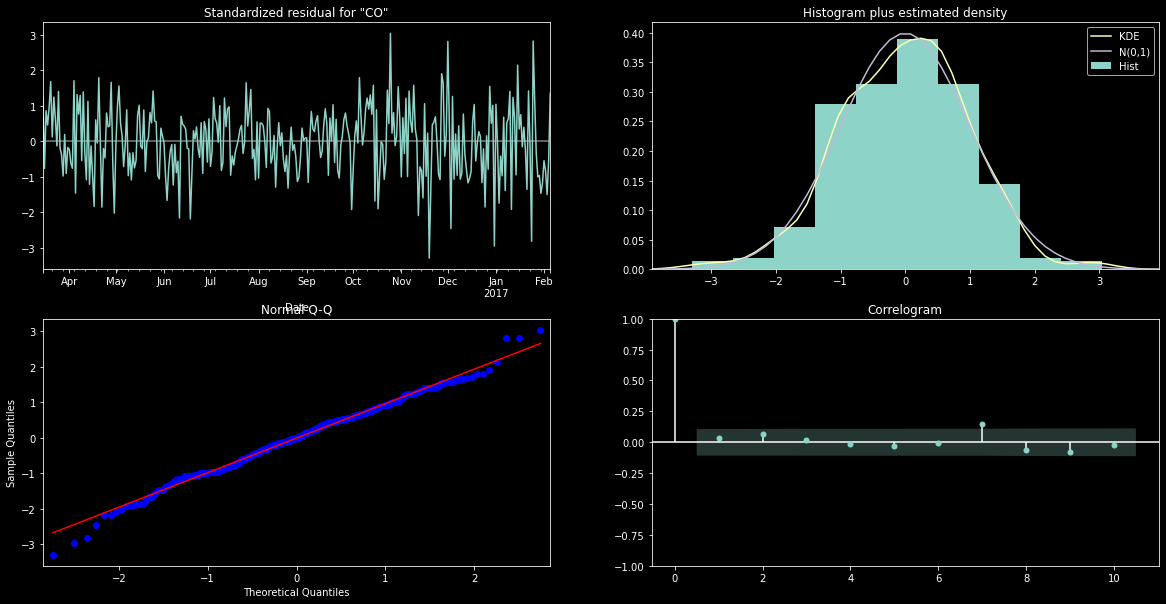

In [ ]:
model.plot_diagnostics()
plt.show()


variable        Value
id                       
0         CO  1030.112047
1         CO   907.325331
2         CO   869.148039
3         CO   880.295986
4         CO   865.897876
..       ...          ...
247       O3   832.519148
248       O3   763.613928
249       O3   745.346074
250       O3   749.460653
251       O3   796.633604

[252 rows x 2 columns]

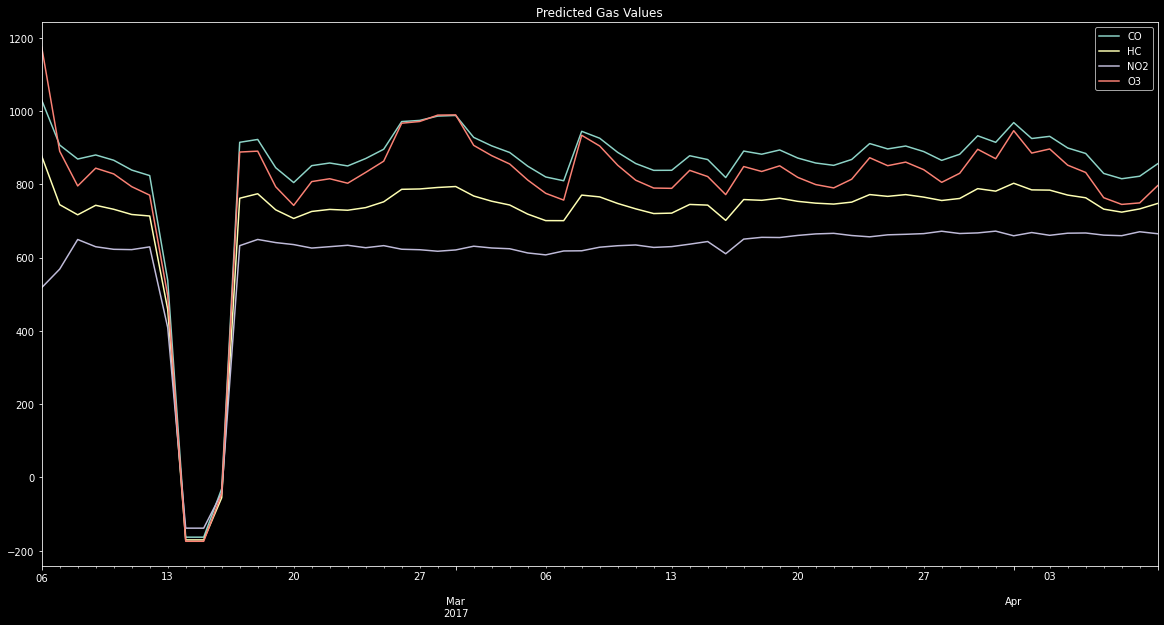

In [ ]:
# generate predictions
predictions = model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
predictions.plot()
plt.title("Predicted Gas Values")
predictions = pd.melt(
    predictions, value_vars=["CO", "HC", "NO2", "O3"], value_name="Value"
)
predictions.index.rename("id", inplace=True)
predictions


In [ ]:
# making a directory if it does not exist
Path("./kaggle").mkdir(parents=True, exist_ok=True)
predictions["Value"].to_csv("./kaggle/varmax03.csv")
print("Exported predictions to .csv")



Exported predictions to .csv


In [ ]:
model = VARMAX(endog=y, exog=x, order=(0, 8), trend="c").fit(maxiter=1000, disp=False)

# making a directory if it does not exist
Path("./models").mkdir(parents=True, exist_ok=True)

# saving model to pickle
with open("./models/varmax08.pkl", "wb") as f:
    pickle.dump(model, f)
    print("model saved")

model.summary()


c:\Users\Soh Hong Yu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model saved


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Statespace Model Results                              
=====================================================================================
Dep. Variable:     ['CO', 'HC', 'NO2', 'O3']   No. Observations:                  328
Model:                               VMAX(8)   Log Likelihood               -7091.633
                                 + intercept   AIC                          14483.266
Date:                       Wed, 10 Aug 2022   BIC                          15052.218
Time:                               00:30:41   HQIC                         14710.261
Sample:                           03-15-2016                                         
                                - 02-05-2017                                         
Covariance Type:                         opg                                         
================================================================================================
Ljung-Box (L1) (Q):     4.51, 11.74, 7.89, 12.78   Jarque-Bera (JB):   3.18, 0.01, 677.46, 46.73
Prob(Q):                  0.03, 0.00, 0.00, 0.00   Prob(JB):              0.20, 1.00, 0.00, 0.00
Heteroskedasticity (H):   1.71, 1.04, 1.82, 2.32   Skew:                 -0.09, 0.01, 1.40, 0.59
Prob(H) (two-sided):      0.01, 0.85, 0.00, 0.00   Kurtosis:              3.45, 3.00, 9.46, 4.43
                           Results for equation CO                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    685.8356     24.523     27.967      0.000     637.771     733.900
L1.e(CO)       0.1183      0.540      0.219      0.827      -0.941       1.177
L1.e(HC)      -0.1375      0.340     -0.404      0.686      -0.804       0.529
L1.e(NO2)      0.1514      0.236      0.641      0.521      -0.311       0.614
L1.e(O3)       0.4098      0.214      1.917      0.055      -0.009       0.829
L2.e(CO)       0.2265      0.643      0.352      0.725      -1.034       1.487
L2.e(HC)       0.1381      0.429      0.322      0.747      -0.702       0.978
L2.e(NO2)      0.1691      0.241      0.701      0.484      -0.304       0.642
L2.e(O3)       0.0094      0.283      0.033      0.974      -0.545       0.563
L3.e(CO)       0.5891      0.639      0.921      0.357      -0.664       1.842
L3.e(HC)       0.1262      0.433      0.291      0.771      -0.723       0.975
L3.e(NO2)      0.3714      0.212      1.750      0.080      -0.045       0.787
L3.e(O3)      -0.1358      0.338     -0.402      0.687      -0.798       0.526
L4.e(CO)       0.4675      0.501      0.934      0.350      -0.514       1.449
L4.e(HC)       0.0445      0.356      0.125      0.901      -0.654       0.743
L4.e(NO2)      0.2668      0.166      1.609      0.108      -0.058       0.592
L4.e(O3)      -0.1475      0.251     -0.588      0.557      -0.639       0.344
L5.e(CO)       0.2988      0.449      0.666      0.506      -0.581       1.179
L5.e(HC)      -0.1417      0.312     -0.454      0.650      -0.754       0.470
L5.e(NO2)      0.0798      0.167      0.477      0.633      -0.248       0.408
L5.e(O3)      -0.0910      0.192     -0.473      0.636      -0.468       0.286
L6.e(CO)       0.4309      0.506      0.852      0.394      -0.560       1.422
L6.e(HC)      -0.2918      0.337     -0.867      0.386      -0.952       0.368
L6.e(NO2)      0.1512      0.197      0.769      0.442      -0.234       0.537
L6.e(O3)      -0.0328      0.199     -0.165      0.869      -0.422       0.357
L7.e(CO)       0.2016      0.531      0.380      0.704      -0.839       1.242
L7.e(HC)       0.1191      0.312      0.382      0.703      -0.492       0.731
L7.e(NO2)      0.0889      0.192      0.462      0.644      -0.288       0.465
L7.e(O3)      -0.0792      0.191     -0.414      0.679      -0.454       0.295


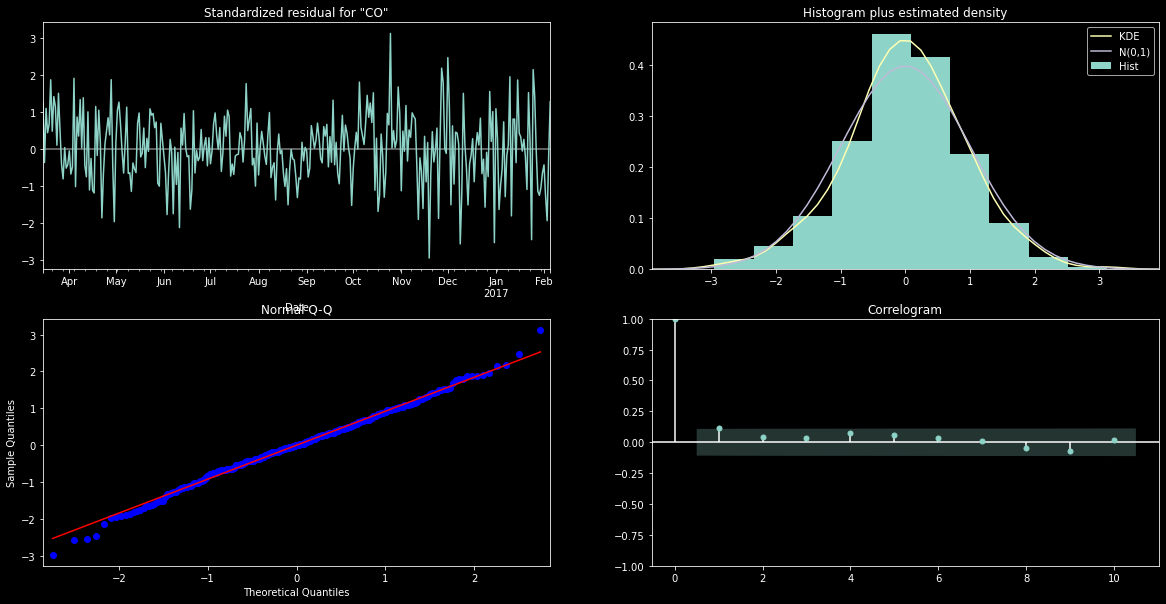

In [ ]:
model.plot_diagnostics()
plt.show()


variable        Value
id                       
0         CO  1014.665093
1         CO   954.341356
2         CO   931.782188
3         CO   893.754513
4         CO   847.458719
..       ...          ...
247       O3   824.917547
248       O3   759.103056
249       O3   741.655289
250       O3   746.205530
251       O3   790.700171

[252 rows x 2 columns]

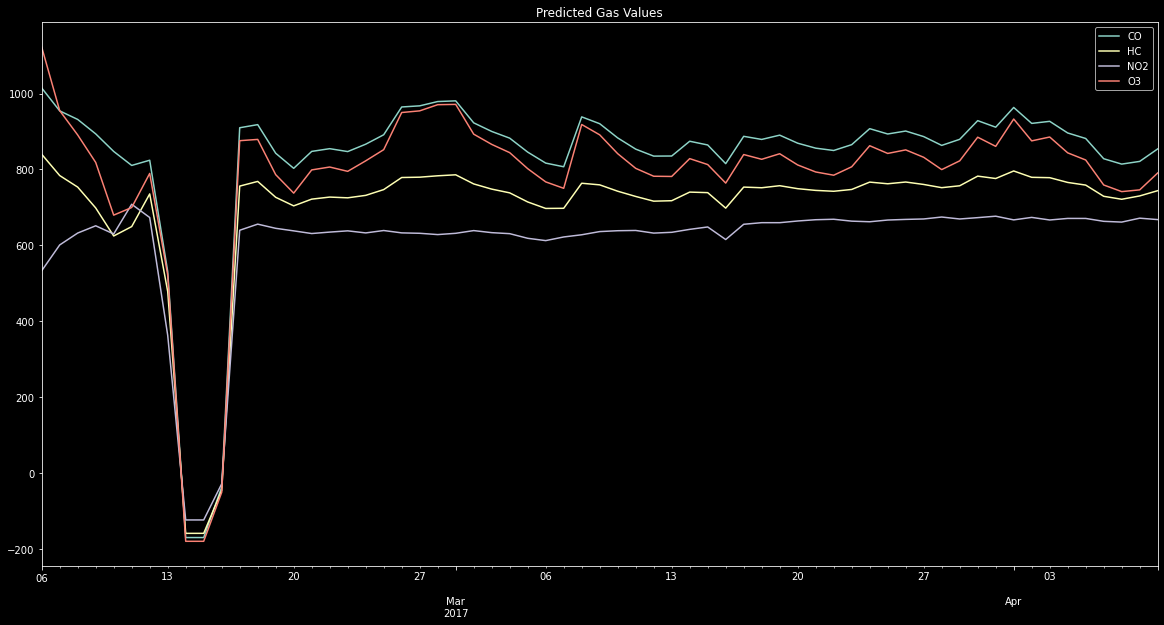

In [ ]:
# generate predictions
predictions = model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
predictions.plot()
plt.title("Predicted Gas Values")
predictions = pd.melt(
    predictions, value_vars=["CO", "HC", "NO2", "O3"], value_name="Value"
)
predictions.index.rename("id", inplace=True)
predictions


In [ ]:
# making a directory if it does not exist
Path("./kaggle").mkdir(parents=True, exist_ok=True)
predictions["Value"].to_csv("./kaggle/varmax08.csv")
print("Exported predictions to .csv")



Exported predictions to .csv


In [ ]:
model = VARMAX(endog=y, exog=x, order=(0, 4), trend="c").fit(maxiter=1000, disp=False)

# making a directory if it does not exist
Path("./models").mkdir(parents=True, exist_ok=True)

# saving model to pickle
with open("./models/varmax04.pkl", "wb") as f:
    pickle.dump(model, f)
    print("model saved")

model.summary()


model saved


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Statespace Model Results                              
=====================================================================================
Dep. Variable:     ['CO', 'HC', 'NO2', 'O3']   No. Observations:                  328
Model:                               VMAX(4)   Log Likelihood               -7164.356
                                 + intercept   AIC                          14500.713
Date:                       Thu, 11 Aug 2022   BIC                          14826.912
Time:                               16:56:19   HQIC                         14630.857
Sample:                           03-15-2016                                         
                                - 02-05-2017                                         
Covariance Type:                         opg                                         
================================================================================================
Ljung-Box (L1) (Q):     0.70, 15.11, 6.42, 7.54   Jarque-Bera (JB):   2.60, 1.13, 1417.91, 38.21
Prob(Q):                 0.40, 0.00, 0.01, 0.01   Prob(JB):               0.27, 0.57, 0.00, 0.00
Heteroskedasticity (H):  1.81, 0.91, 1.74, 2.35   Skew:                 -0.11, -0.07, 1.72, 0.54
Prob(H) (two-sided):     0.00, 0.62, 0.00, 0.00   Kurtosis:              3.38, 3.25, 12.59, 4.28
                           Results for equation CO                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    685.8759     19.172     35.774      0.000     648.299     723.453
L1.e(CO)       0.5749      0.205      2.809      0.005       0.174       0.976
L1.e(HC)      -0.0906      0.171     -0.531      0.595      -0.425       0.244
L1.e(NO2)      0.2431      0.110      2.216      0.027       0.028       0.458
L1.e(O3)       0.2609      0.118      2.211      0.027       0.030       0.492
L2.e(CO)       0.2129      0.186      1.143      0.253      -0.152       0.578
L2.e(HC)       0.0578      0.178      0.325      0.745      -0.291       0.406
L2.e(NO2)      0.2510      0.123      2.035      0.042       0.009       0.493
L2.e(O3)       0.1162      0.118      0.984      0.325      -0.115       0.348
L3.e(CO)       0.2730      0.214      1.274      0.203      -0.147       0.693
L3.e(HC)      -0.0043      0.194     -0.022      0.982      -0.385       0.376
L3.e(NO2)      0.2317      0.106      2.177      0.029       0.023       0.440
L3.e(O3)       0.0085      0.117      0.073      0.942      -0.220       0.237
L4.e(CO)       0.2838      0.201      1.409      0.159      -0.111       0.678
L4.e(HC)      -0.0047      0.158     -0.030      0.976      -0.314       0.305
L4.e(NO2)      0.0547      0.071      0.770      0.441      -0.085       0.194
L4.e(O3)      -0.0895      0.112     -0.802      0.423      -0.308       0.129
beta.T         0.5158      0.572      0.902      0.367      -0.605       1.637
beta.RH        3.7255      0.467      7.979      0.000       2.810       4.641
                           Results for equation HC                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    629.5374     20.234     31.113      0.000     589.879     669.196
L1.e(CO)      -0.1287      0.248     -0.519      0.604      -0.614       0.357
L1.e(HC)       0.4484      0.201      2.228      0.026       0.054       0.843
L1.e(NO2)      0.1886      0.137      1.381      0.167      -0.079       0.456
L1.e(O3)       0.2611      0.146      1.786      0.074      -0.025       0.548
L2.e(CO)      -0.1124      0.226     -0.496      0.620      -0.556       0.332


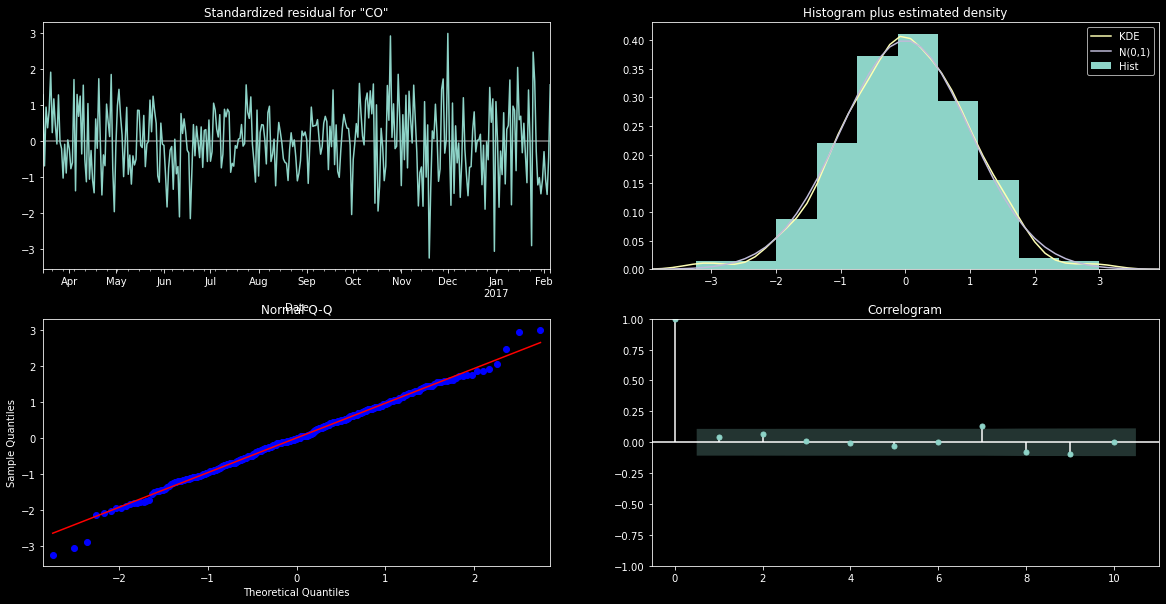

In [ ]:
model.plot_diagnostics()
plt.show()


variable        Value
id                       
0         CO  1006.859011
1         CO   927.043421
2         CO   902.183537
3         CO   869.804269
4         CO   862.375076
..       ...          ...
247       O3   825.030812
248       O3   758.887874
249       O3   741.352782
250       O3   745.698517
251       O3   790.621232

[252 rows x 2 columns]

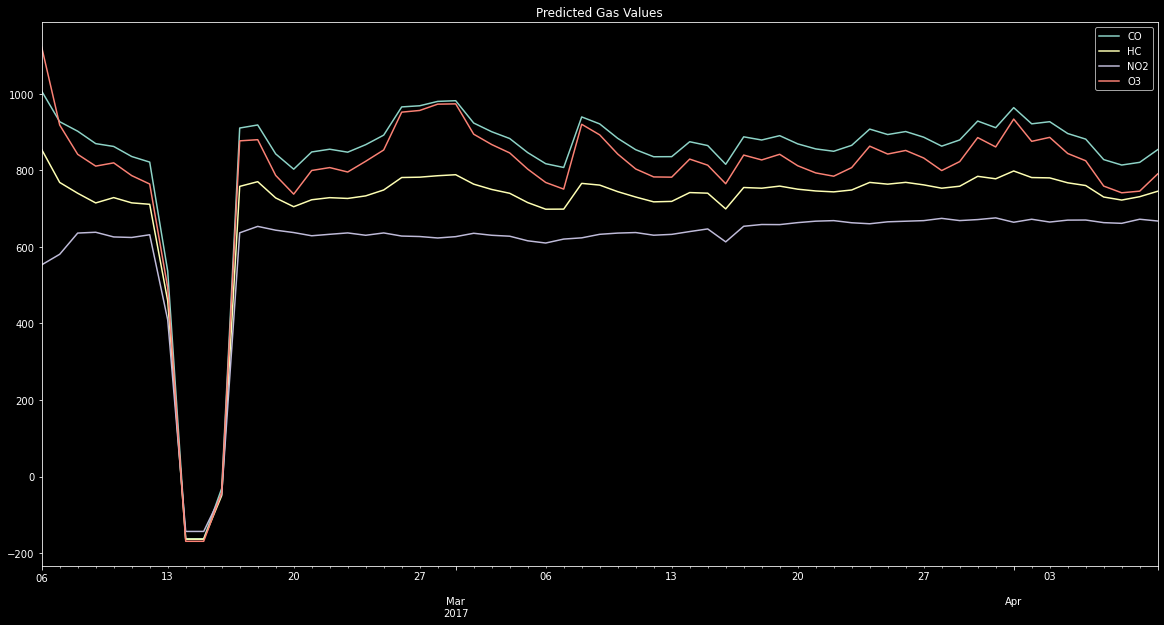

In [ ]:
# generate predictions
predictions = model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
predictions.plot()
plt.title("Predicted Gas Values")
predictions = pd.melt(
    predictions, value_vars=["CO", "HC", "NO2", "O3"], value_name="Value"
)
predictions.index.rename("id", inplace=True)
predictions


In [ ]:
# making a directory if it does not exist
Path("./kaggle").mkdir(parents=True, exist_ok=True)
predictions["Value"].to_csv("./kaggle/varmax04.csv")
print("Exported predictions to .csv")



Exported predictions to .csv


# Summary
We are able to create an forecasting model to predict air pollution in the air. With climate change being a constant threat to mankind's survival, we should start keeping the environment clean. However, the model still faces some limitations. It has only been trained and tested on an older set of data point from 2016 - 2018. As technology advances and human life advances, more pollution will appear, the trend and season of air pollution will change. For the model to be fully deployed, more data needs to be collected and use for prediction to make the model better.

<hr>

# Personal Reflection
The difficulty I found doing the forecasting task was being interpret the ACF and PACF plot. I feel that the points are not as accurate as the order collected using the cross validation techniques like expanding windows. 